## 01 Exploratory Data Analysis - Valores Nulos
## Objetivo
Esta es una continuación de 01 Exploratory Data Analysis pero aquí trabajaremos con la mayor cantidad de columnas del dataset y cumpla la condición de un porcentaje de valores nulos  



In [62]:
## Librerías
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [63]:
## Importamos las librerias a usar
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/cursos-analisis-datos/data-science/proyecto/propuestas/propuesta1/ieee-fraud-detection'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Selección de Porción del Dataset con Muestreo Estratificado

Para seleccionar una porción representativa de un dataset grande para entrenamiento sin introducir sesgo, se utiliza el muestreo aleatorio estratificado. Este método asegura que la proporción de clases en la muestra sea la misma que en el conjunto de datos original, lo cual es crucial para problemas de clasificación con clases desbalanceadas.


Del notebook estudio_de_las_variables.ipynb se obtiene que estas son las características que tiene menos del 10% de valores, se usaran para el entrnamiento.
Rango de valores nulos: 0-10%
Columnas: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']


In [64]:
col_range_10 =  ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

In [65]:
select_col_transaction = 'TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9'.split(',')
select_col_identity = 'TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo'.split(',')
select_col_transaction_test = 'TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9'.split(',')
#select_col_identity_test ='TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo'.split(',')

In [66]:
#data_dir = '../data/raw/ieee-fraud-detection'

## dataset de entrenamiento
seed = 42
# Cargar los datos
df_transaction_train = pd.read_csv(data_dir + '/train_transaction.csv', usecols=col_range_10)
#df_identity_train = pd.read_csv(data_dir + '/train_identity.csv', usecols=select_col_identity)

# Combinar los datasets
#dataset = pd.merge(df_transaction_train, df_identity_train, on='TransactionID', how='left')
dataset = df_transaction_train.copy()
# Realizar el muestreo estratificado
train_data, _ = train_test_split(dataset, stratify=dataset['isFraud'], test_size=0.9, random_state=seed)

# Mostrar la información del dataset resultante
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59054 entries, 294161 to 404259
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 50.9+ MB


### Dimensiones del dataset

In [67]:
train_data.shape

(59054, 112)

Por lo que utilizaremos solo el 10% del dato de entrenamiento

In [68]:
train_data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=112)

In [69]:
## Armamos un nuevo dataset con menos cantidad de columnas
# df_train = train_data[['isFraud', 'TransactionDT', 'TransactionAmt',
#        'ProductCD','addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
#        'DeviceType', 'DeviceInfo','card1', 'card2', 'card3', 'card4', 'card5', 'card6','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
#        'C12', 'C13', 'C14','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
#        'D9', 'D10', 'D11', 'D12', 'D13']].copy()
df_train = train_data.copy()

In [70]:
df_train.shape

(59054, 112)

Por lo tanto tenemos 11 columnas de propiedades y 59054 registros

### Tipos de datos y resumen estadísticos

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59054 entries, 294161 to 404259
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 50.9+ MB


In [72]:
import pandas as pd

# Suponiendo que ya tienes cargado tu dataset en 'df_train'

# Identificar tipos de datos
data_types = df_train.drop('isFraud',axis=1).dtypes

# Filtrar y contar variables numéricas y categóricas
num_vars = data_types[data_types != 'object']  # Variables numéricas
cat_vars = data_types[data_types == 'object']  # Variables categóricas

# Obtener nombres de las variables
num_vars_names = num_vars.index.tolist()
cat_vars_names = cat_vars.index.tolist()

# Mostrar resultados
print(f"Número de variables numéricas: {num_vars.shape[0]}")
print(f"Nombres de variables numéricas: {num_vars_names}")
print()
print(f"Número de variables categóricas: {cat_vars.shape[0]}")
print(f"Nombres de variables categóricas: {cat_vars_names}")


Número de variables numéricas: 108
Nombres de variables numéricas: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

Número de variables categóricas: 3
Nombres de variables categóric

In [73]:
for columna in cat_vars_names :
    print(f"Columna: {columna}, el número de variables es: {df_train[columna].nunique()}")

Columna: ProductCD, el número de variables es: 5
Columna: card4, el número de variables es: 4
Columna: card6, el número de variables es: 4


## Análisis de valores nulos

### Identificación de valores nulos

In [74]:
df_train.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              1
V318              1
V319              1
V320              1
V321              1
Length: 112, dtype: int64

### Porcentaje de valores nulos

In [75]:
null_percentages = (df_train.isnull().sum() / len(df_train)) * 100
print(round(null_percentages,2))

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 112, dtype: float64


In [76]:
# Calcula el porcentaje de valores nulos para cada columna
null_percentages = (dataset.isnull().sum() / len(dataset)) * 100

# Define los rangos para los valores nulos
ranges = [
    (0, 10),
    (10, 20),
    (20, 30),
    (30, 40),
    (40, 50),
    (50, 60),
    (60, 70),
    (70, 80),
    (80, 90),
    (90, 100)
]

# Agrupa las columnas en los rangos definidos
grouped_columns = {f'{r[0]}-{r[1]}%': [] for r in ranges}

for column, percentage in null_percentages.items():
    for r in ranges:
        if r[0] <= percentage < r[1]:
            grouped_columns[f'{r[0]}-{r[1]}%'].append(column)

# Imprime los resultados
for range_, columns in grouped_columns.items():
    if columns:
        print(f'Rango de valores nulos: {range_}')
        print(f'Columnas: {columns}')
        print()

Rango de valores nulos: 0-10%
Columnas: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']



En el gráfico de arriba se presenta una visualización de la cantidad de valores nulos en forma descendente. Destacan especialmente cinco atributos con una significativa cantidad de valores nulos: 'dist1', 'DeviceType', 'R_emaildomain', 'DeviceInfo' y 'dist2'. Esta distribución nos ofrece una instantánea clara de las áreas de nuestros datos que pueden requerir mayor atención y manejo especial durante el proceso de limpieza y preparación de los datos.

In [77]:


# Suponiendo que ya tienes cargado tu dataset en 'df_train'

# Crear una nueva DataFrame booleano indicando valores nulos
df_nulls = df_train.isnull()

# Calcular la correlación entre los valores nulos
corr_nulls = df_nulls.corr()

# Obtener triángulo superior de la matriz de correlación (sin la diagonal principal)
upper_triangle = corr_nulls.where(np.triu(np.ones(corr_nulls.shape), k=1).astype(bool))

# Definir umbral de correlación
threshold = 0.5

# Filtrar pares de variables con correlación mayor que el umbral
high_corr_pairs = upper_triangle[upper_triangle.abs() > threshold].stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar los pares de variables con alta correlación ordenados por la correlación
high_corr_pairs_sorted = high_corr_pairs.sort_values(by='Correlación', ascending=False)
print(high_corr_pairs_sorted)


    Variable 1 Variable 2  Correlación
0        card3      card4     1.000000
988       V281       V313     1.000000
986       V281       V300     1.000000
985       V281       V296     1.000000
984       V281       V289     1.000000
..         ...        ...          ...
487       V108       V111     1.000000
486       V108       V110     1.000000
5        card5      card6     0.630379
3        card4      card5     0.630379
1        card3      card5     0.630379

[1471 rows x 3 columns]


En la tabla anterior, se observa que los datos nulos muestran una correlación significativa entre ellos, con valores superiores a 0.5 en términos absolutos. Por ejemplo, addr1 y addr2, que representan la región y el país de facturación respectivamente para el comprador, muestran una posible relación de nulidad entre sí, dado que ambos son atributos de la dirección del comprador.

Todas las demás variables también muestran una alta correlación de datos nulos, reflejada en la gran cantidad de valores ausentes para cada variable, lo cual contribuye a un alto valor de correlación entre ellas.


### Eliminamos las columnas con más del 80% de valores nulos

In [78]:
null_percentages = (df_train.isnull().sum() / len(df_train)) * 100
print(round(null_percentages,2))

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 112, dtype: float64


### Valores Duplicados

In [79]:
df_train[df_train.duplicated(keep=False)].count()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 112, dtype: int64

Debido a la baja presencia de valores duplicados, procederemos a eliminarlos del dataset.



In [80]:
df_train = df_train.dropna()
df_train[df_train.duplicated(keep=False)].count()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 112, dtype: int64

## Análisis Univariado

### Columna Target 'isFraud'

Comenzamos el análisis focalizándonos en la columna "isFraud", ya que representa el resultado de nuestros predictores o características. Evaluamos la cantidad de registros y representaremos visualmente esta información mediante un gráfico de barras, con el propósito de ilustrar la cantidad de registros clasificados como fraude y aquellos que no lo son.

In [81]:
df_train['isFraud'] = df_train['isFraud'].replace({0: 'No', 1: 'Sí'})

<ipython-input-82-3b3dcc77bce0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fraude, x='isFraud', y='count', palette=['tab:blue', 'tab:red'], ax=ax)


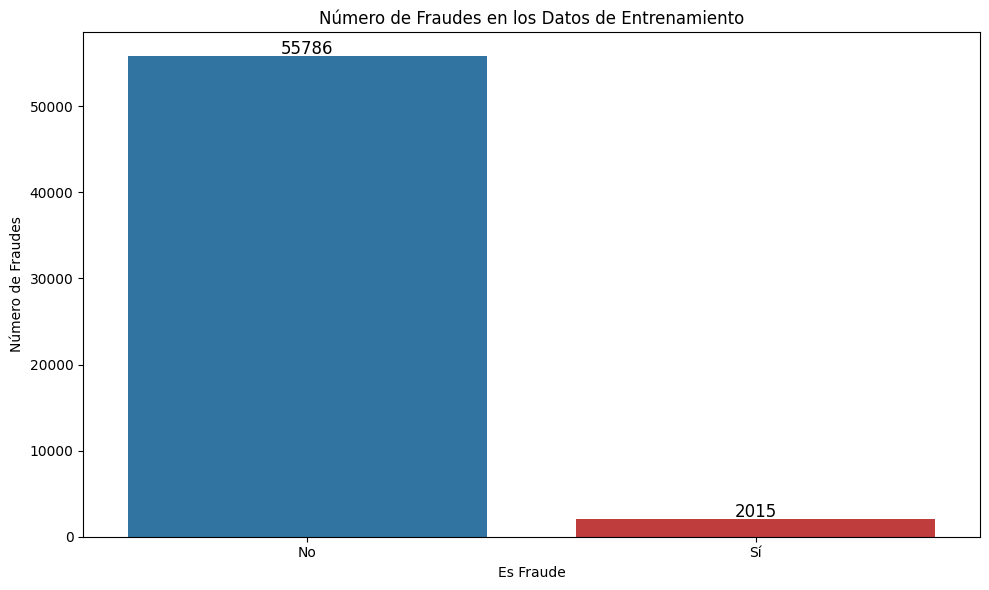

In [82]:
# Calcular los números de fraudes en los datos de entrenamiento
Numero_fraude = df_train.isFraud.value_counts()
df_fraude = pd.DataFrame(Numero_fraude).rename(index={0: 'No', 1: 'Sí'})
df_fraude.reset_index(inplace=True)
df_fraude.columns = ['isFraud', 'count']  # Renombrar columnas para usar en seaborn

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(data=df_fraude, x='isFraud', y='count', palette=['tab:blue', 'tab:red'], ax=ax)

# Etiquetas y título
ax.set_ylabel('Número de Fraudes')
ax.set_title('Número de Fraudes en los Datos de Entrenamiento')
ax.set_xlabel('Es Fraude')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

# Guardar la figura
#plt.savefig(base_dir + 'balance_datos.png')

# Mostrar la figura
plt.show()


In [83]:


# Calcular los porcentajes de fraudes en los datos de entrenamiento
porcentaje_fraude = df_train['isFraud'].value_counts(normalize=True) * 100

# Crear un DataFrame con los porcentajes
df_porcentaje_fraude = pd.DataFrame(porcentaje_fraude)

# Renombrar las columnas
df_porcentaje_fraude.columns = ['Porcentaje']

# Restaurar los índices originales
df_porcentaje_fraude.reset_index(inplace=True)

# Renombrar las categorías
df_porcentaje_fraude['isFraud'] = df_porcentaje_fraude['isFraud'].map({0: 'No', 1: 'Sí'})

# Mostrar el DataFrame
df_porcentaje_fraude


isFraud  Porcentaje
0     NaN   96.513901
1     NaN    3.486099

Obervación:
**Cantidad de registros por archivo**

| Es Fraude | N° de Registros |
| ------------ | ------------ |
| No| 96,45%|
| Sí| 3.54%|

Se destaca que la mayoría abrumadora de las transacciones se encuentran en la categoría no fraudulenta, mientras que solo una fracción mínima corresponde a casos de fraude. Este desbalance en los datos puede representar un desafío significativo para el proceso de aprendizaje automático, ya que los modelos pueden tener dificultades para identificar y aprender patrones en las clases minoritarias debido a su escasez relativa

### Análisis de las caracteterísticas

### Columna Importe del pago por transacción en USD (TransactionAmt)


Analizamos la asociación entre la columna "TransactionAmt", que representa los importes de cada transacción, y la columna de fraude. Este análisis incluye la evaluación de la distribución de los montos en relación con la presencia de fraudes.



In [84]:
df_train[['TransactionAmt']].describe().round(2)

TransactionAmt
count        57801.00
mean           133.83
std            262.90
min              0.50
25%             42.95
50%             68.50
75%            125.00
max          31937.39

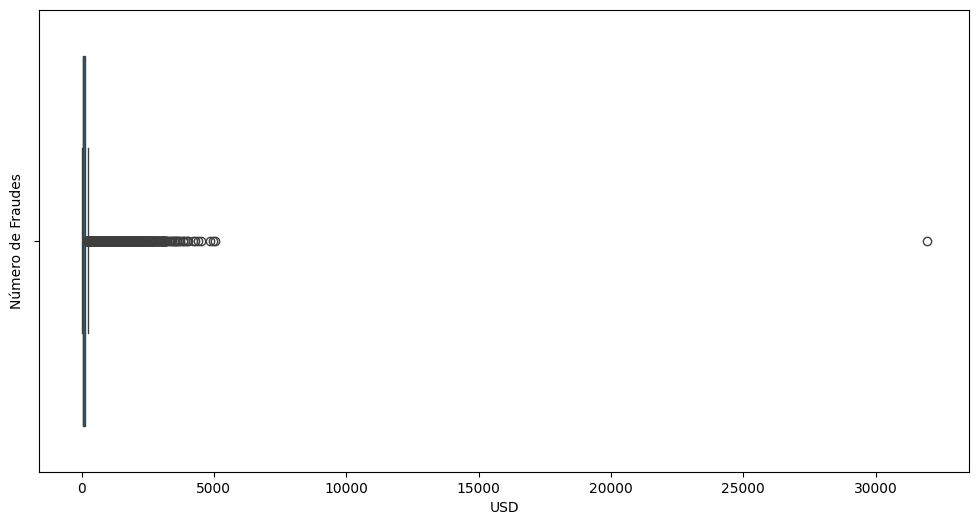

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, x='TransactionAmt')
plt.ylabel('Número de Fraudes')
plt.xlabel('USD')
#plt.savefig(base_dir + 'trabs_total_box_plot')
plt.show()

El valor medio de la variable 'TransactionAmt' es de 134.5, con una desviación estándar de 263.63. Además, el valor máximo está considerablemente alejado del tercer quartil del 75%  de los datos, lo que indica la presencia de valores atípicos en esta característica, en el gráfico de arriba se pued apreciar con mas detalle la exitencia de valores atípicos.

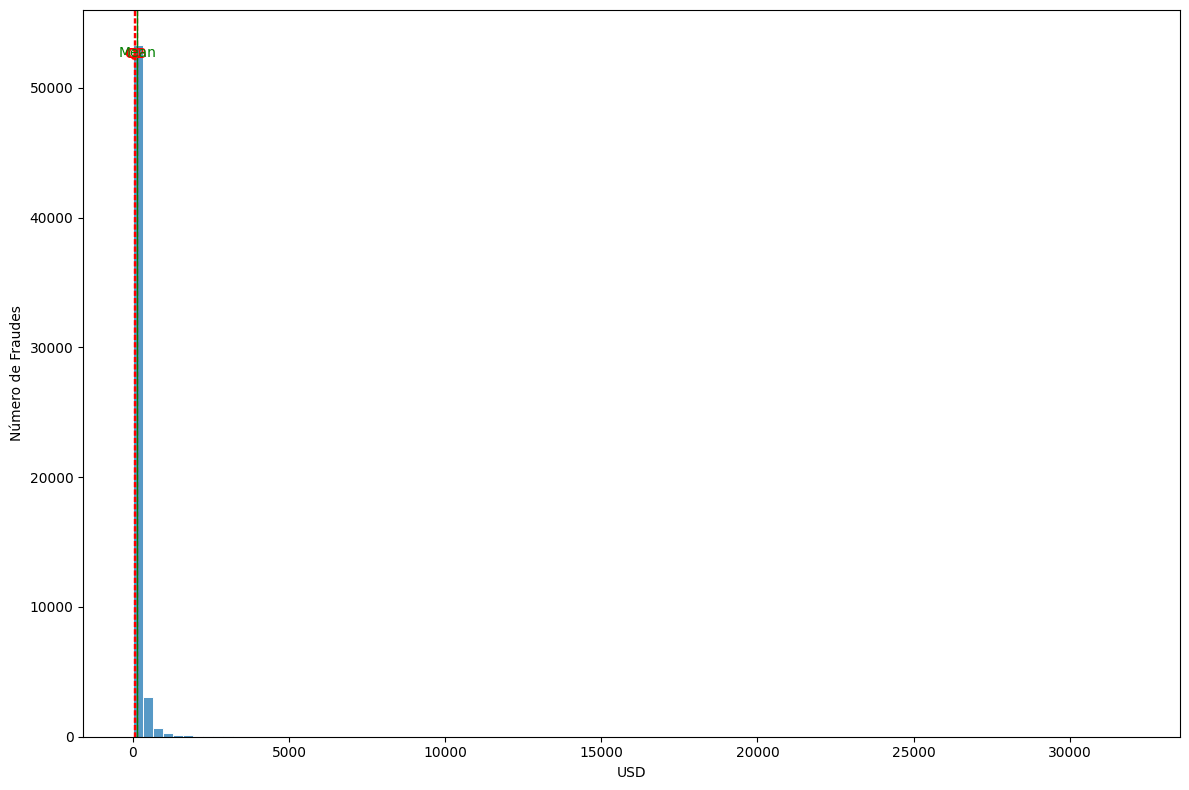

In [86]:
quartiles = np.percentile(df_train['TransactionAmt'], [25, 50, 75])
mean_value = df_train['TransactionAmt'].mean()

fig, axs = plt.subplots(tight_layout=True, figsize=(12, 8))

# Crear el histograma
sns.histplot(data=df_train, x='TransactionAmt', bins=100, color='tab:blue', edgecolor="white", linewidth=0.7, label='No', log_scale=False, ax=axs)

# Añadir líneas de los cuartiles
for q in quartiles:
    axs.axvline(q, color='red', linestyle='--', linewidth=1)

# Añadir línea de la media
axs.axvline(mean_value, color='green', linestyle='-', linewidth=1)

# Etiquetas y título
axs.set_ylabel('Número de Fraudes')
axs.set_xlabel('USD')

# Añadir leyenda para los cuartiles y la media
quartile_labels = ['Q1', 'Q2', 'Q3']
for i, q in enumerate(quartiles):
    axs.text(q, axs.get_ylim()[1] * 0.95, quartile_labels[i], color='red', ha='center', va='top')
axs.text(mean_value, axs.get_ylim()[1] * 0.95, 'Mean', color='green', ha='center', va='top')

plt.show()

#### Vemos ahora estos valores en escala logarítmicas

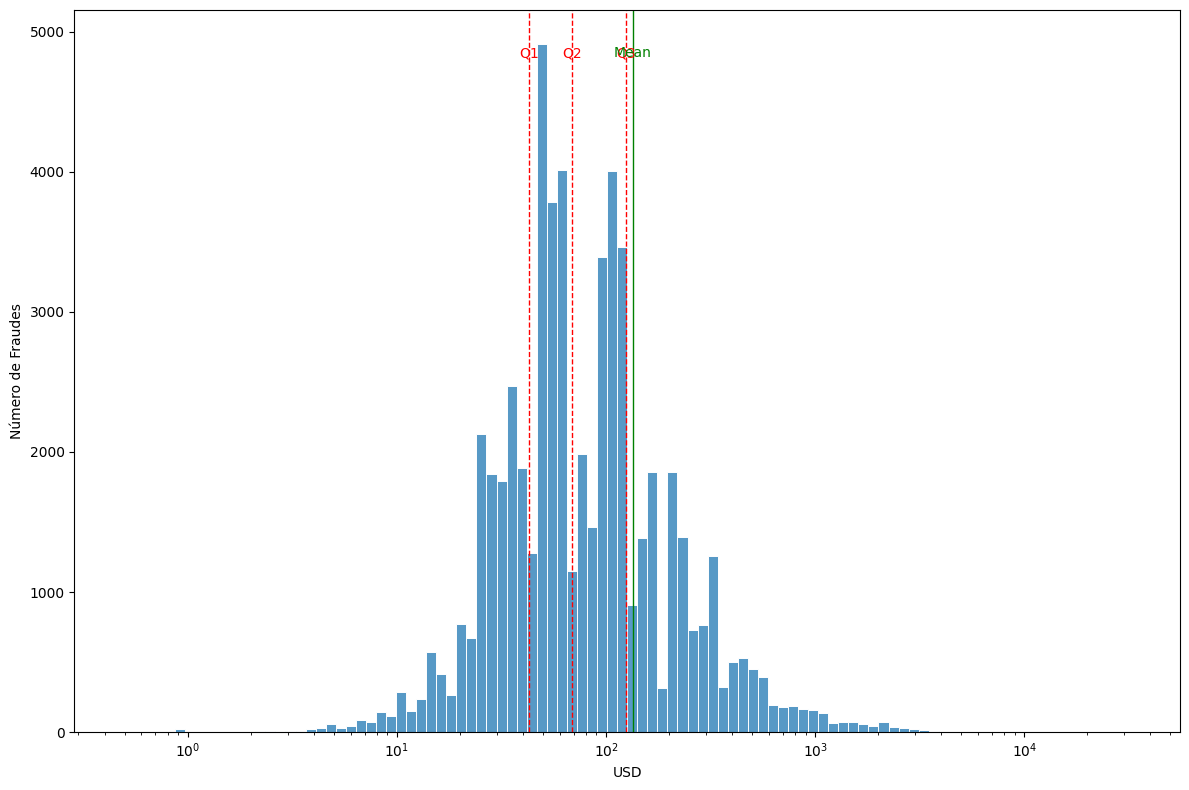

In [87]:
quartiles = np.percentile(df_train['TransactionAmt'], [25, 50, 75])
mean_value = df_train['TransactionAmt'].mean()

fig, axs = plt.subplots(tight_layout=True, figsize=(12, 8))

# Crear el histograma
sns.histplot(data=df_train, x='TransactionAmt', bins=100, color='tab:blue', edgecolor="white", linewidth=0.7, label='No', log_scale=True, ax=axs)

# Añadir líneas de los cuartiles
for q in quartiles:
    axs.axvline(q, color='red', linestyle='--', linewidth=1)

# Añadir línea de la media
axs.axvline(mean_value, color='green', linestyle='-', linewidth=1)

# Etiquetas y título
axs.set_ylabel('Número de Fraudes')
axs.set_xlabel('USD')

# Añadir leyenda para los cuartiles y la media
quartile_labels = ['Q1', 'Q2', 'Q3']
for i, q in enumerate(quartiles):
    axs.text(q, axs.get_ylim()[1] * 0.95, quartile_labels[i], color='red', ha='center', va='top')
axs.text(mean_value, axs.get_ylim()[1] * 0.95, 'Mean', color='green', ha='center', va='top')

plt.show()

Observación:

En la representación gráfica de la distribución y en la tabla de estadísticos asociada a la columna "TransactionAmt", se destacan las siguientes observaciones:

- Se evidencia una notable disparidad de la mediana (Q2) con el valor medio de los valores de TransactionAmt.
- El valor medio casi coincide con el los 75% de  valores (Q3) esto señale la gran dispersión de los valores.


La comparación entre el límite superior del rango intercuartil y el valor máximo revela discrepancias significativas en órdenes de magnitud, indicando la presencia de datos atípicos.

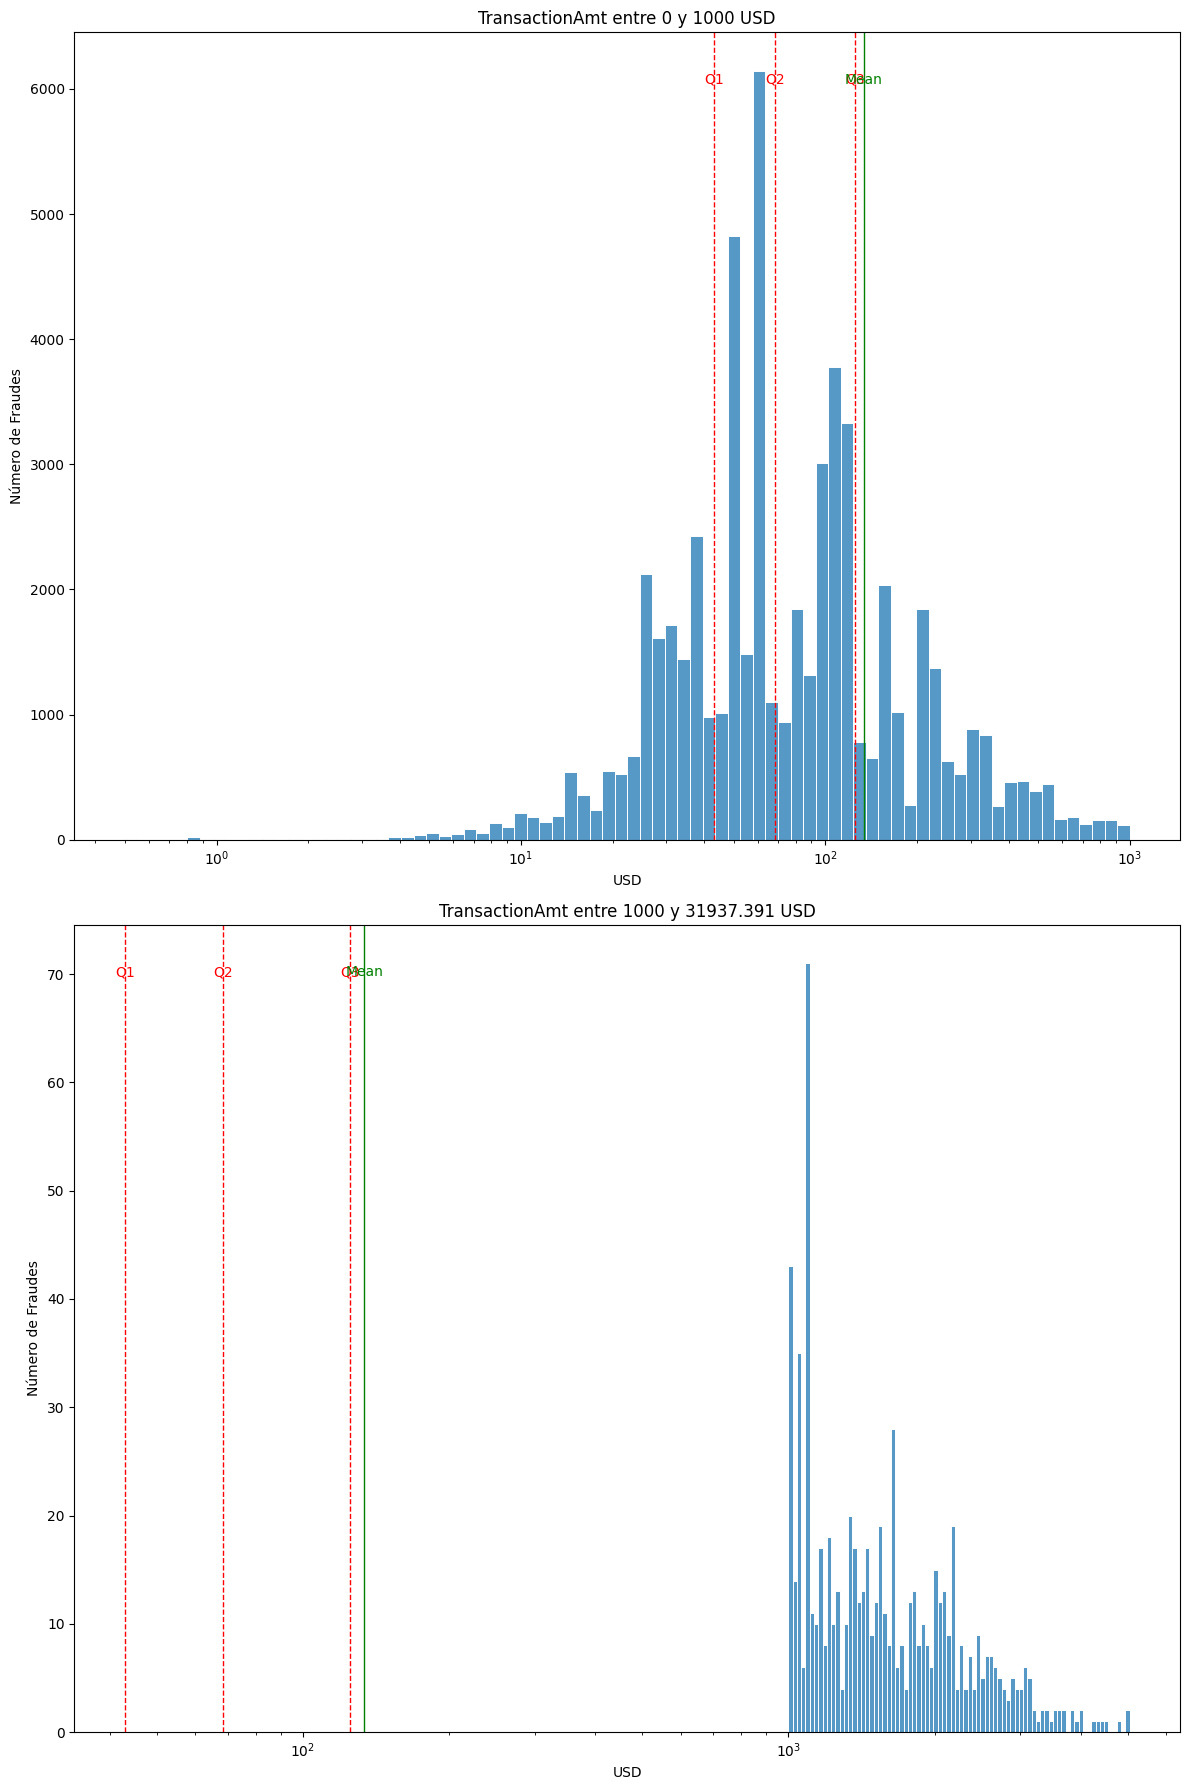

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los rangos para 'TransactionAmt'
ranges = [(0, 1000),(1000, df_train['TransactionAmt'].max())]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, tight_layout=True, figsize=(12, 18))

# Generar el histograma para cada rango
for ax, (min_val, max_val) in zip(axs, ranges):
    subset = df_train[(df_train['TransactionAmt'] >= min_val) & (df_train['TransactionAmt'] < max_val)]
    sns.histplot(data=subset, x='TransactionAmt', bins=80, color='tab:blue', edgecolor="white", linewidth=0.7, label='No', ax=ax, log_scale=True)
    ax.set_title(f'TransactionAmt entre {min_val} y {max_val} USD')
    ax.set_ylabel('Número de Fraudes')
    ax.set_xlabel('USD')
    # Añadir líneas de los cuartiles
    for q in quartiles:
        ax.axvline(q, color='red', linestyle='--', linewidth=1)

    # Añadir línea de la media
    ax.axvline(mean_value, color='green', linestyle='-', linewidth=1)

    # Etiquetas y título
    ax.set_ylabel('Número de Fraudes')
    ax.set_xlabel('USD')

    # Añadir leyenda para los cuartiles y la media
    quartile_labels = ['Q1', 'Q2', 'Q3']
    for i, q in enumerate(quartiles):
        ax.text(q, ax.get_ylim()[1] * 0.95, quartile_labels[i], color='red', ha='center', va='top')
    ax.text(mean_value, ax.get_ylim()[1] * 0.95, 'Mean', color='green', ha='center', va='top')



plt.show()


Separamos el histograma en dos rangos de valores: uno de 0 a 1000 y otro de 1000 hasta el valor máximo. Al observar cada rango, notamos que presentan distribuciones diferentes, lo cual indica una posible segmentación en esta característica.

### Separación de los datos por rango de la columna de (TransactionAmt)

In [89]:

# Calcular los cuartiles y el IQR
Q1 = np.percentile(df_train['TransactionAmt'], 25)
Q3 = np.percentile(df_train['TransactionAmt'], 75)
IQR = Q3 - Q1

# Definir los umbrales para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Función para clasificar los valores en rangos
def classify_transaction_amt(value):
    if value < lower_bound:
        return 'Muy bajo'
    elif lower_bound <= value < Q1:
        return 'Bajo'
    elif Q1 <= value < Q3:
        return 'Medio'
    elif Q3 <= value < upper_bound:
        return 'Alto'
    else:
        return 'Muy alto'

# Aplicar la función de clasificación a la columna
df_train['TransactionAmt_Range'] = df_train['TransactionAmt'].apply(classify_transaction_amt)

# Mostrar algunos resultados
print(df_train['TransactionAmt_Range'].value_counts())


TransactionAmt_Range
Medio       29032
Bajo        14311
Alto         7996
Muy alto     6462
Name: count, dtype: int64


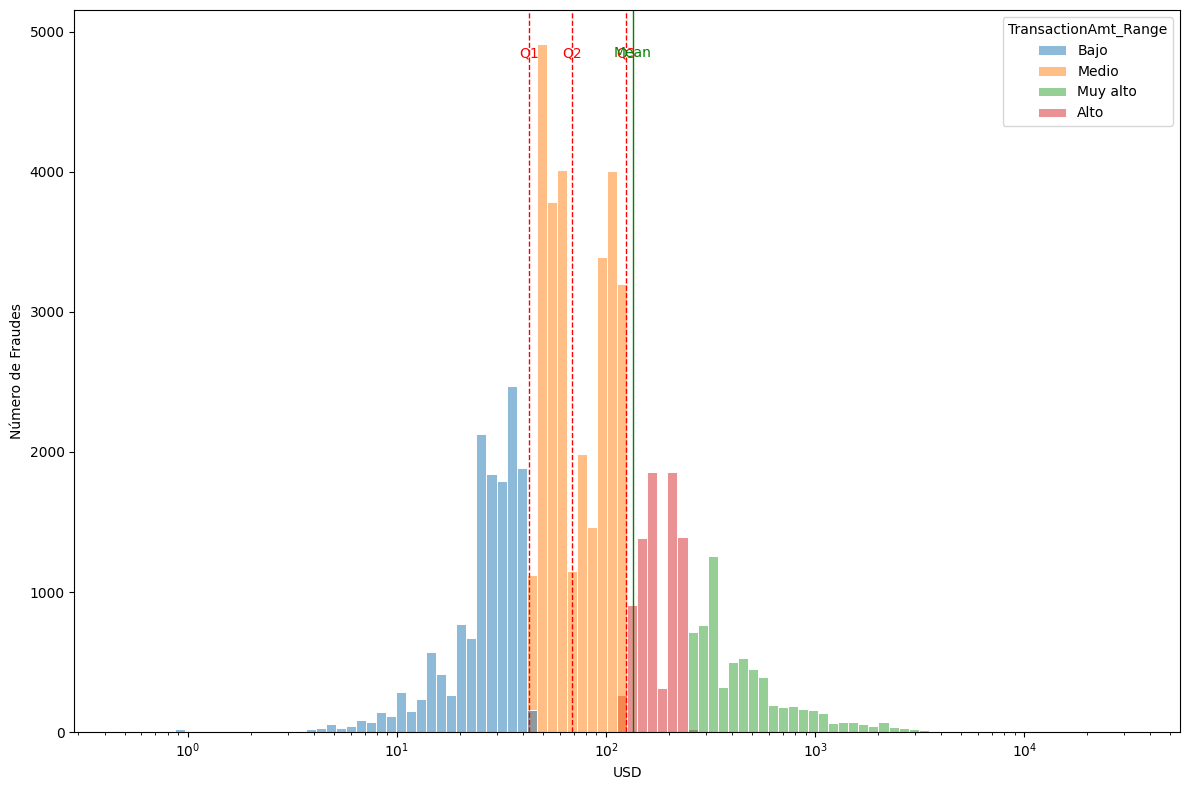

In [90]:
quartiles = np.percentile(df_train['TransactionAmt'], [25, 50, 75])
mean_value = df_train['TransactionAmt'].mean()

fig, axs = plt.subplots(tight_layout=True, figsize=(12, 8))

# Crear el histograma
sns.histplot(data=df_train, x='TransactionAmt', bins=100, color='tab:blue',
             edgecolor="white", linewidth=0.7, label='No', log_scale=True, ax=axs,hue='TransactionAmt_Range')

# Añadir líneas de los cuartiles
for q in quartiles:
    axs.axvline(q, color='red', linestyle='--', linewidth=1)

# Añadir línea de la media
axs.axvline(mean_value, color='green', linestyle='-', linewidth=1)

# Etiquetas y título
axs.set_ylabel('Número de Fraudes')
axs.set_xlabel('USD')

# Añadir leyenda para los cuartiles y la media
quartile_labels = ['Q1', 'Q2', 'Q3']
for i, q in enumerate(quartiles):
    axs.text(q, axs.get_ylim()[1] * 0.95, quartile_labels[i], color='red', ha='center', va='top')
axs.text(mean_value, axs.get_ylim()[1] * 0.95, 'Mean', color='green', ha='center', va='top')

plt.show()

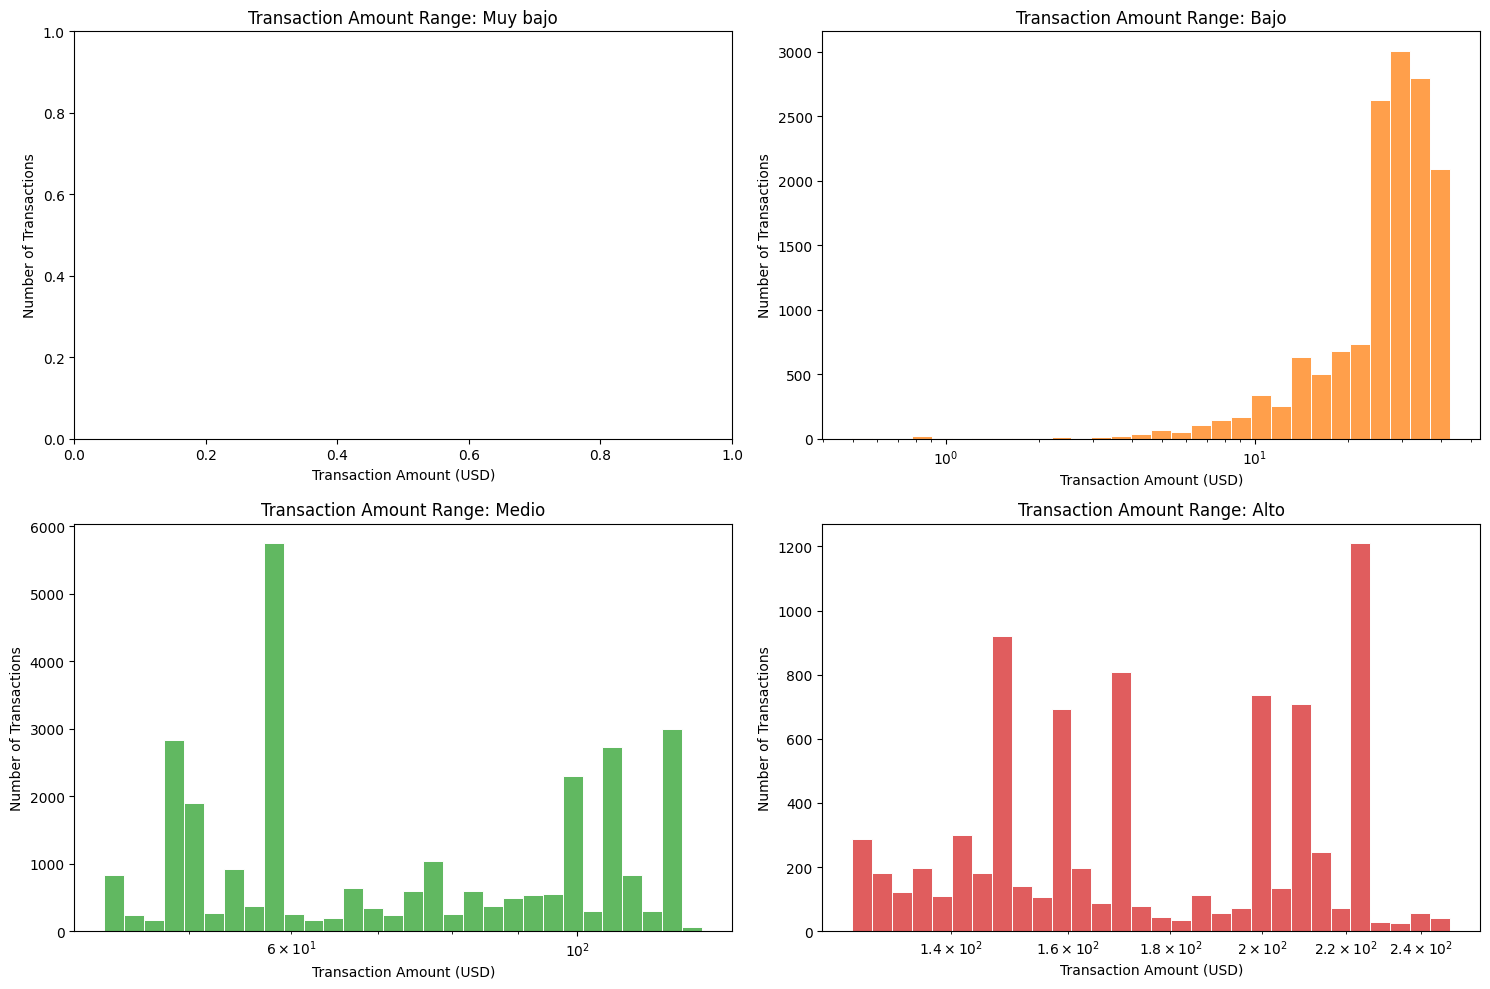

In [91]:

# Crear subplots para cada rango de valor
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=False, tight_layout=True)

# Definir los nombres de los rangos y los colores correspondientes
range_labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Iterar sobre los subplots y los rangos
for i, ax in enumerate(axs.flatten()):
    range_label = range_labels[i]
    color = colors[i]

    # Filtrar datos para el rango actual
    subset_data = df_train[df_train['TransactionAmt_Range'] == range_label]

    # Verificar si hay datos en el subset
    if not subset_data.empty:
        # Calcular el número de transacciones en el rango actual
        num_transactions = len(subset_data)

        # Crear el histograma para el rango actual
        sns.histplot(data=subset_data, x='TransactionAmt', bins=30, color=color,
                     edgecolor="white", linewidth=0.7, log_scale=True, ax=ax)

        ax.set_ylim(bottom=0)

    # Etiquetas y título para cada subplot
    ax.set_title(f'Transaction Amount Range: {range_label}')
    ax.set_xlabel('Transaction Amount (USD)')
    ax.set_ylabel('Number of Transactions')

# Ajustar el espacio entre subplots y mostrar la figura
plt.tight_layout()
plt.show()

- Cada valor en la columna TransactionAmt se clasifica en uno de los rangos definidos (Muy bajo, Bajo, Medio, Alto, Muy alto) según los cuartiles y los límites de valores atípicos. Se crea una nueva columna llamada TransactionAmt_Range en el DataFrame, que contiene el rango correspondiente para cada valor de TransactionAmt.
- No hay datos clasificados en la categoría "Muy Bajo".
- La columna TransactionAmt será reemplazada por TransactionAmt_Range ya que ambas contienen esencialmente la misma información. La columna TransactionAmt tiene valores que varían considerablemente entre diferentes rangos, lo cual dificultaría la normalización y complicaría el entrenamiento de los modelos. Por lo tanto, TransactionAmt será eliminada y reemplazada por TransactionAmt_Range que tiene las categorías separadas por rangos.

### Columna Intervalo de tiempo (**TransactionDT**)

**TransactionDT**: timedelta desde una fecha de referencia dada (no es una marca de tiempo real).
- "El primer valor de TransactionDT es 86400, que corresponde al número de segundos en un día (60 * 60 * 24 = 86400), por lo que creo que la unidad es segundos. Usando esto, sabemos que los datos abarcan 6 meses, ya que el valor máximo es 15811131, lo que correspondería al día 183."

In [92]:
df_train[['TransactionDT']].describe().round(2)

TransactionDT
count        57801.0
mean       7354085.8
std        4615389.9
min          86469.0
25%        3021716.0
50%        7262011.0
75%       11206802.0
max       15810549.0

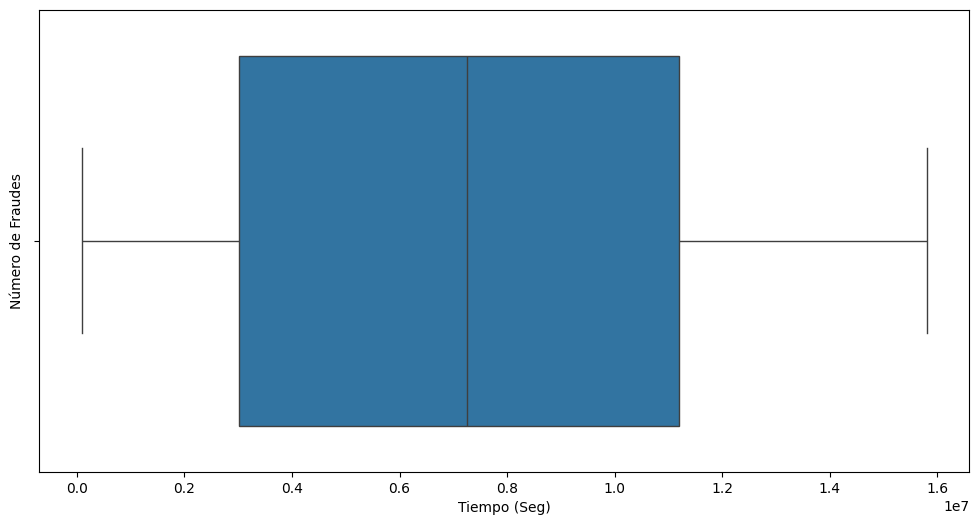

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, x='TransactionDT')
plt.ylabel('Número de Fraudes')
plt.xlabel('Tiempo (Seg)')
#plt.savefig(base_dir + 'trabs_total_box_plot')
plt.show()

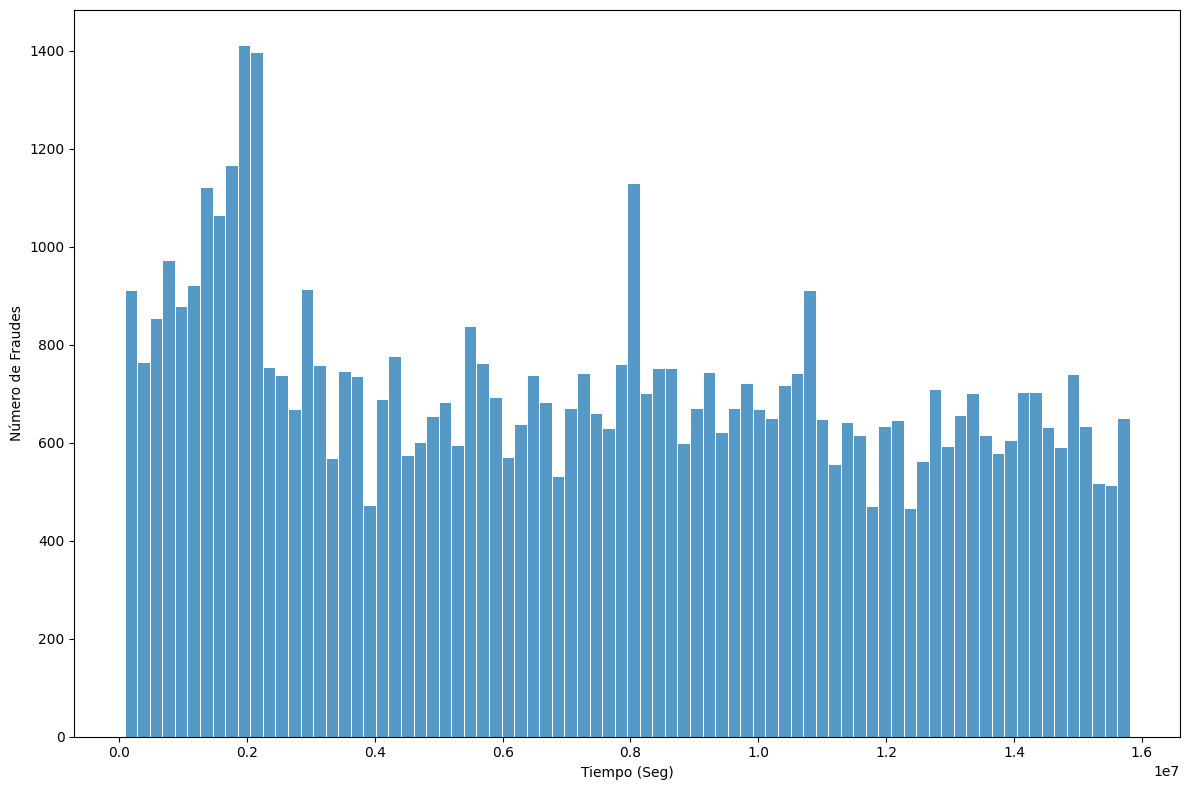

In [94]:
fig, axs = plt.subplots(tight_layout=True, figsize=(12, 8))

sns.histplot(data=df_train, x='TransactionDT', bins=80, color='tab:blue', edgecolor="white", linewidth=0.7, label='No')
axs.set_ylabel('Número de Fraudes')
axs.set_xlabel('Tiempo (Seg)')

plt.show()


**Observación:** La distribución de los tiempo de transacción es casi uniforme, aunuque se observa que algunos tiempo de transacciones son más frecuente que otros.

### Columna ProductCD

**ProductCD**: código de producto, el producto para cada transacción.
- "El producto no necesariamente tiene que ser un 'producto' real (como un artículo para agregar al carrito de compras). Podría ser cualquier tipo de servicio."

In [95]:
df_train['ProductCD'].unique()

array(['H', 'C', 'W', 'R', 'S'], dtype=object)

<ipython-input-96-8e94c2e6a048>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(productCD,ax=ax,palette="tab10")


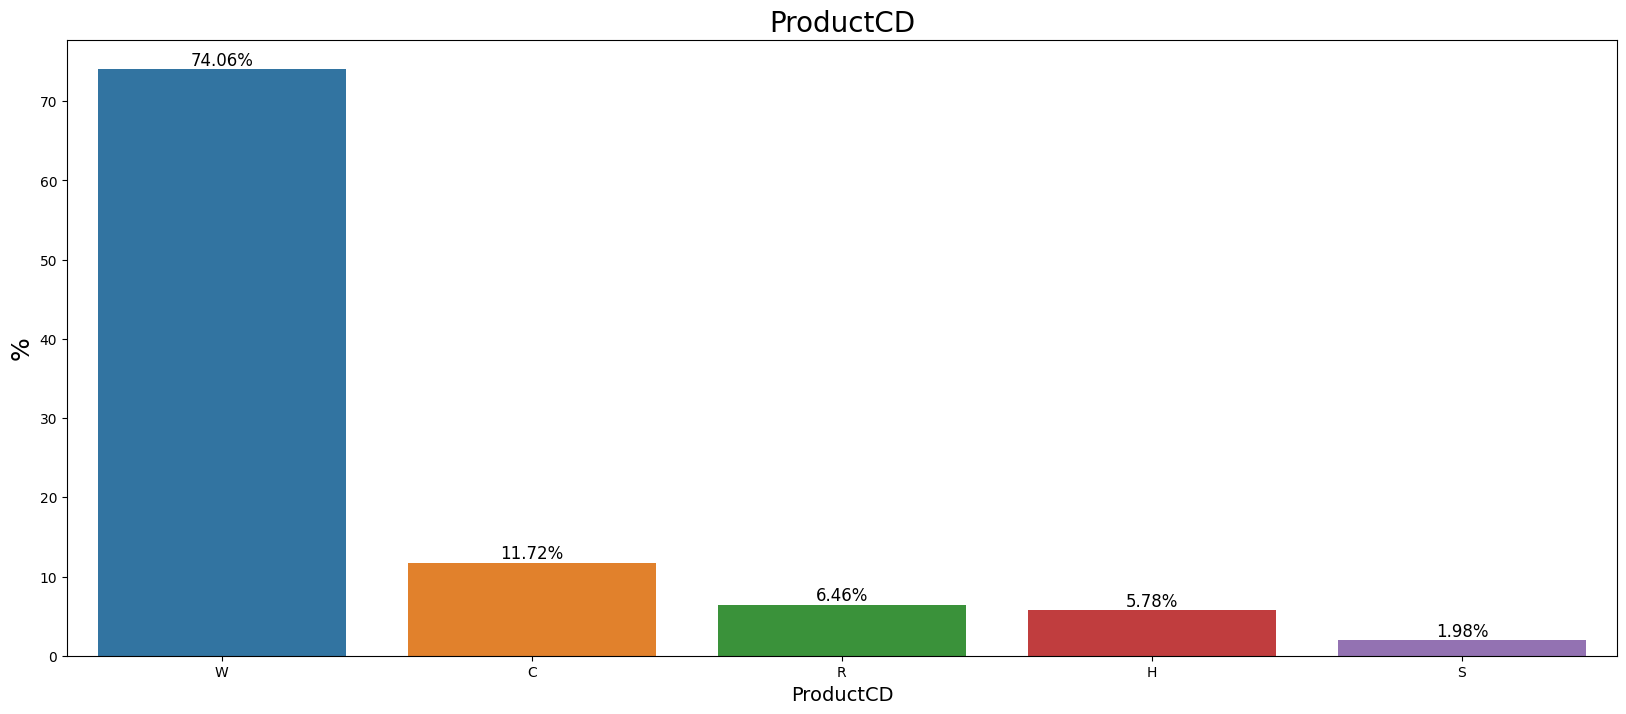

In [96]:
productCD = round((df_train['ProductCD'].value_counts()/len(df_train['ProductCD']))*100,2)
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(productCD,ax=ax,palette="tab10")
plt.title('ProductCD', fontsize=20)
plt.xlabel('ProductCD', fontsize=14)
plt.ylabel('%', fontsize=18)
for container in ax.containers:
    ax.bar_label(container, fmt='%g%%', color='black', fontsize=12)
#plt.savefig(base_dir+'productcd')
plt.show()

**Observación:** El tipo de producto con mayor transacción es el "W" con 74.39%, seguido del producto "C" con 11.55%

**Obervación:**
La gráfica anterior muestra los tres países con el mayor número de transacciones. El país con el código 87 tiene la mayor cantidad de transacciones, casi el 99% de las transacciones.


### Columna P_emaildomain

**P_emaildomain**: dominio de correo electrónico del comprador.

**Observación:** Dominio de correo electrónico del comprador (purchaser) y del destinatario (recipient) respectivamente la mayor parte de la transacción lo hace con "gmail"

## Car


**card1 - card6**: información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco emisor, país, etc.
- "Información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco emisor, país, etc."

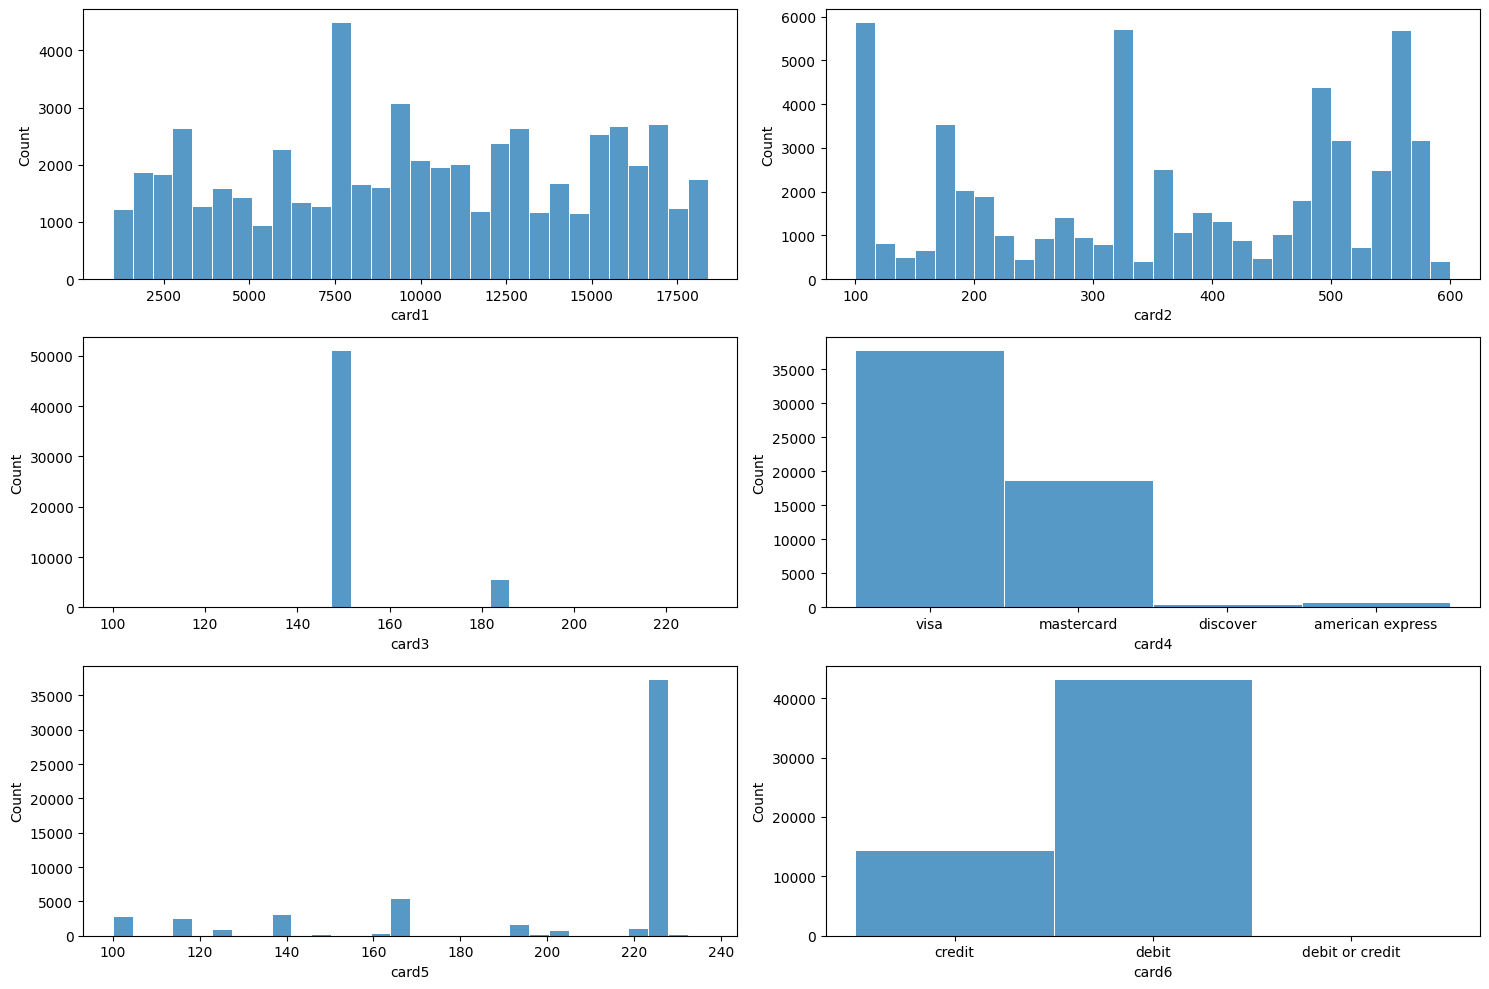

In [97]:
cards = ['card1', 'card2', 'card3', 'card4', 'card5',
       'card6']


# Crear subplots para cada rango de valor
fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharey=False, tight_layout=True)

# Iterar sobre los subplots y los rangos
for i, ax in enumerate(axs.flatten()):
        sns.histplot(data=df_train, x=cards[i], bins=30,
                     edgecolor="white", linewidth=0.7, log_scale=False, ax=ax)

# Ajustar el espacio entre subplots y mostrar la figura
plt.tight_layout()
plt.show()


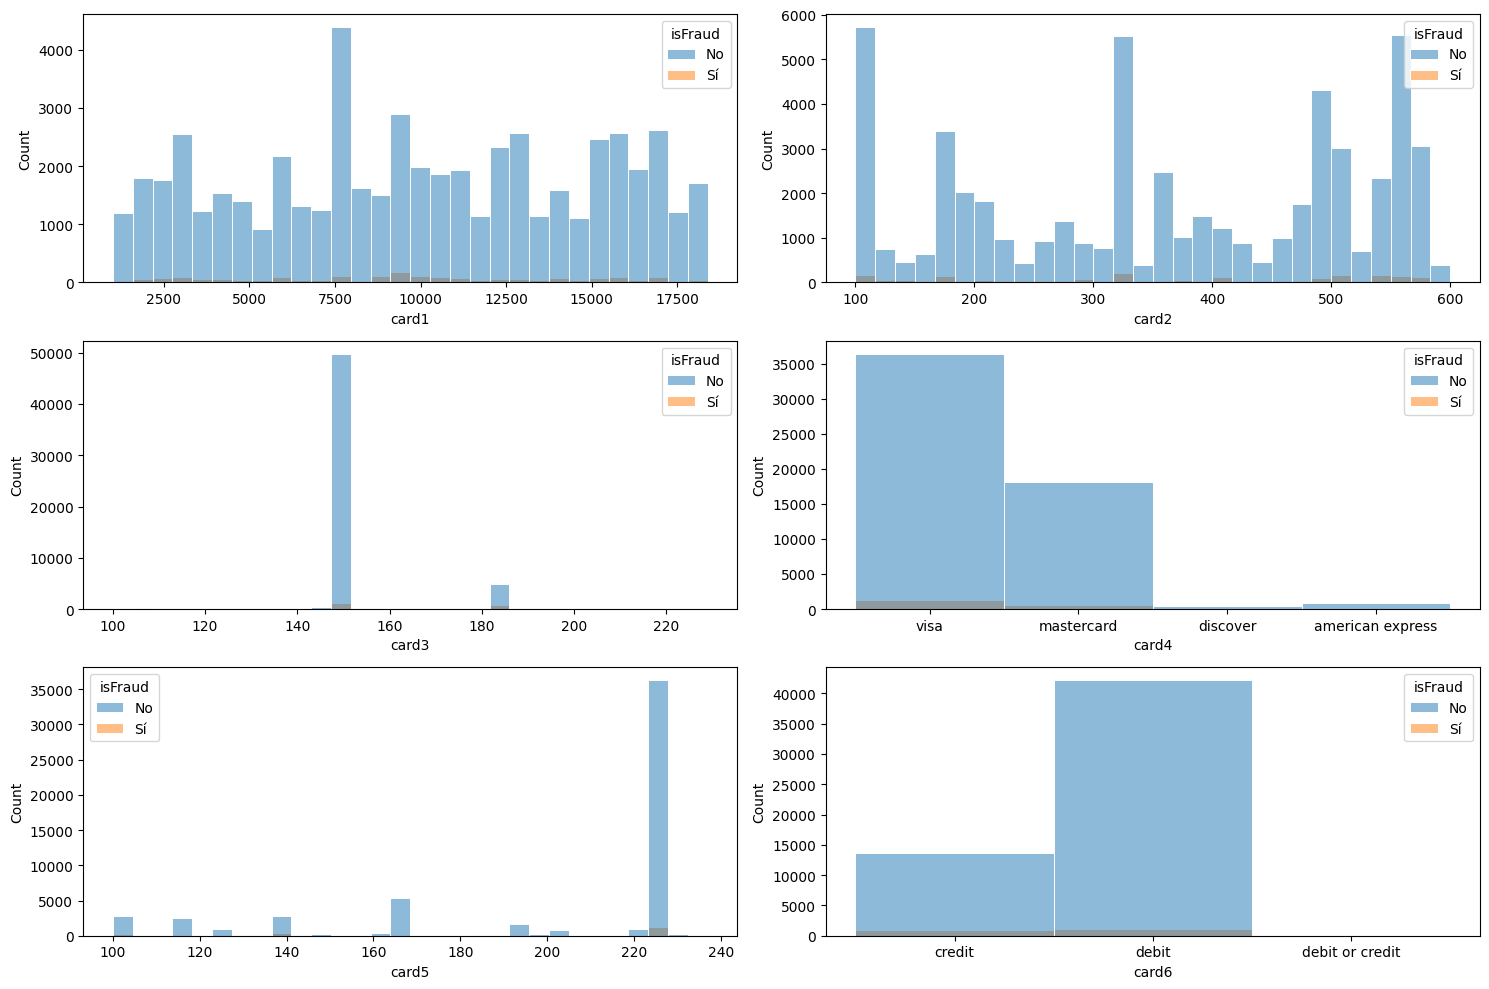

In [98]:
cards = ['card1', 'card2', 'card3', 'card4', 'card5',
       'card6']


# Crear subplots para cada rango de valor
fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharey=False, tight_layout=True)

# Iterar sobre los subplots y los rangos
for i, ax in enumerate(axs.flatten()):
        sns.histplot(data=df_train, x=cards[i], bins=30,
                     edgecolor="white", linewidth=0.7, log_scale=False, ax=ax,hue='isFraud')

# Ajustar el espacio entre subplots y mostrar la figura
plt.tight_layout()
plt.show()


### **C1-C14**

**C1-C14**: conteo, como cuántas direcciones están asociadas con la tarjeta de pago, etc.
- "Conteos de variables C1-C15: ¿Serían como recuentos de números de teléfono, direcciones de correo electrónico, nombres asociados con el usuario? Tu suposición es buena, además de dispositivos, direcciones IP, dirección de facturación, etc. También son para el comprador y el destinatario, lo que duplica el número."

In [99]:
c_valores = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14']

In [100]:
df_train[c_valores].dtypes

C1     float64
C2     float64
C3     float64
C4     float64
C5     float64
C6     float64
C7     float64
C8     float64
C9     float64
C10    float64
C11    float64
C12    float64
C13    float64
C14    float64
dtype: object

In [101]:
df_train[c_valores].describe()

C1            C2            C3            C4            C5  \
count  57801.000000  57801.000000  57801.000000  57801.000000  57801.000000   
mean      13.728448     14.959620      0.005536      3.970589      5.548970   
std      127.944334    149.204968      0.165451     66.510165     25.820695   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      0.000000      0.000000      0.000000   
75%        3.000000      3.000000      0.000000      0.000000      1.000000   
max     4685.000000   5691.000000     26.000000   2253.000000    335.000000   

                 C6            C7            C8            C9           C10  \
count  57801.000000  57801.000000  57801.000000  57801.000000  57801.000000   
mean       8.898618      2.677566      4.903964      4.436100      5.044134   
std       69.175761     58.860534     91.008998     16.463599     91.520821   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      1.000000      0.000000   
75%        2.000000      0.000000      0.000000      2.000000      0.000000   
max     2253.000000   2255.000000   3331.000000    194.000000   3257.000000   

                C11           C12           C13           C14  
count  57801.000000  57801.000000  57801.000000  57801.000000  
mean       9.989256      3.831335     32.243525      8.176589  
std       90.694630     82.577600    126.862337     48.140830  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      1.000000      1.000000  
50%        1.000000      0.000000      3.000000      1.000000  
75%        2.000000      0.000000     12.000000      2.000000  
max     3188.000000   3188.000000   2918.000000   1429.000000

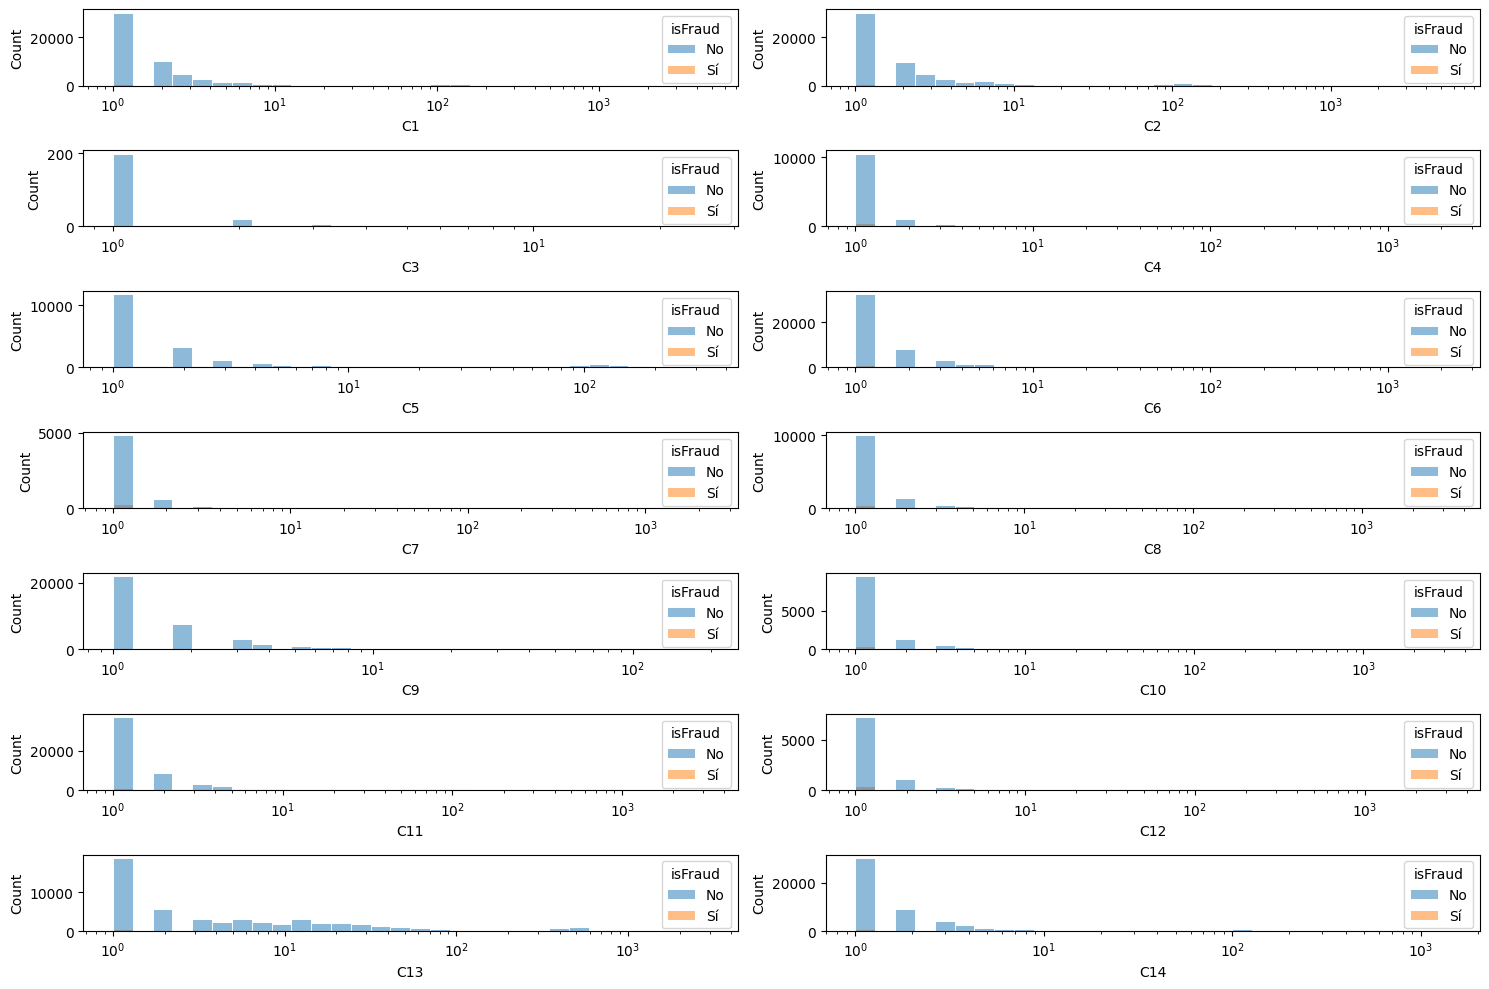

In [102]:


# Crear subplots para cada rango de valor
fig, axs = plt.subplots(7, 2, figsize=(15, 10), sharey=False, tight_layout=True)

# Iterar sobre los subplots y los rangos
for i, ax in enumerate(axs.flatten()):
        sns.histplot(data=df_train, x=c_valores[i], bins=30,
                     edgecolor="white", linewidth=0.7, log_scale=True, ax=ax,hue='isFraud')

# Ajustar el espacio entre subplots y mostrar la figura
plt.tight_layout()
plt.show()


In [118]:
V = [ 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

### Análisis Bivariado

### Características Numeŕicas

In [103]:
df_train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
       'TransactionAmt_Range'],
      dtype='object', length=113)

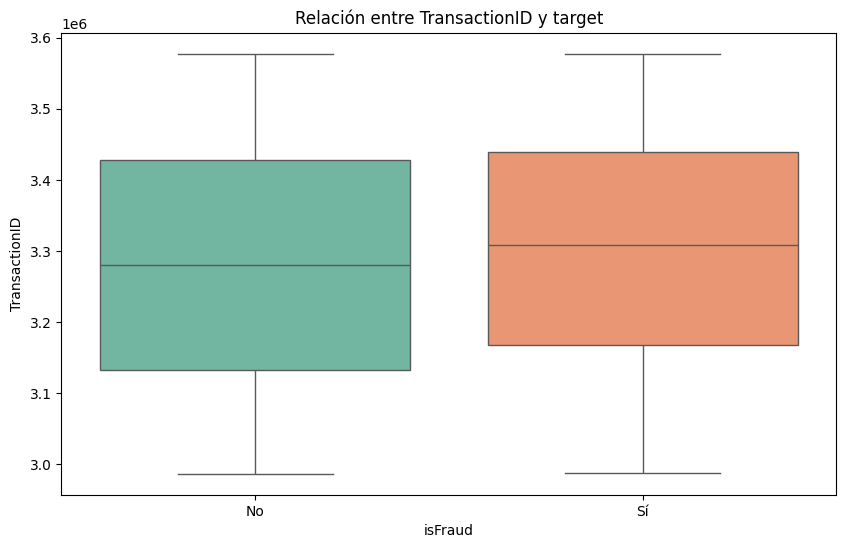

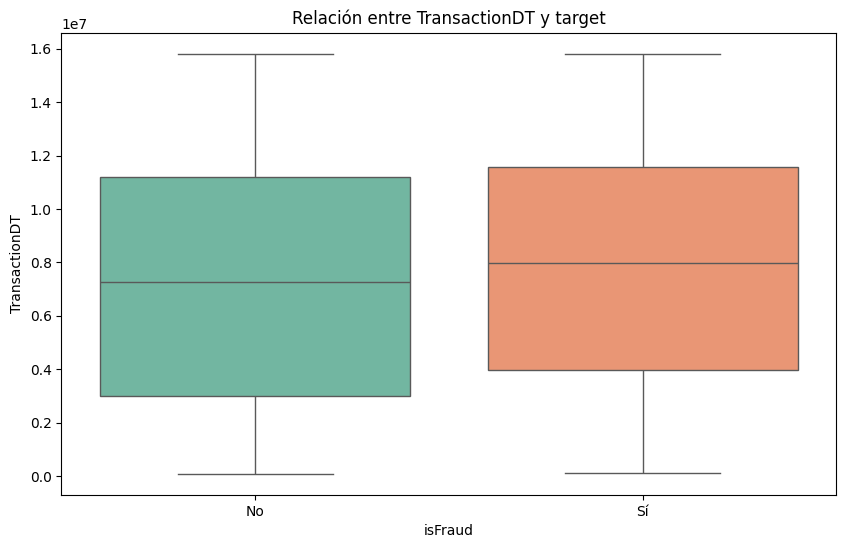

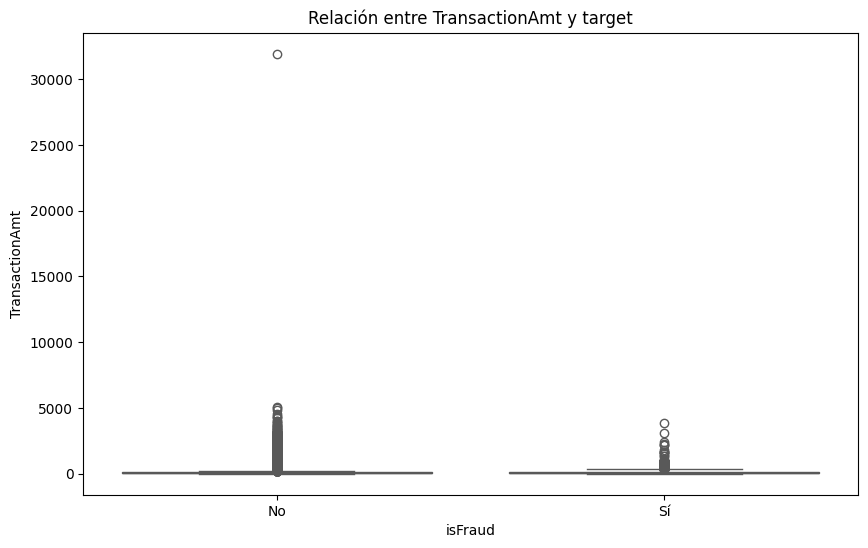

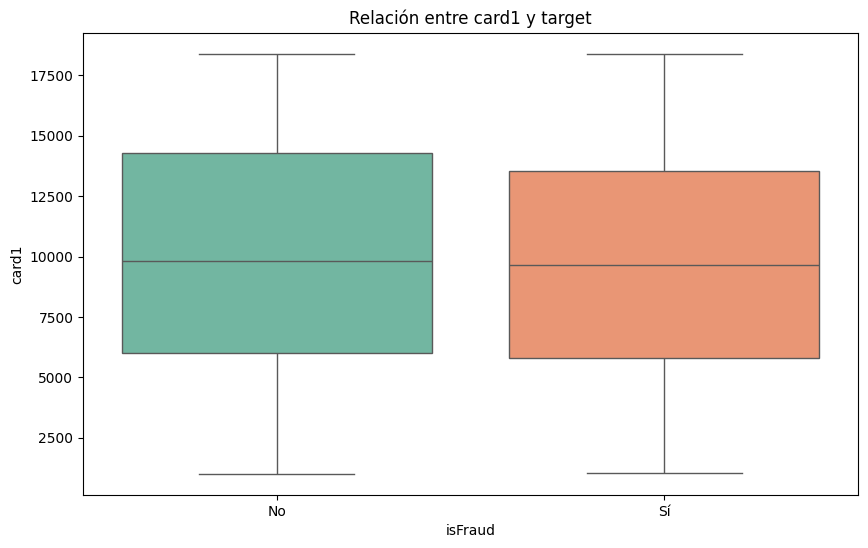

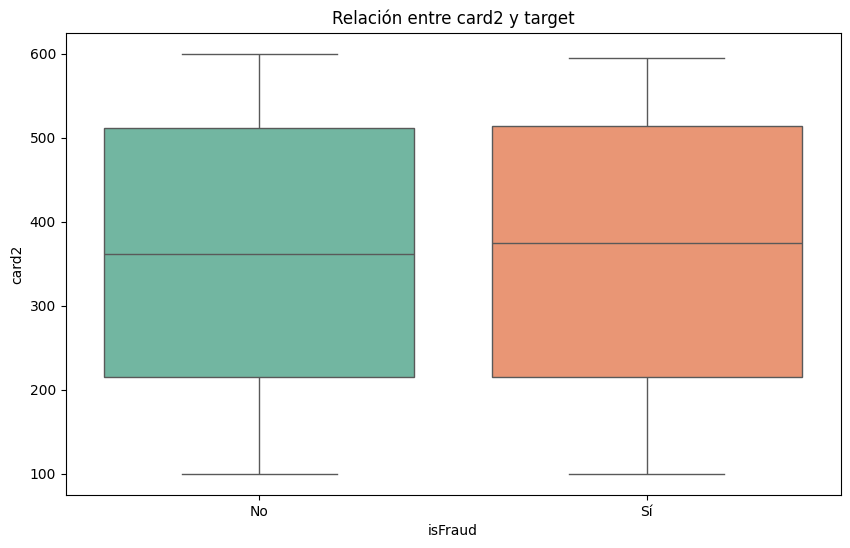

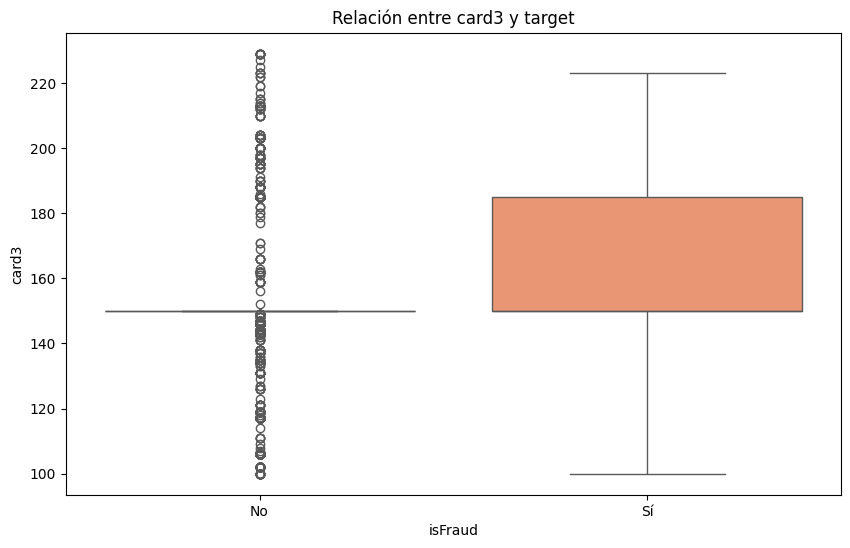

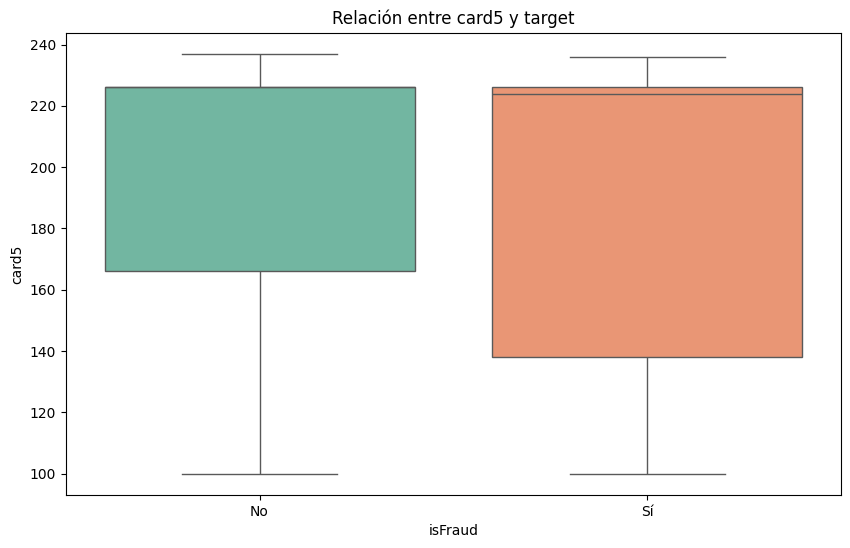

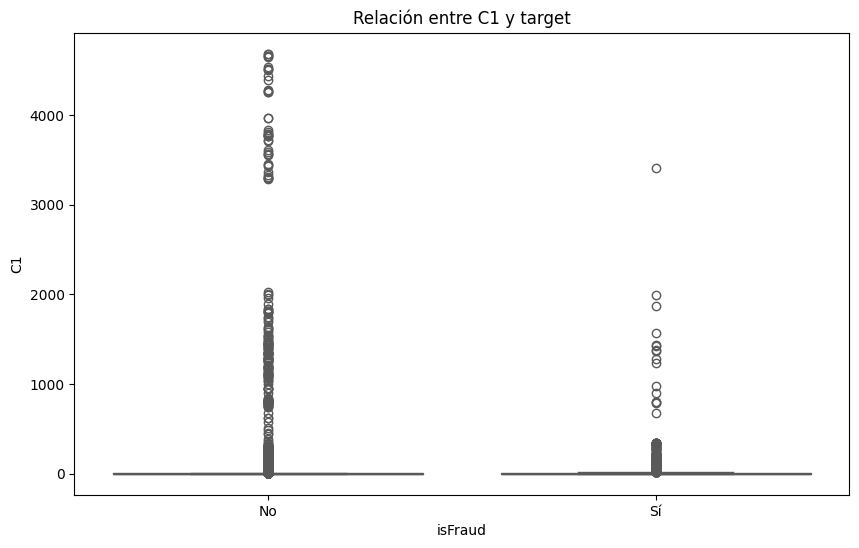

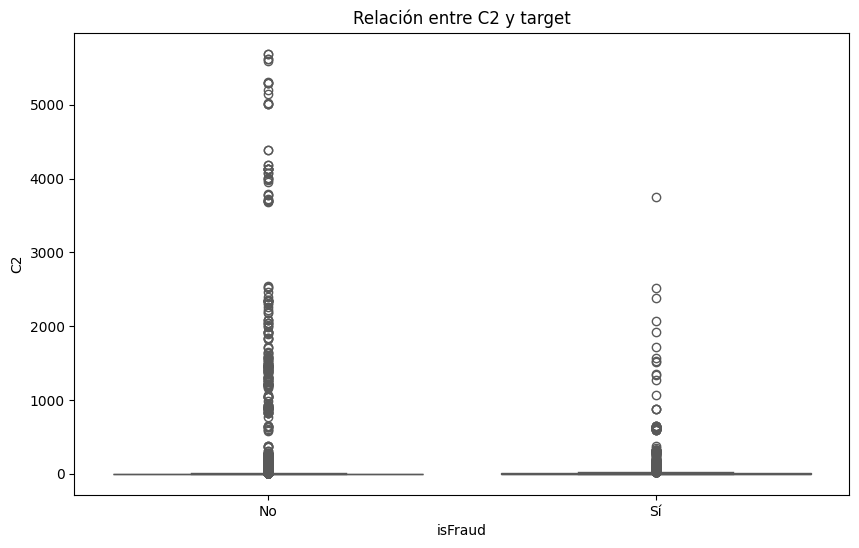

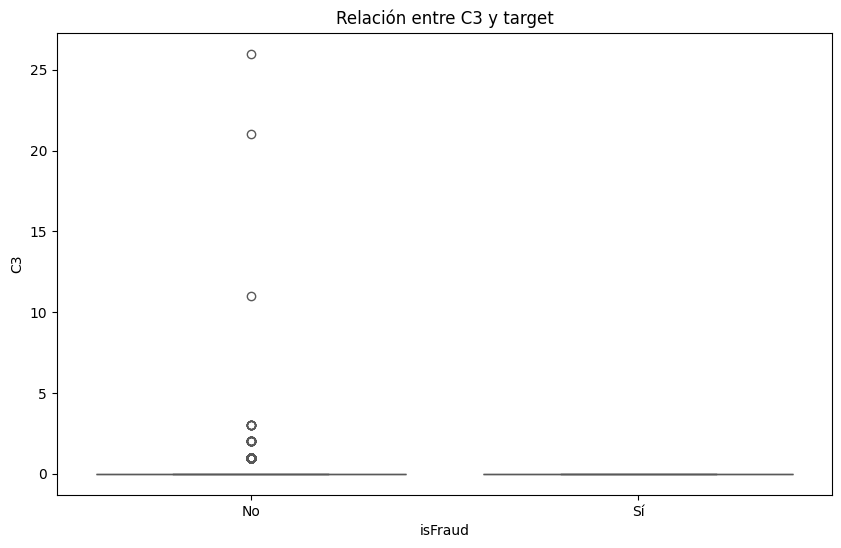

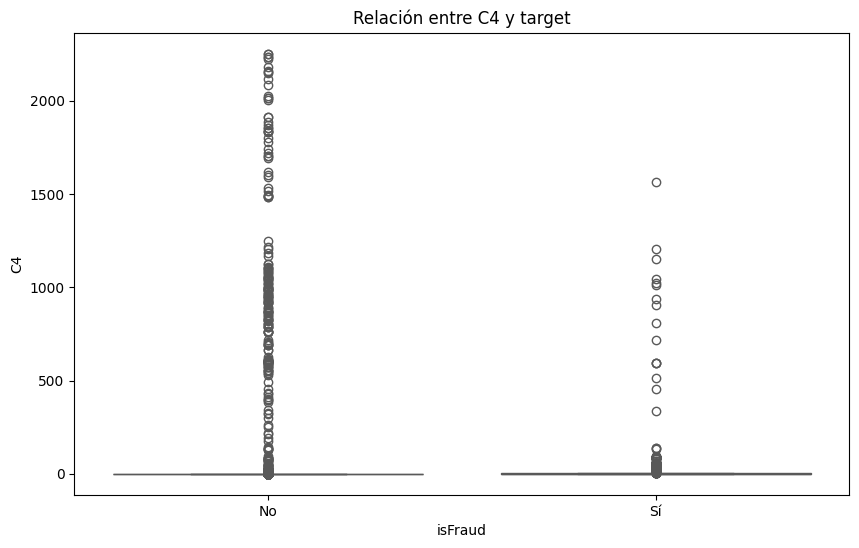

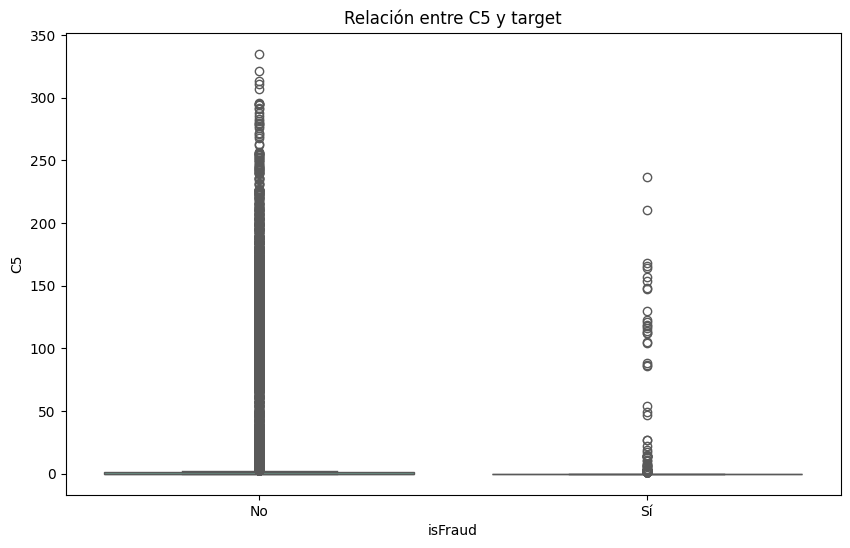

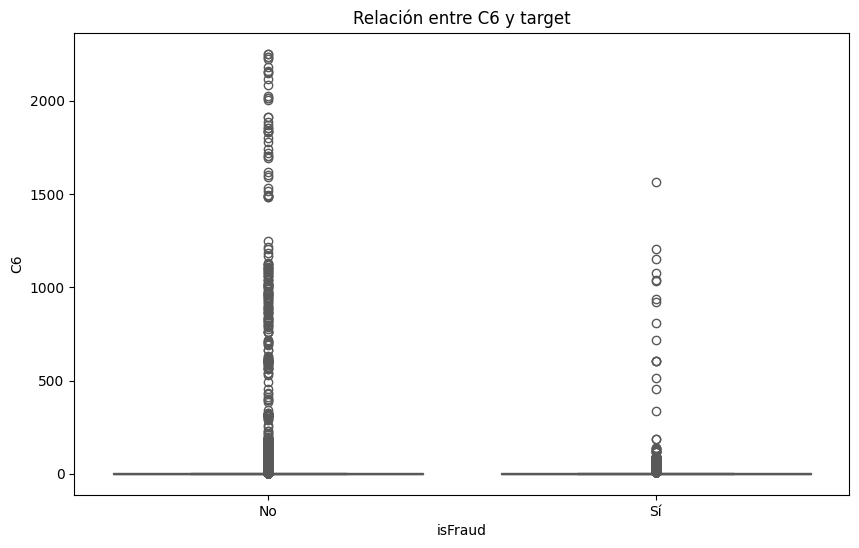

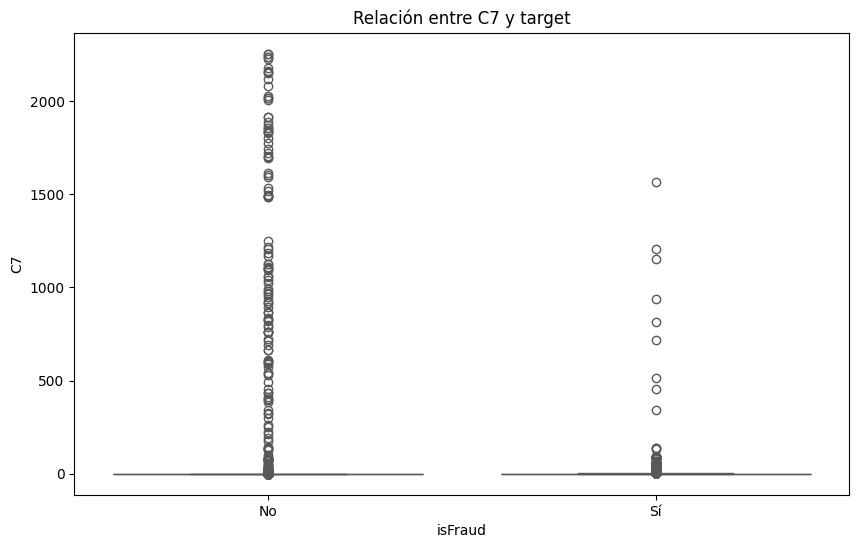

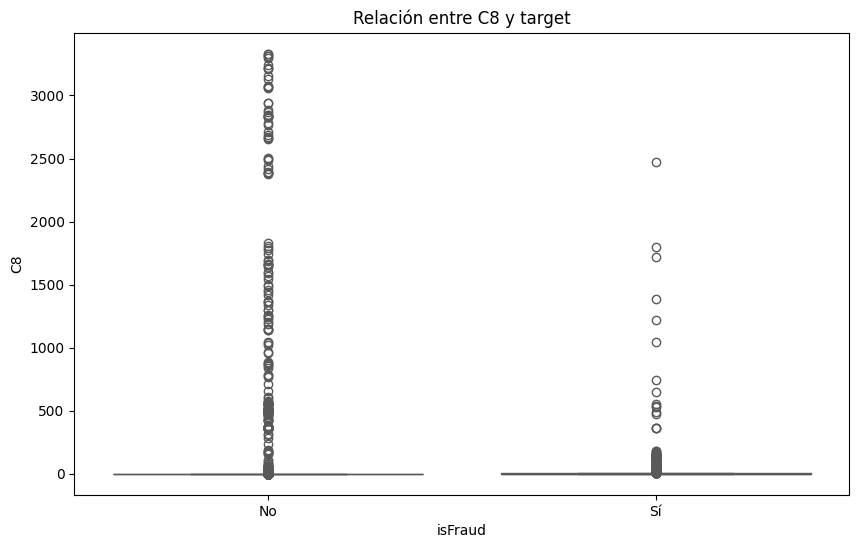

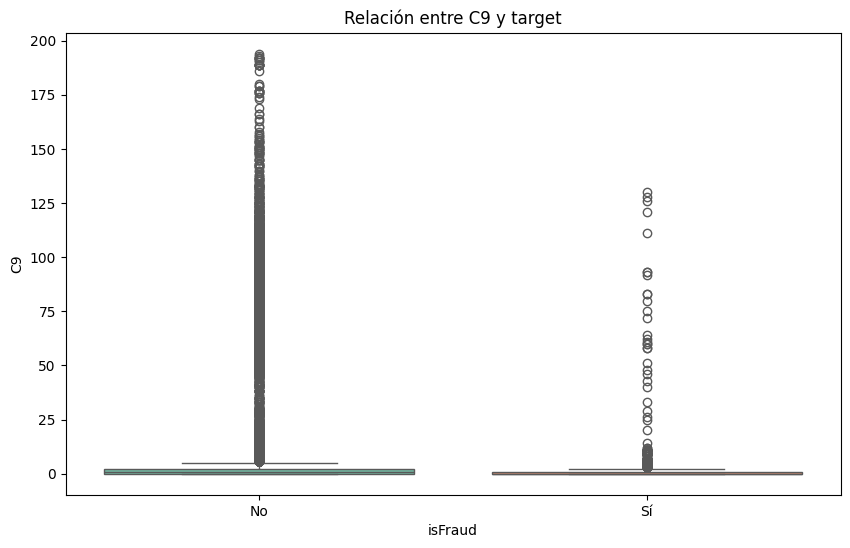

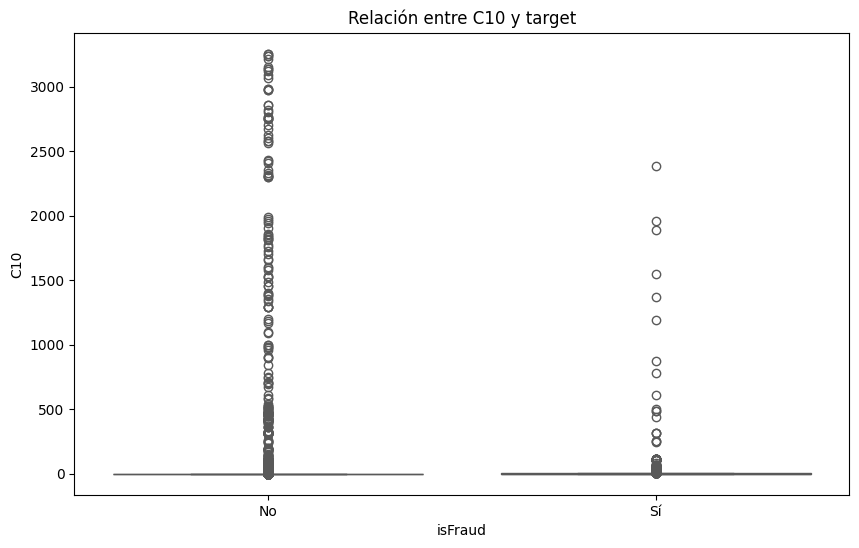

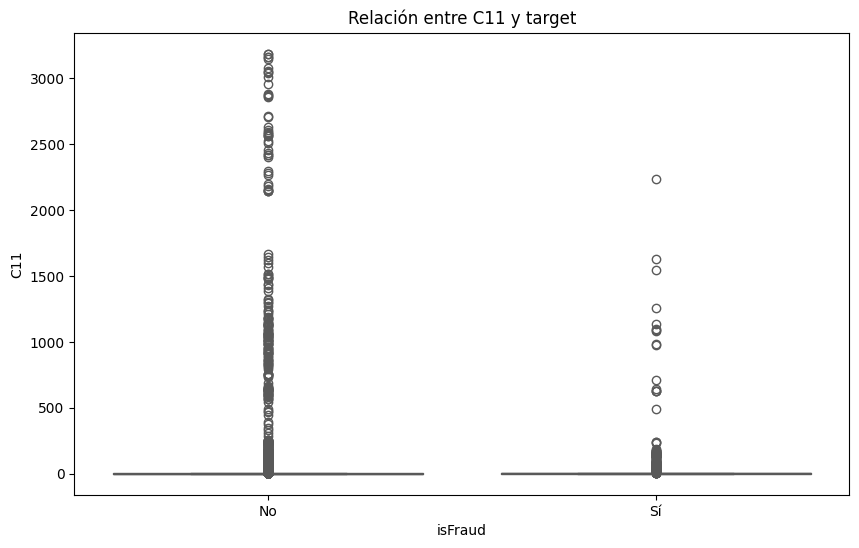

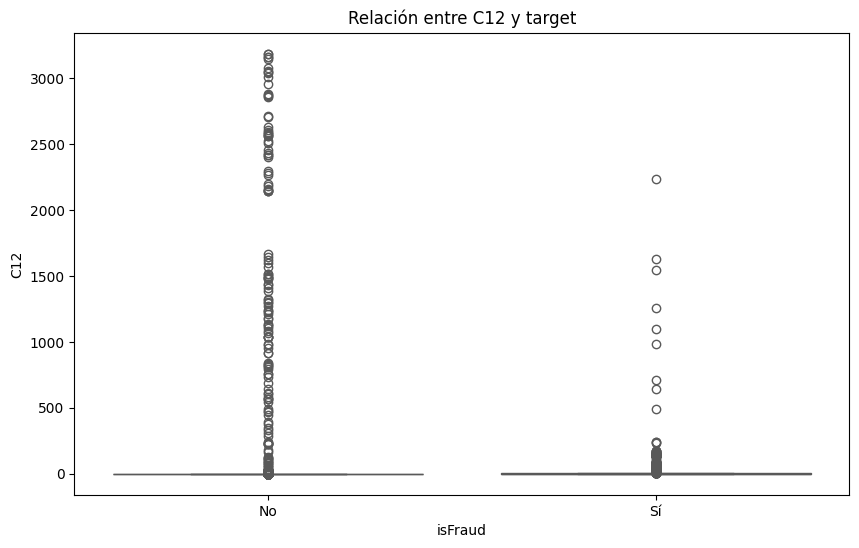

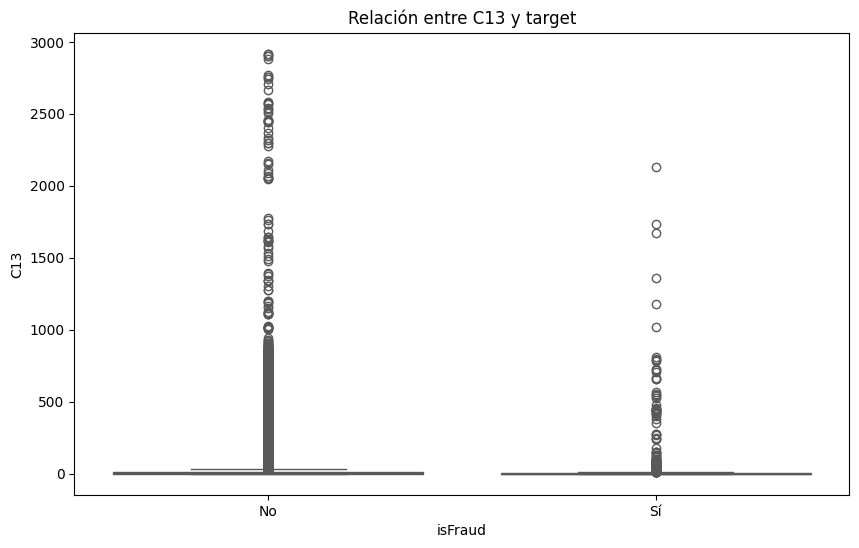

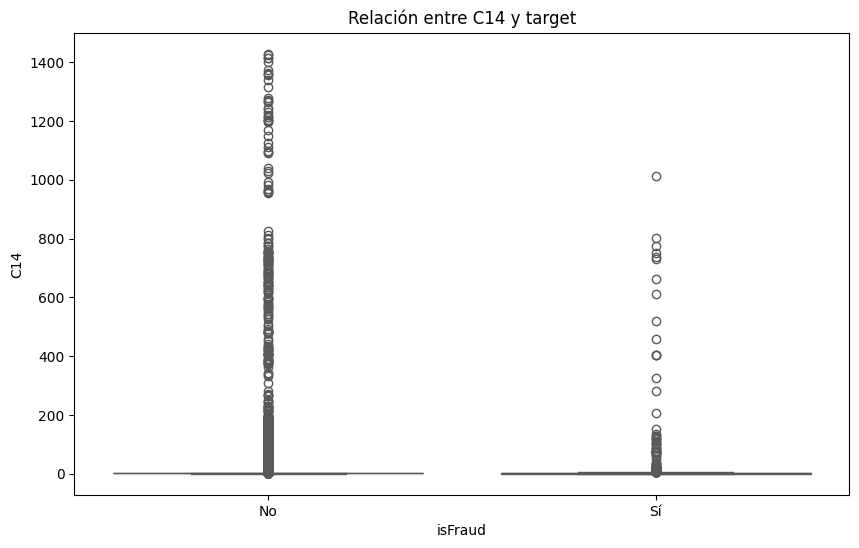

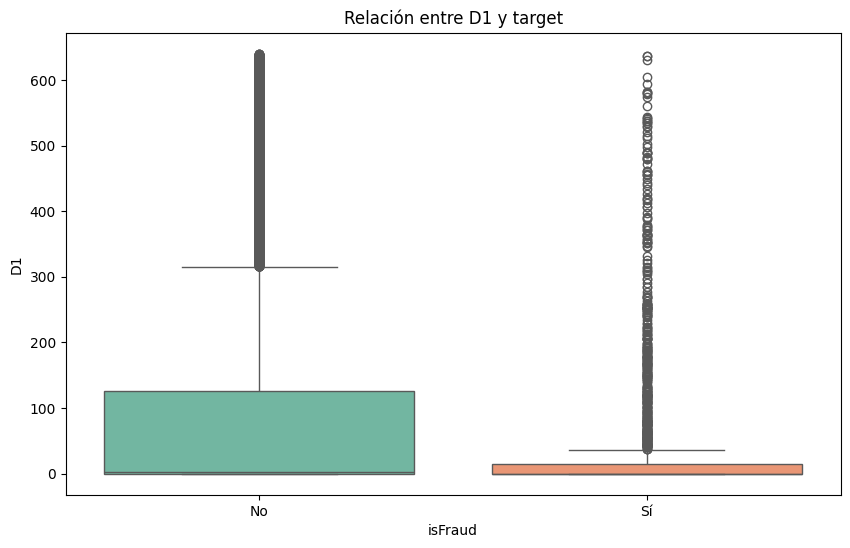

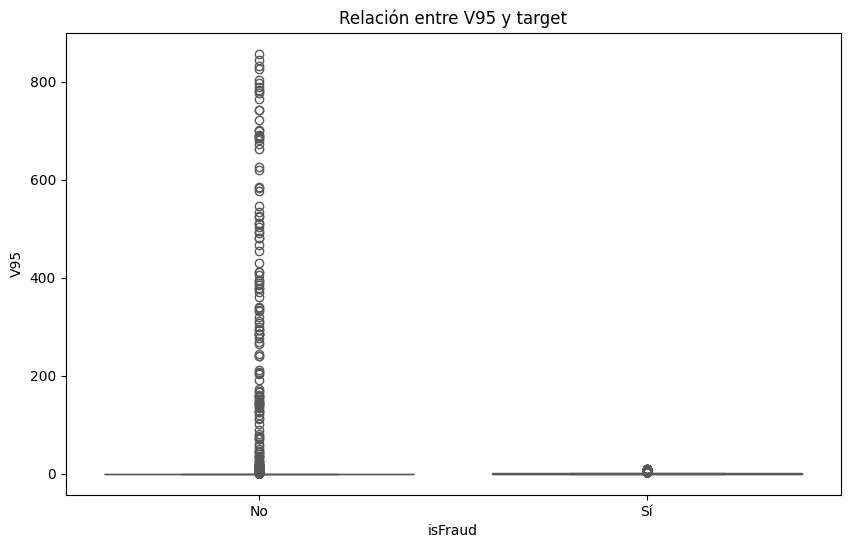

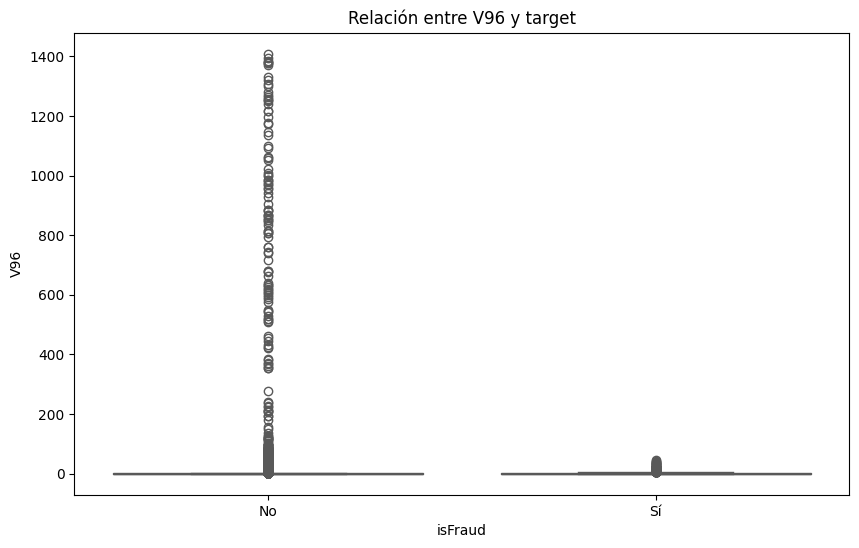

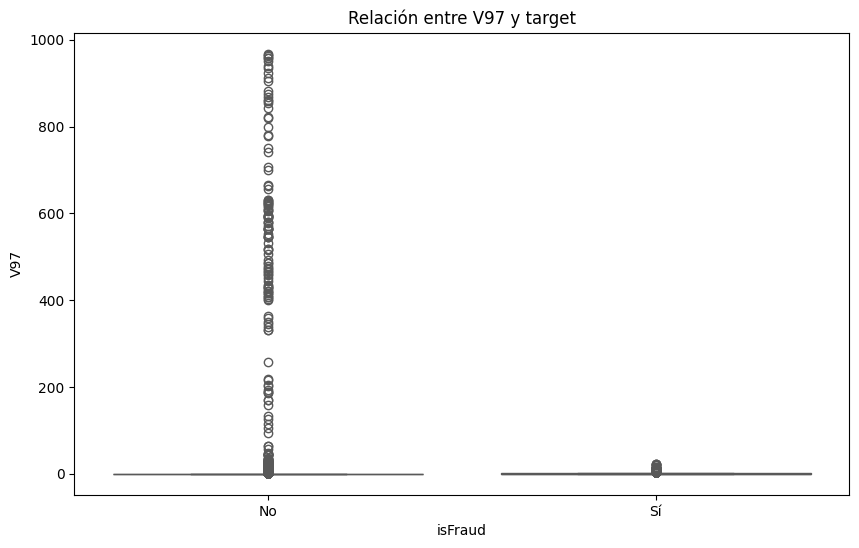

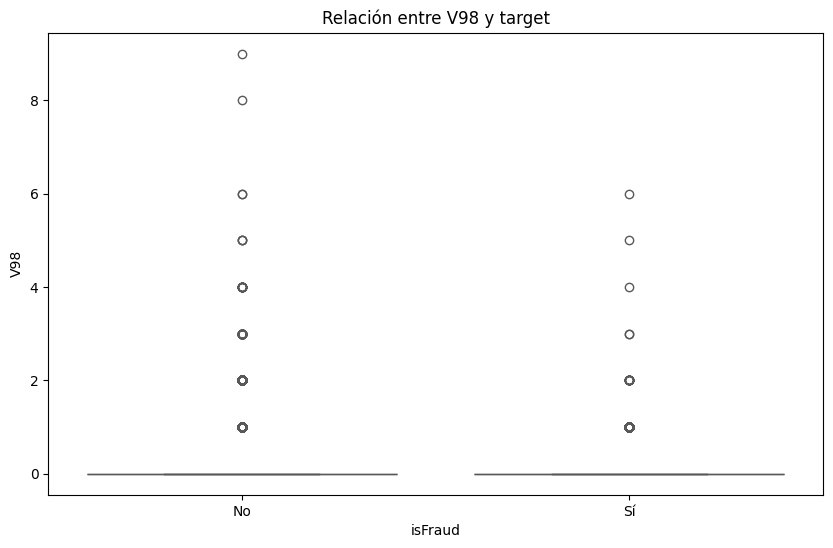

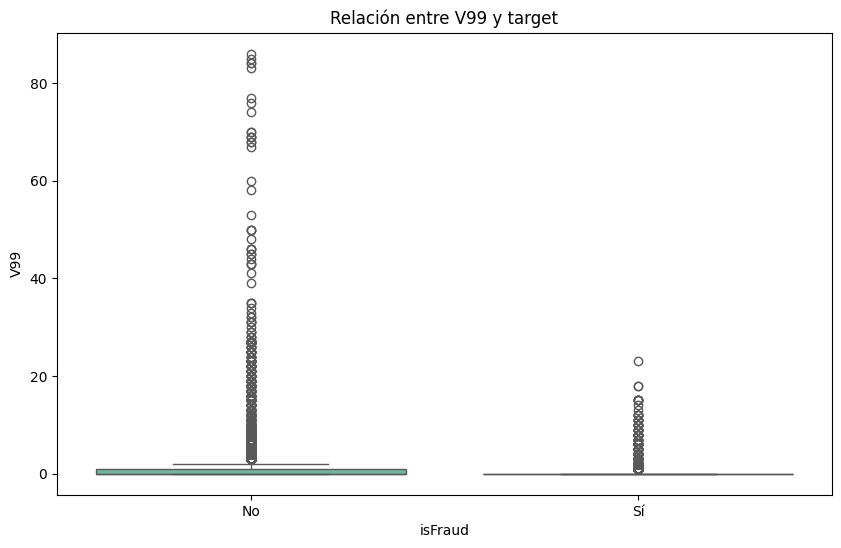

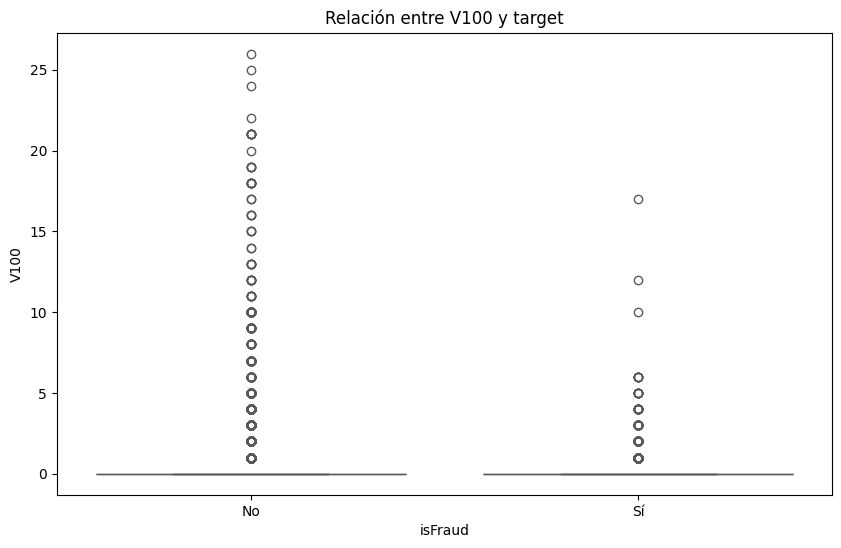

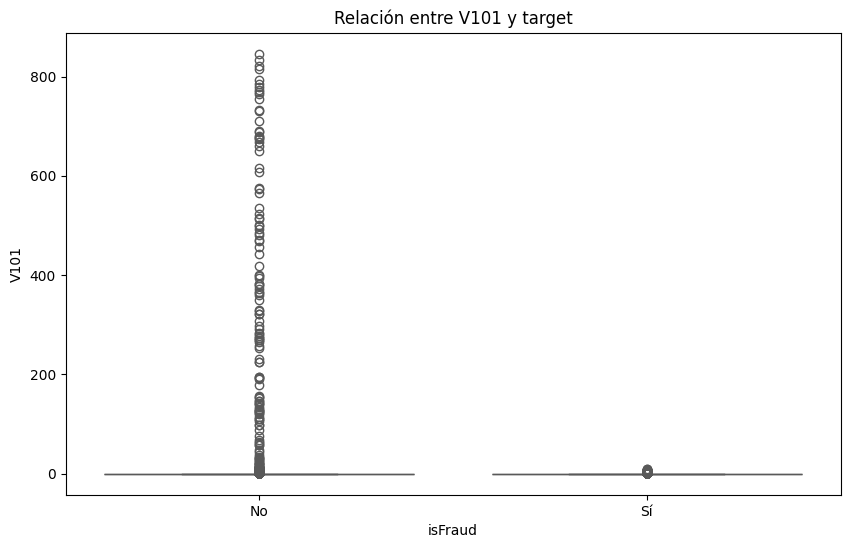

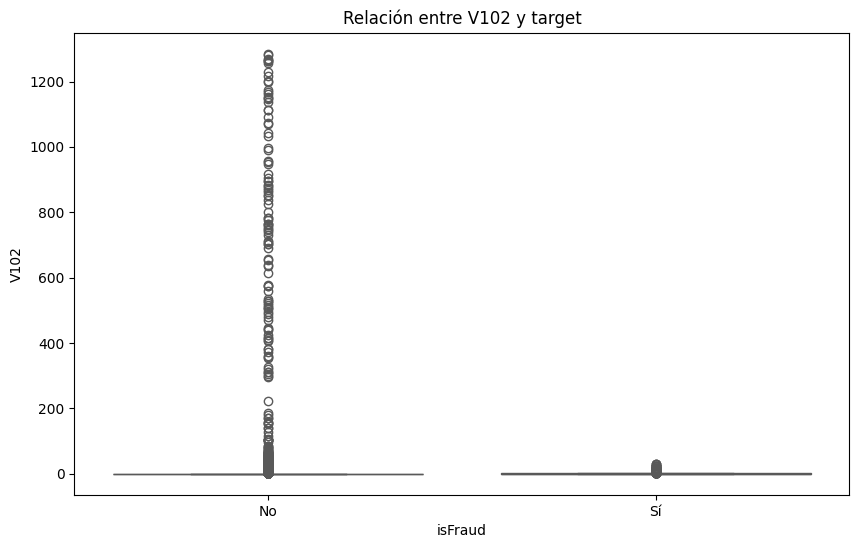

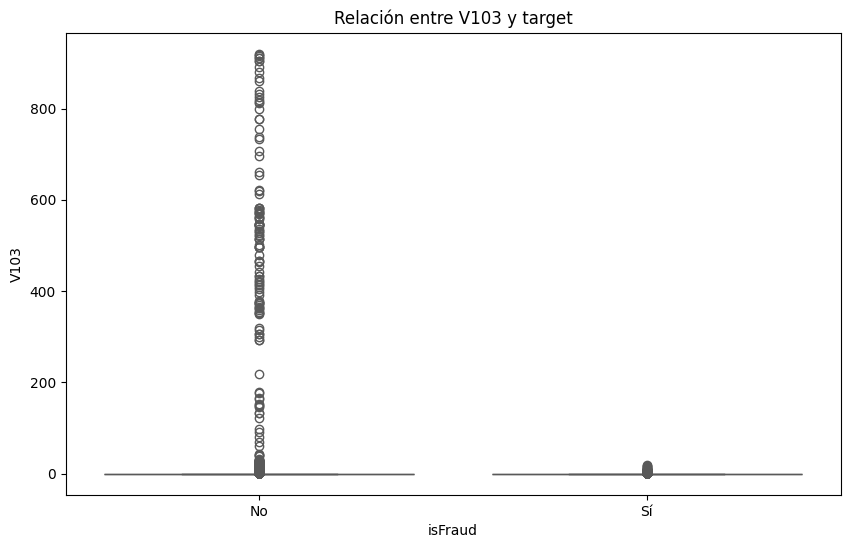

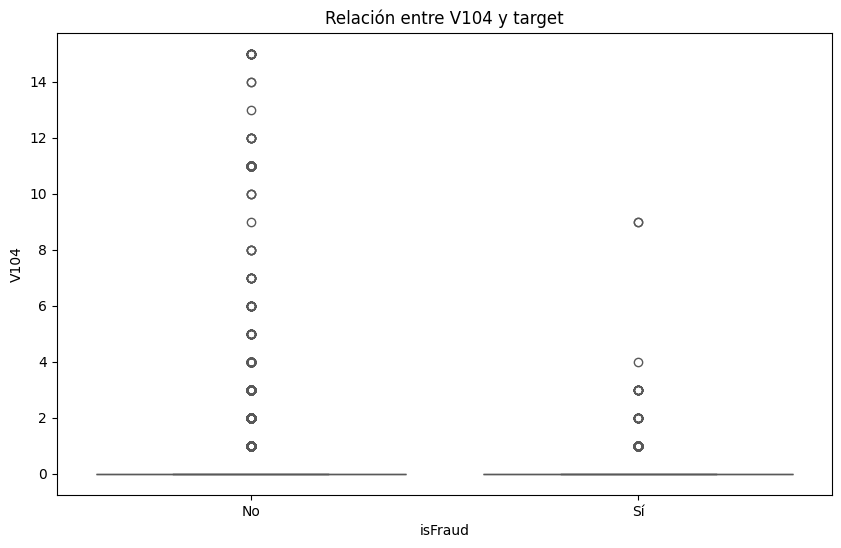

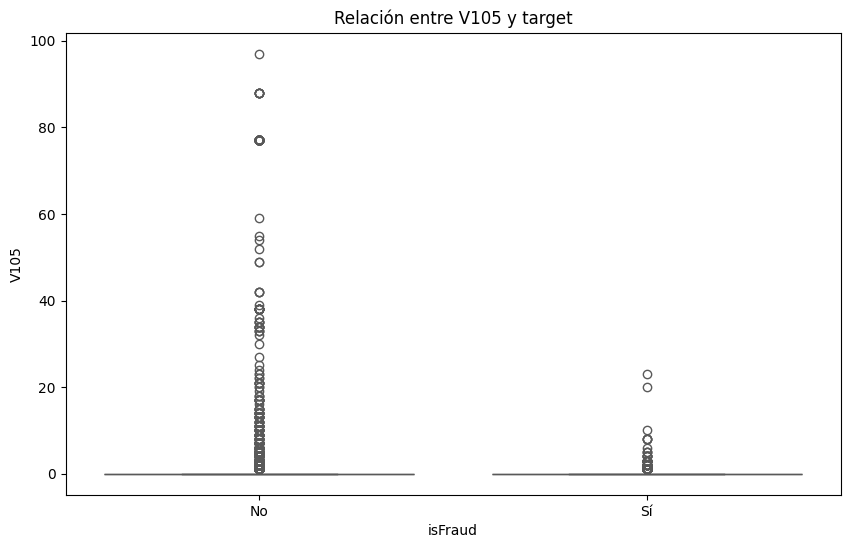

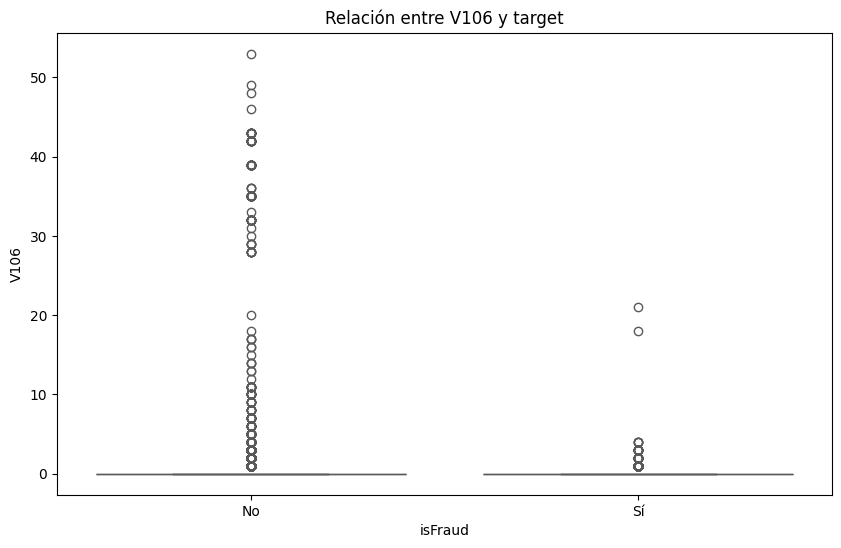

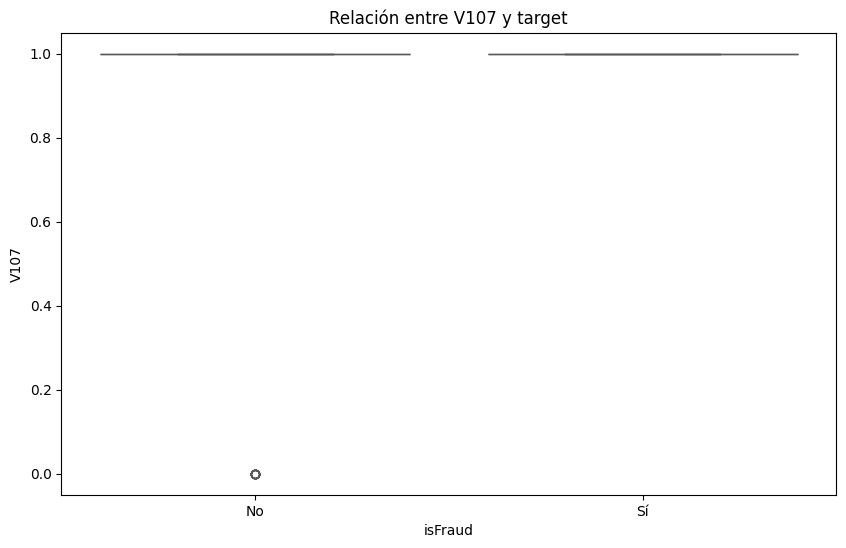

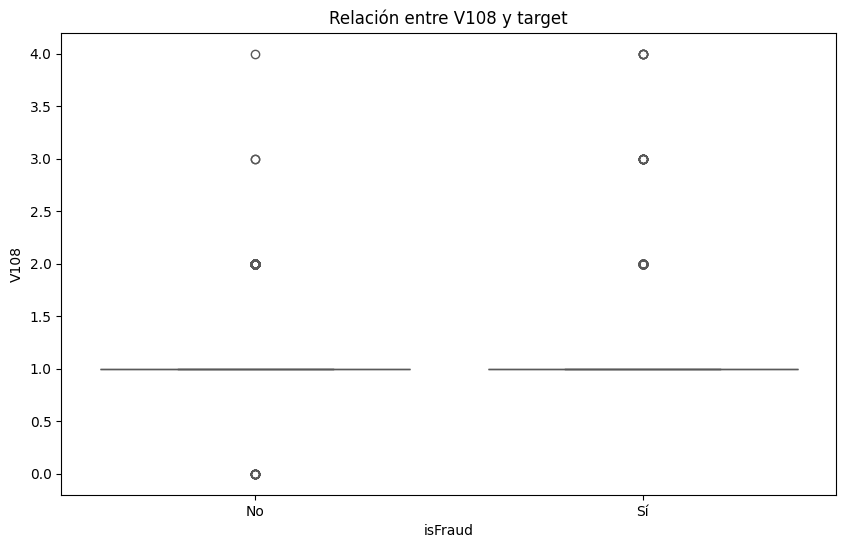

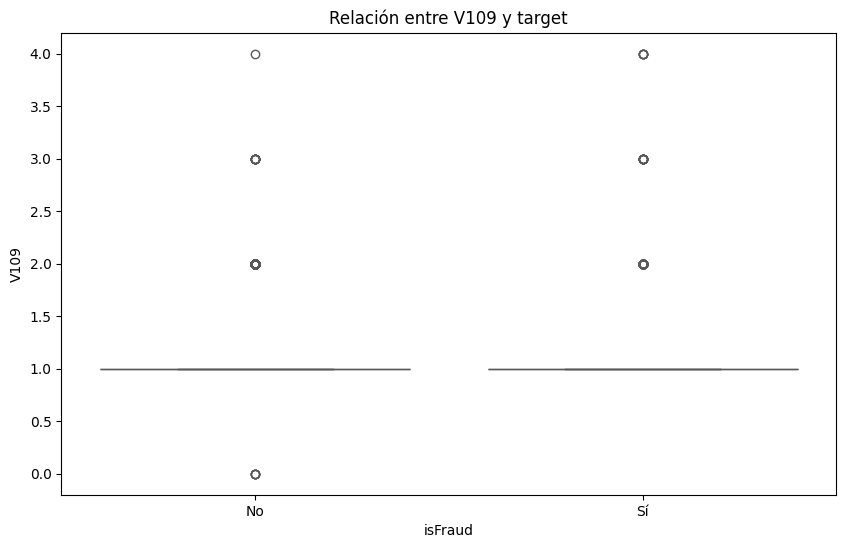

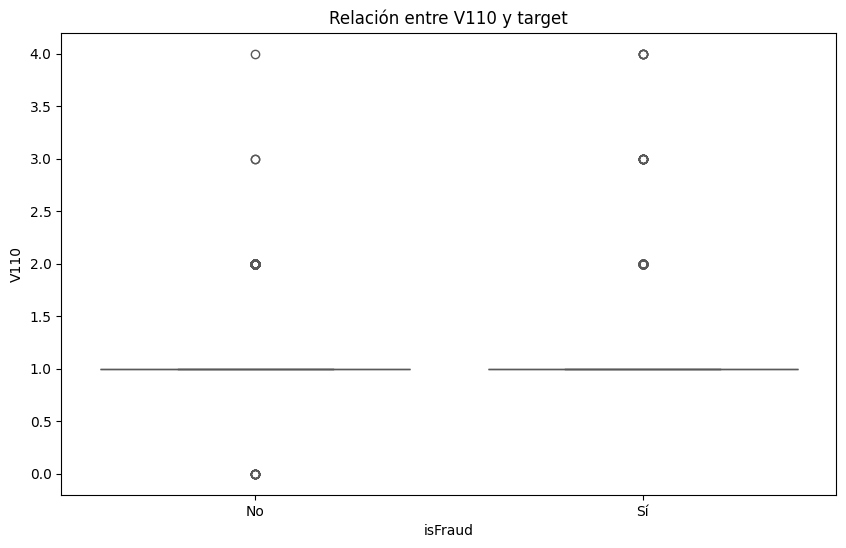

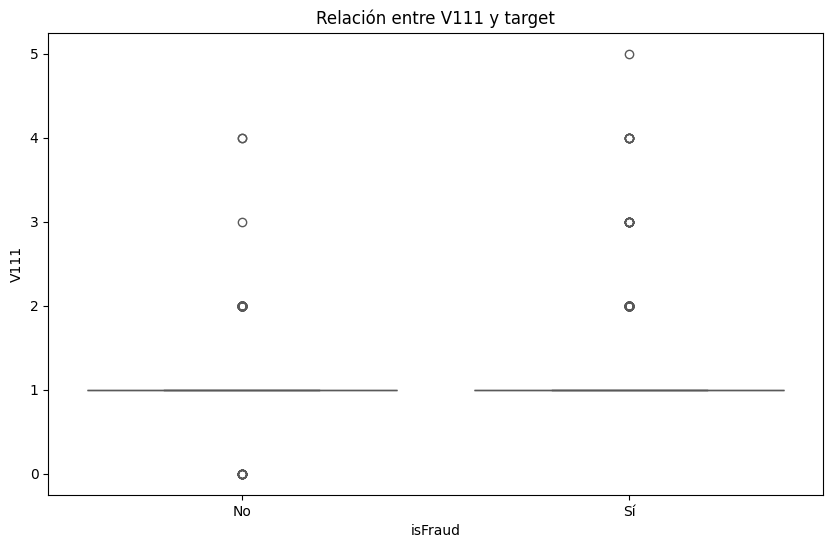

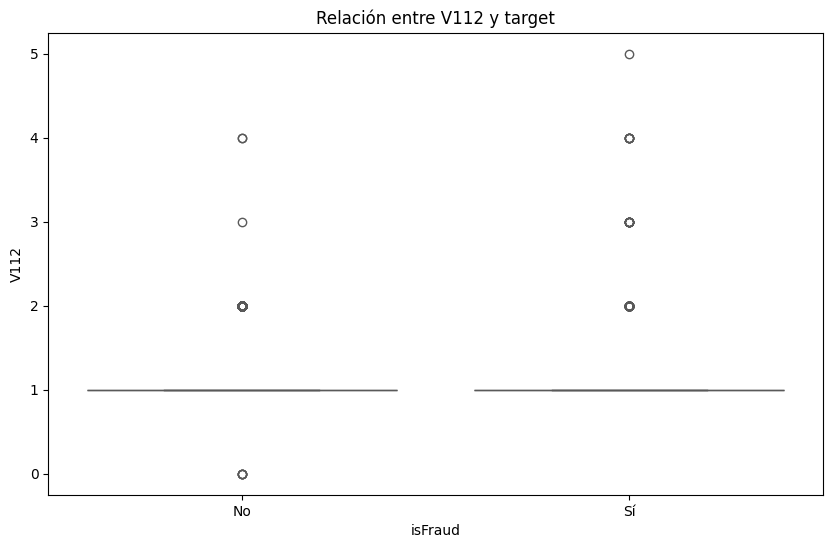

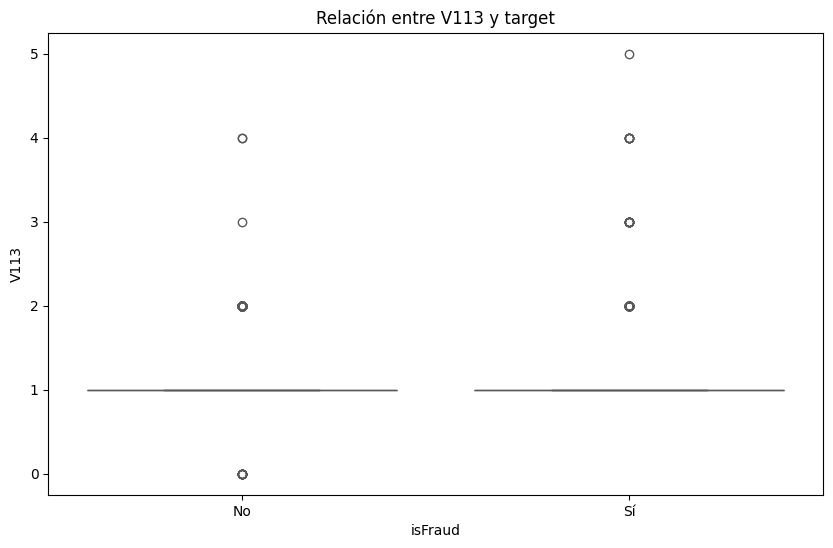

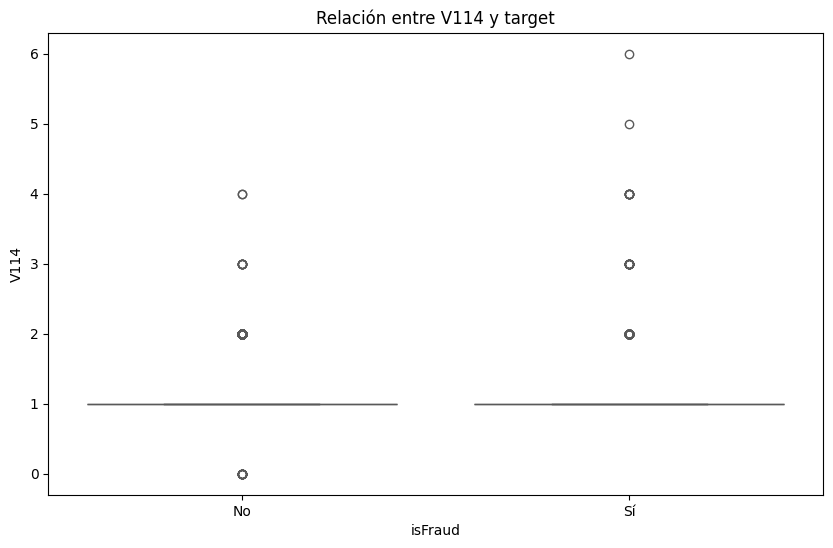

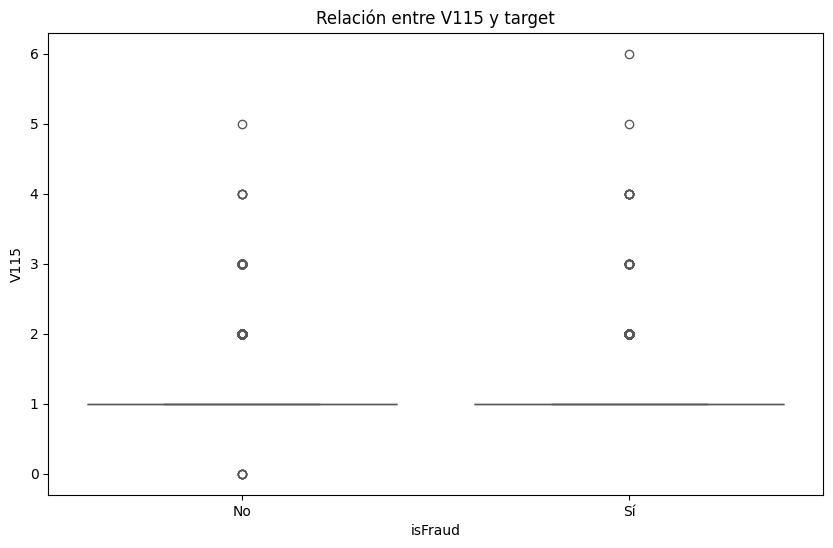

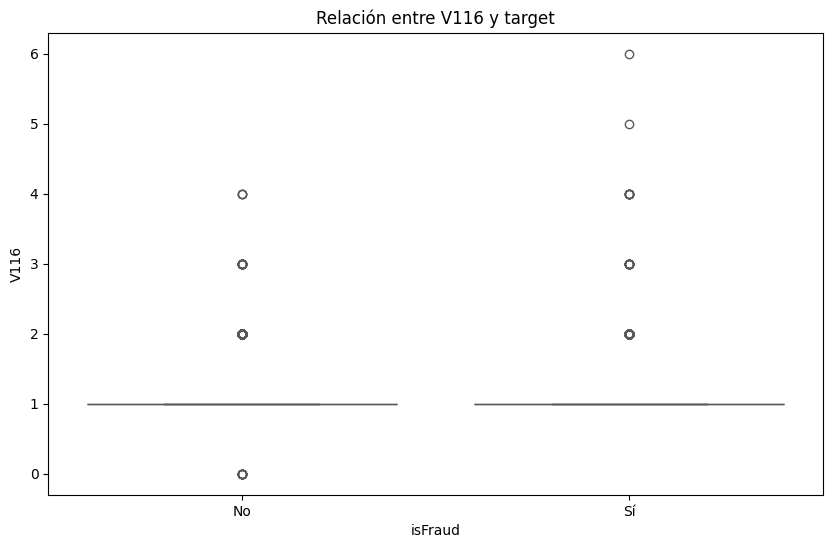

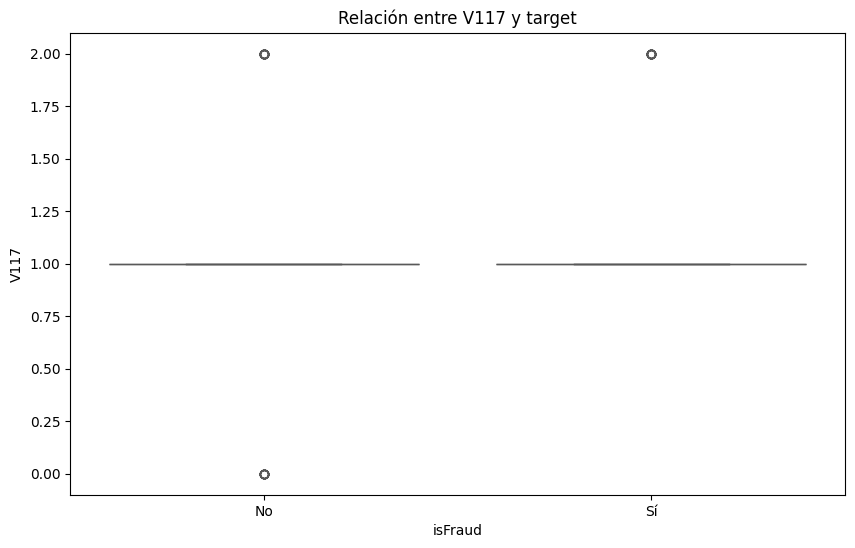

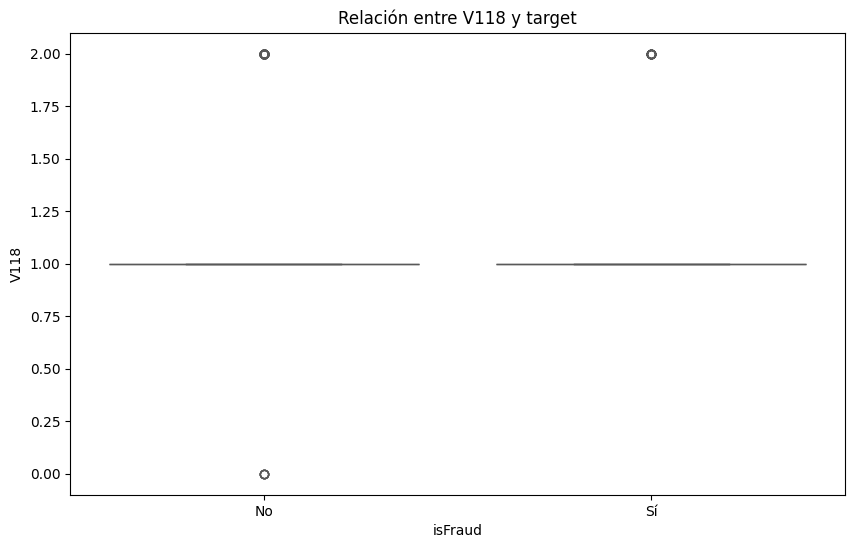

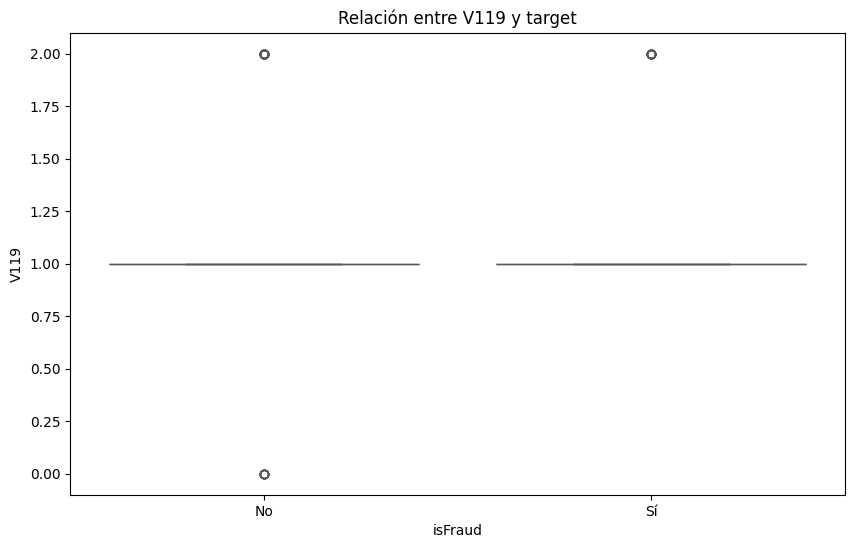

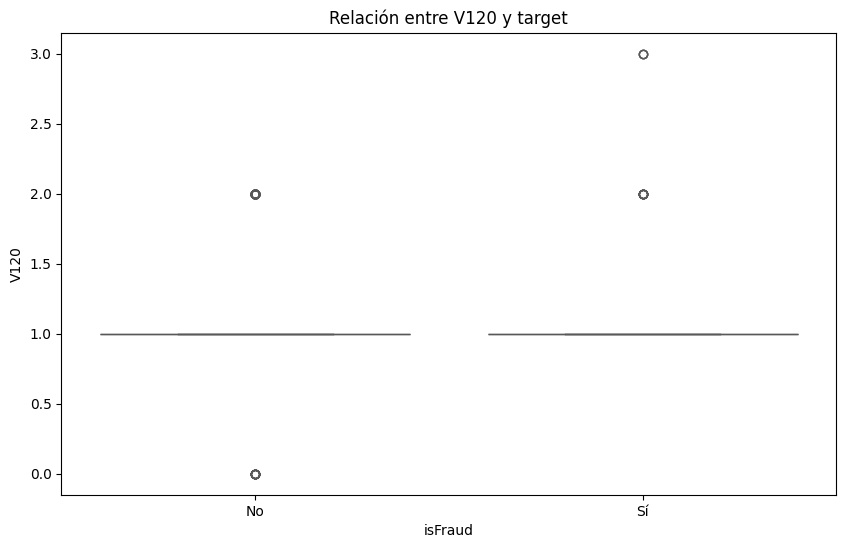

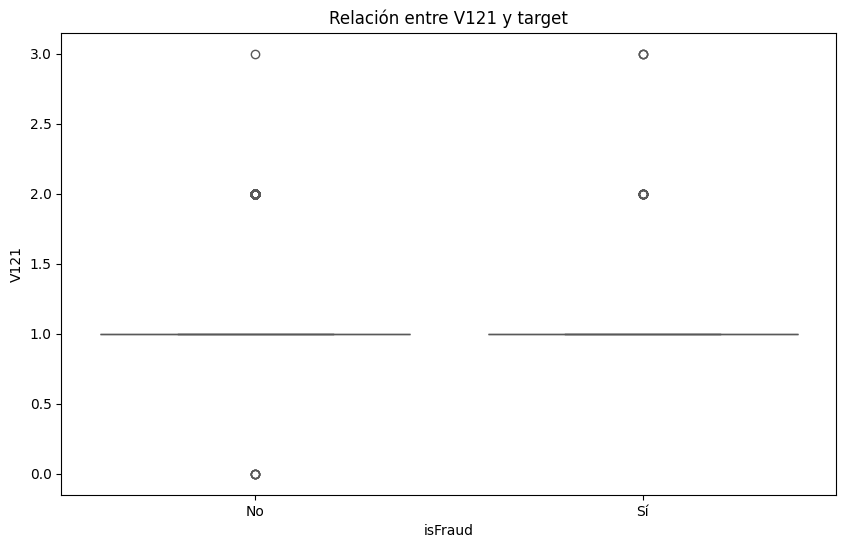

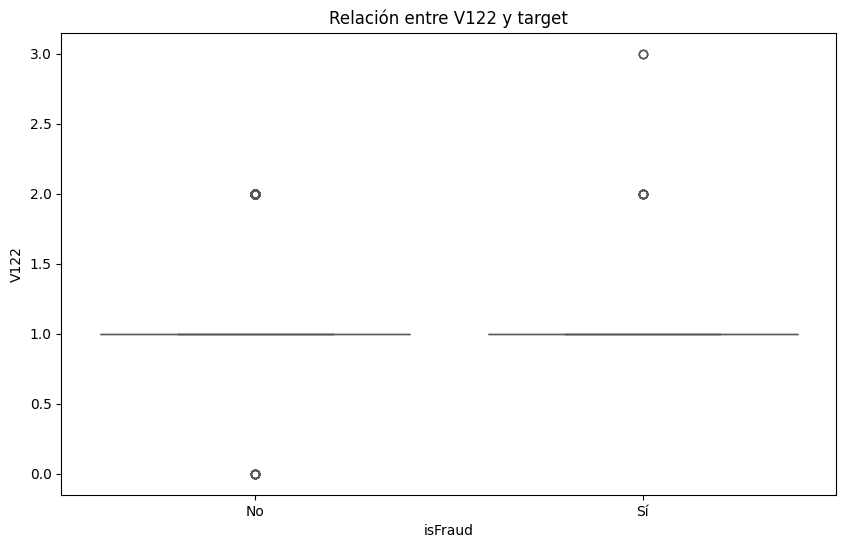

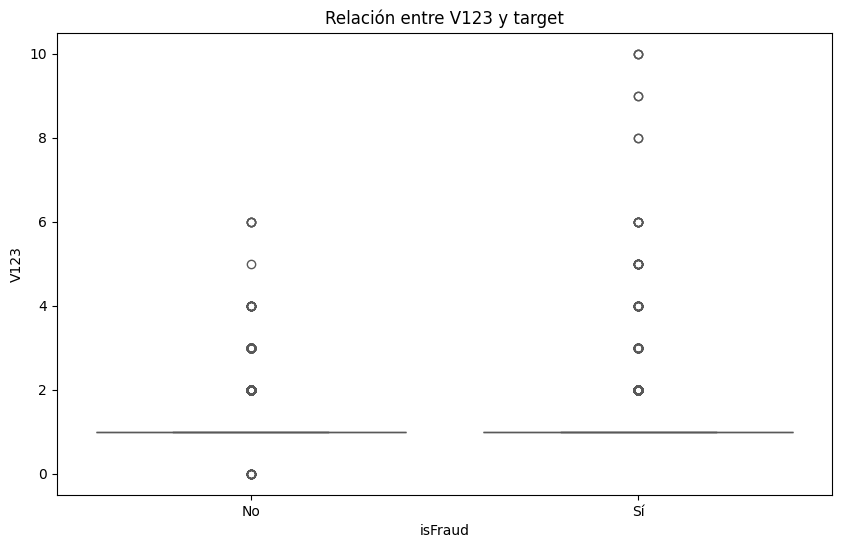

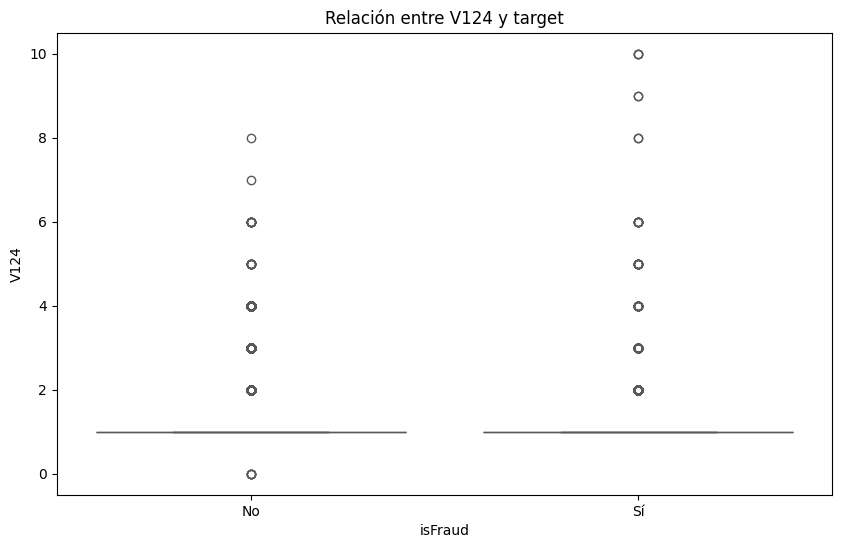

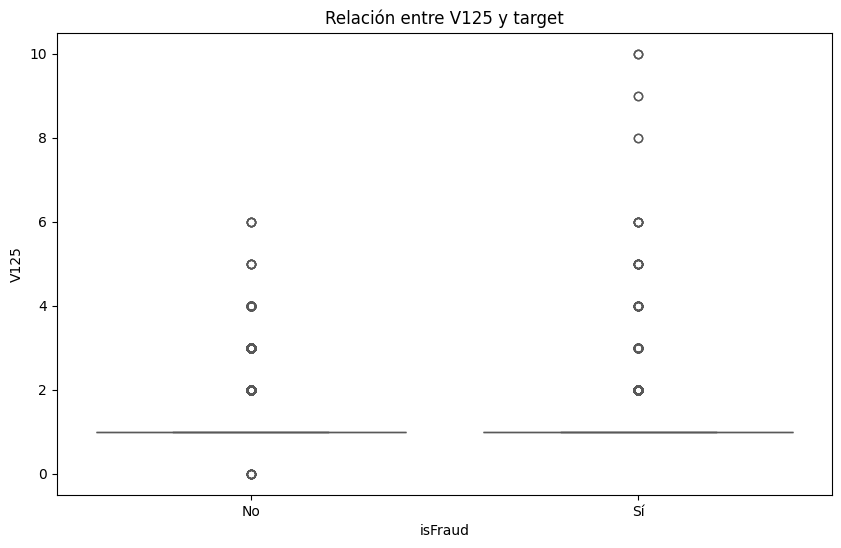

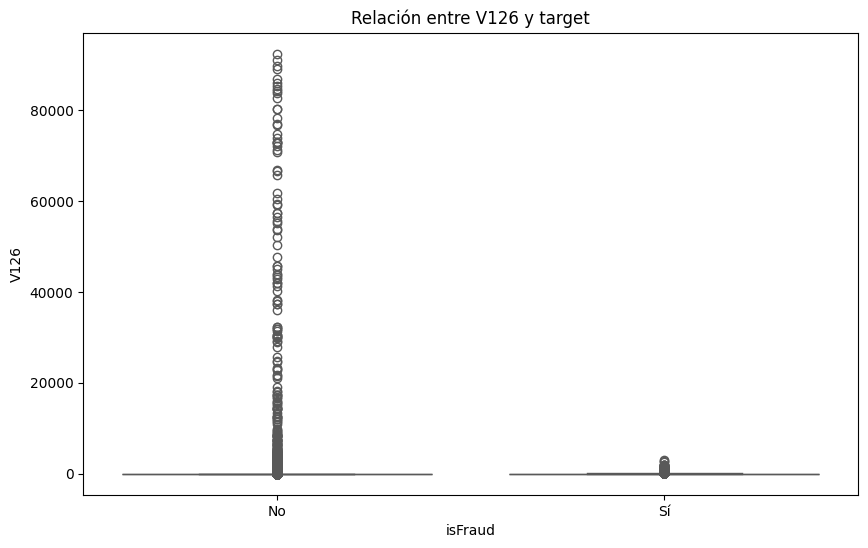

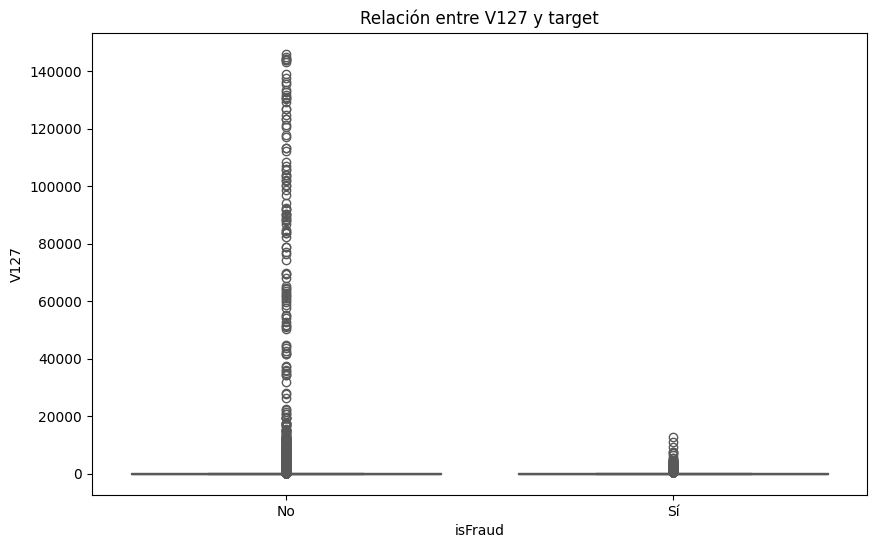

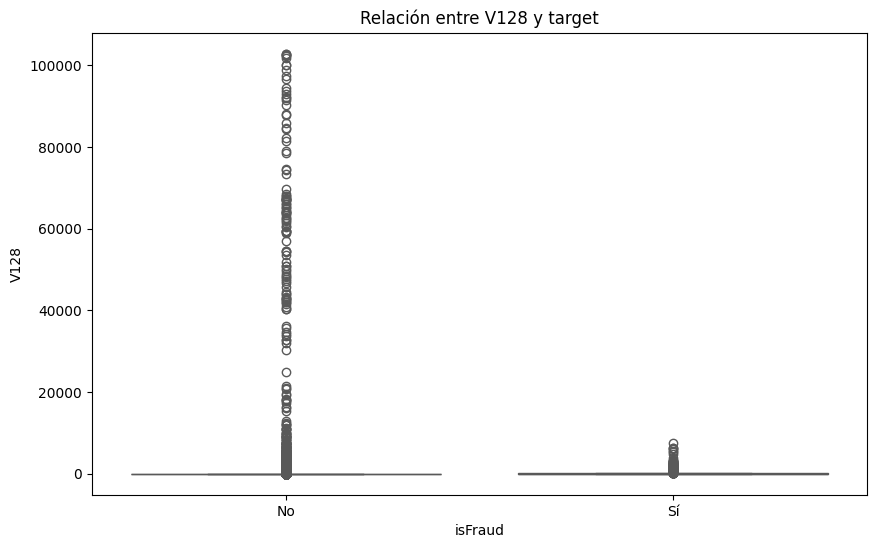

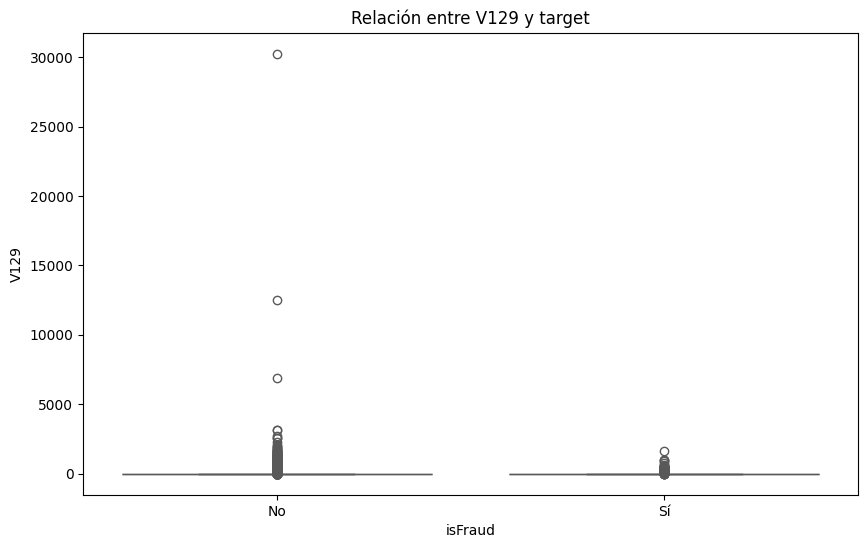

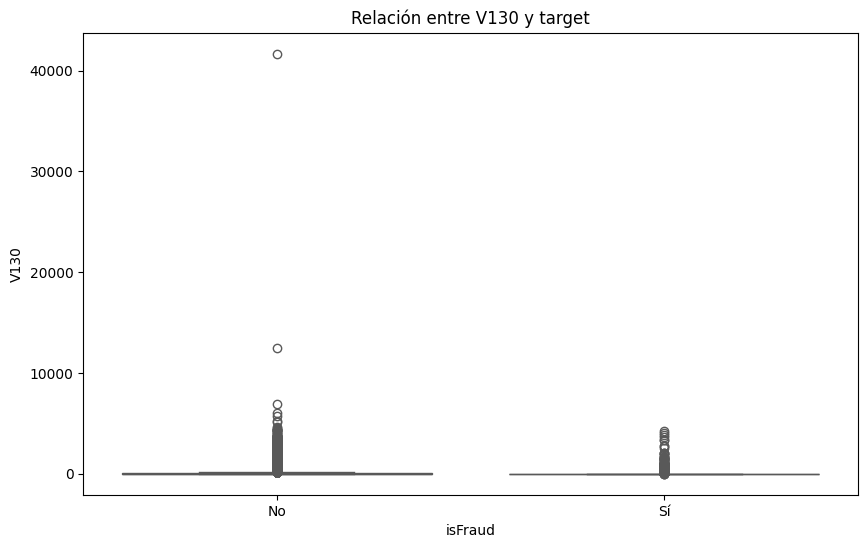

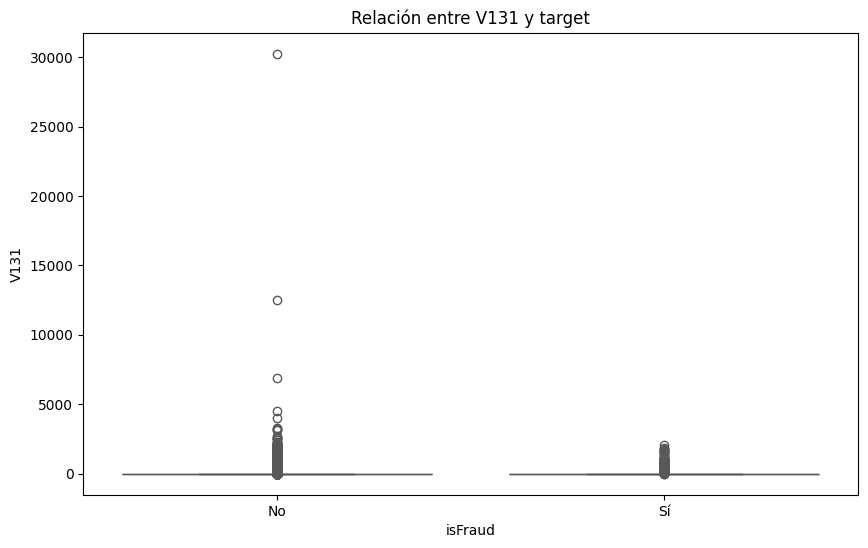

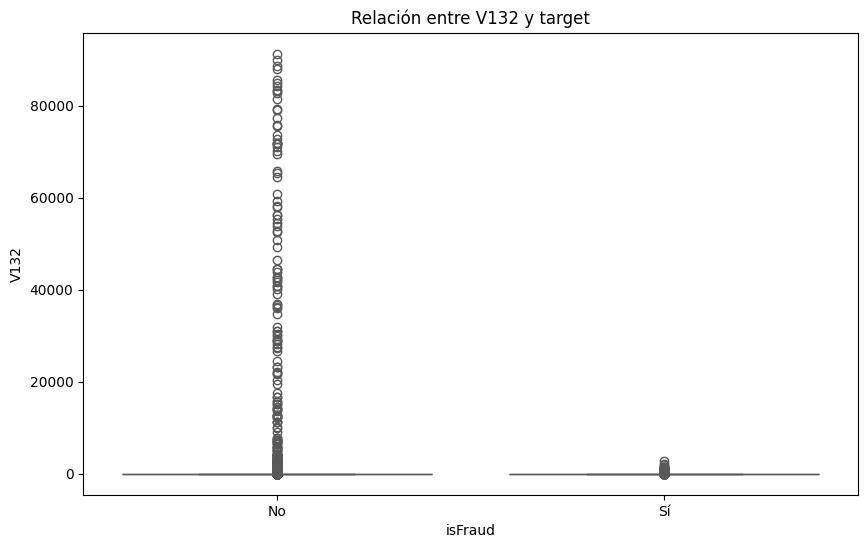

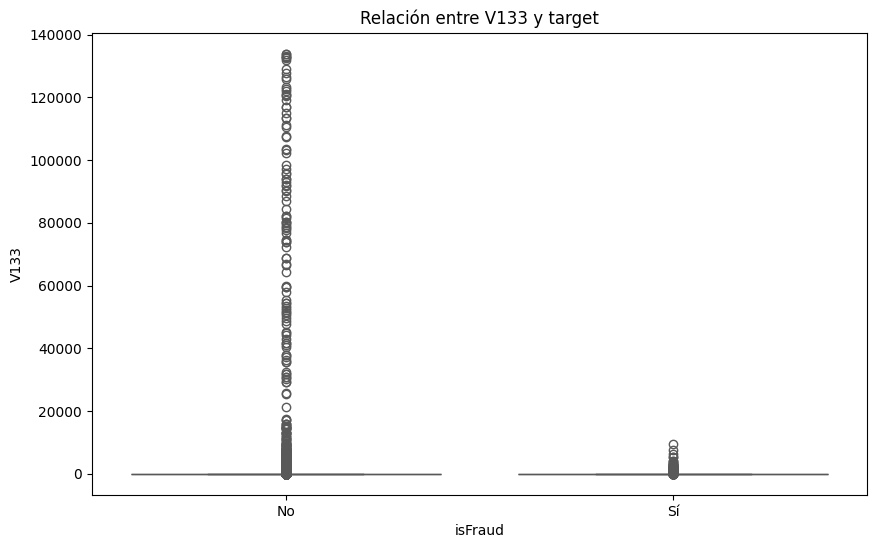

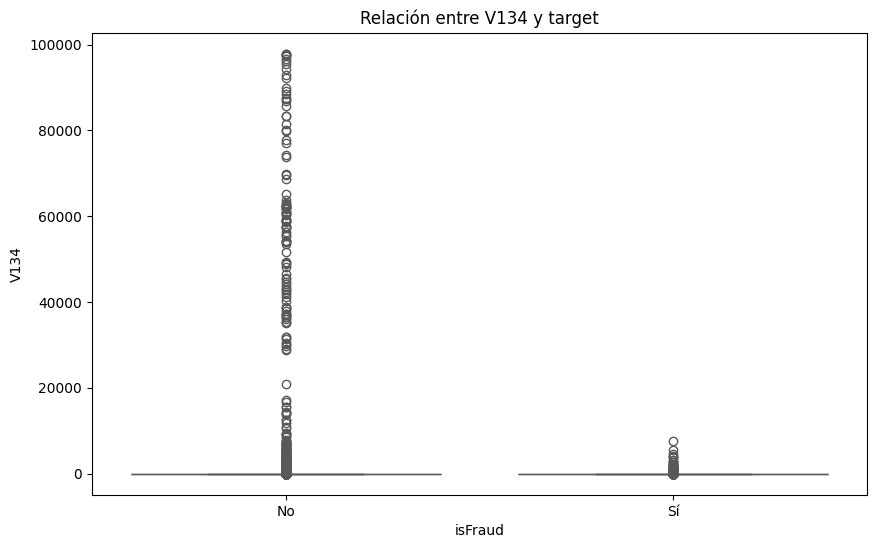

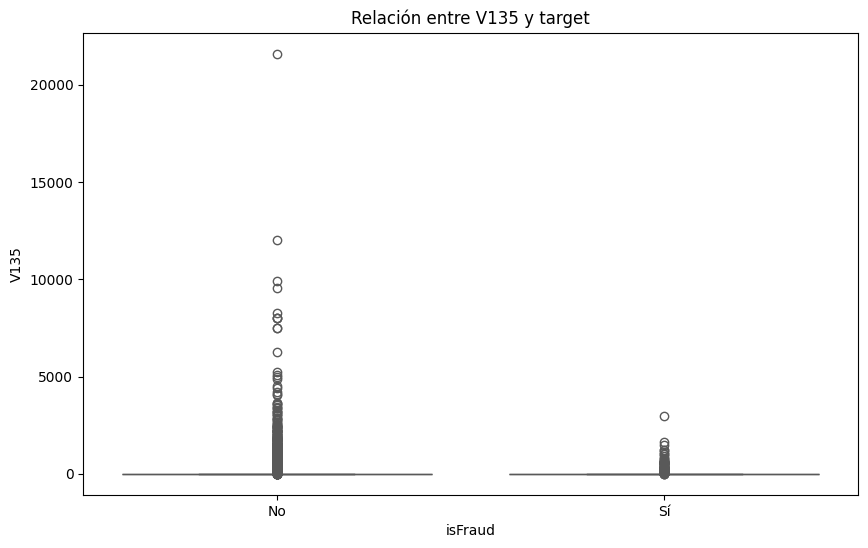

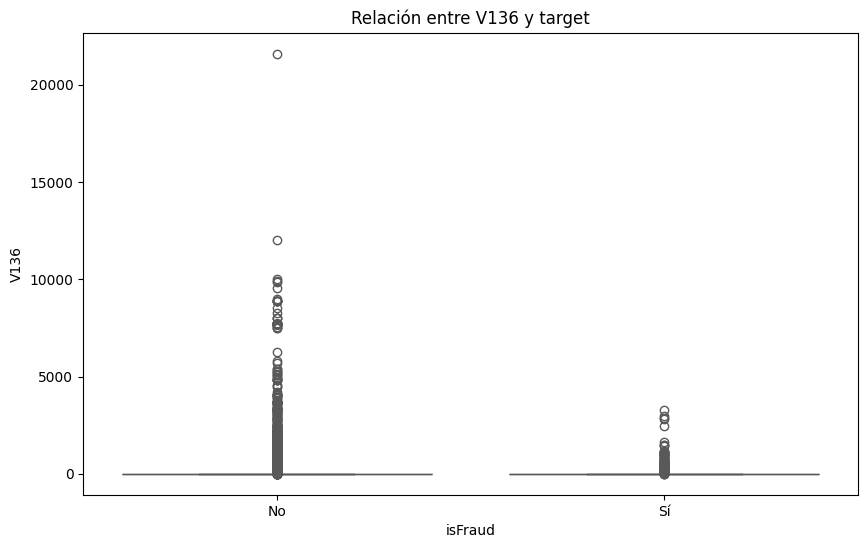

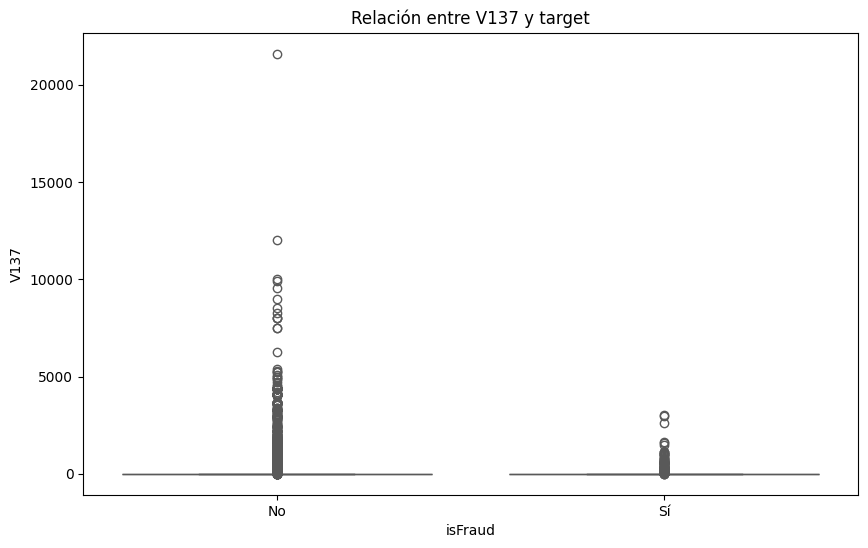

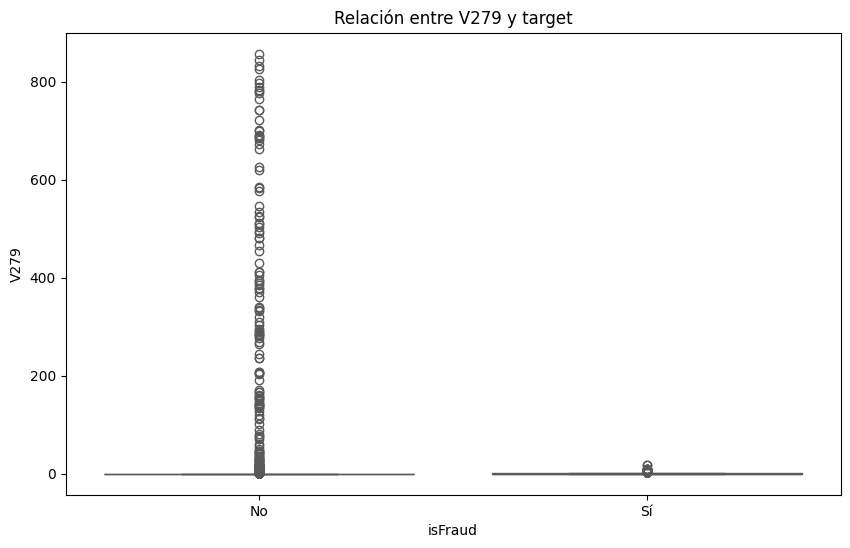

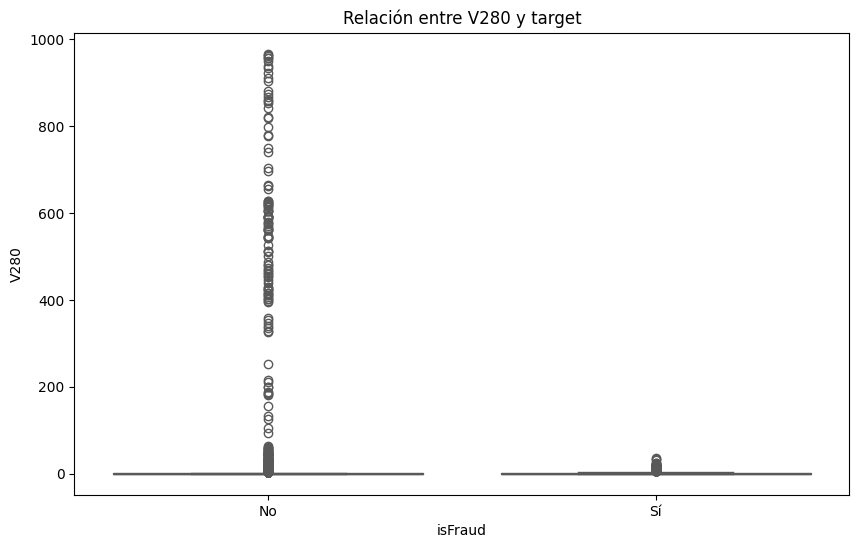

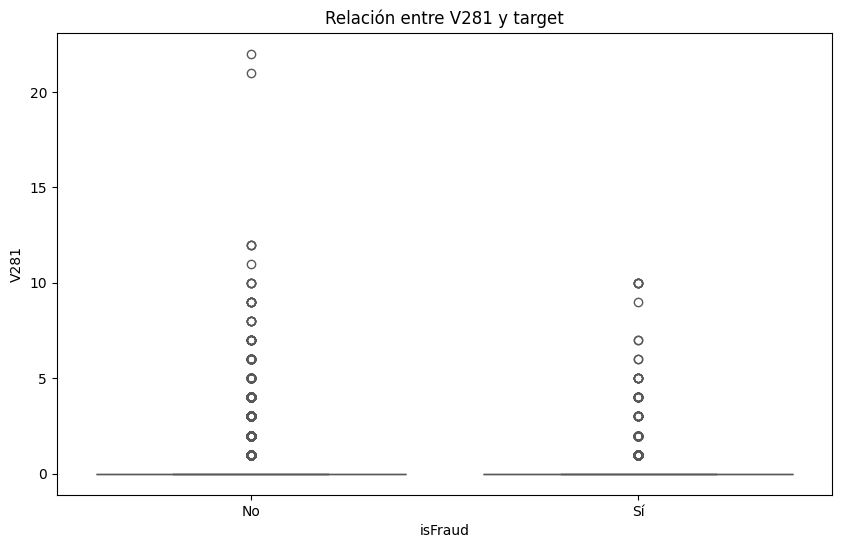

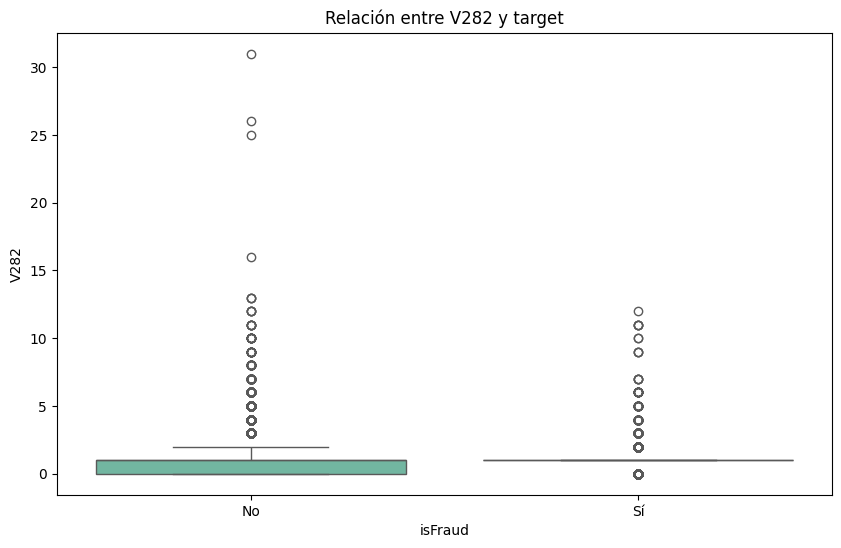

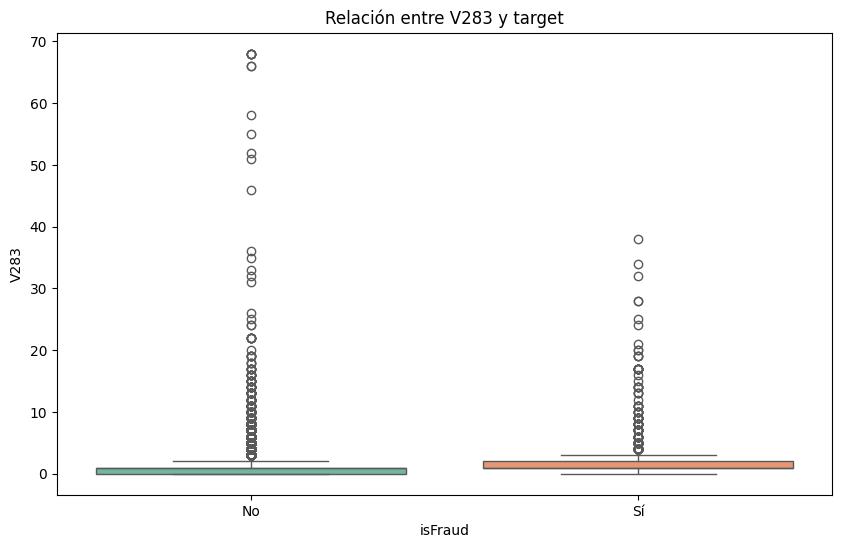

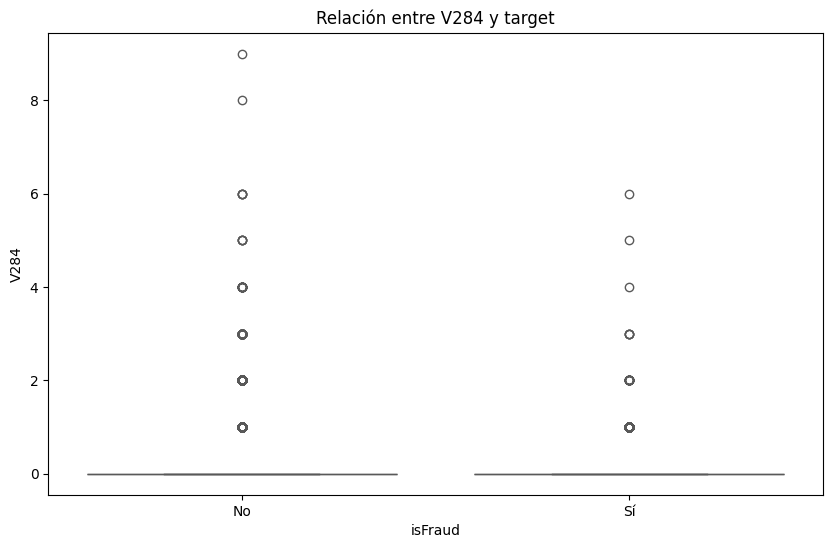

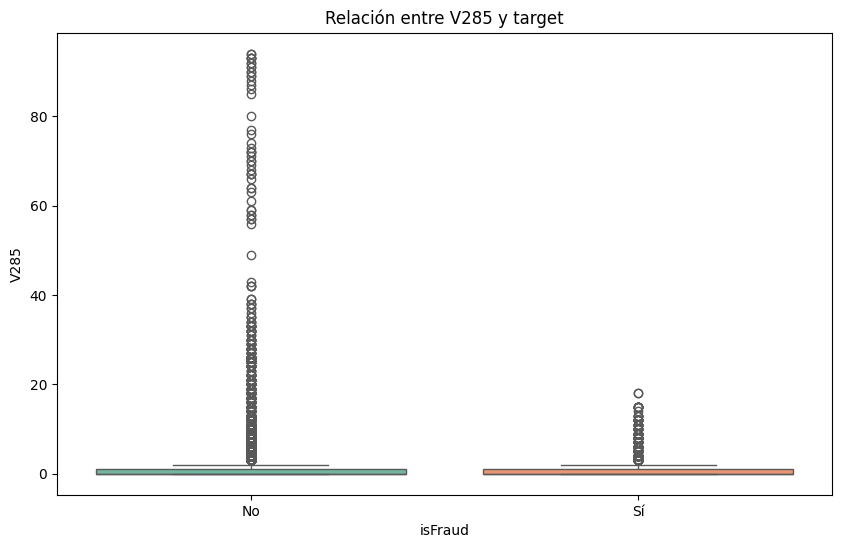

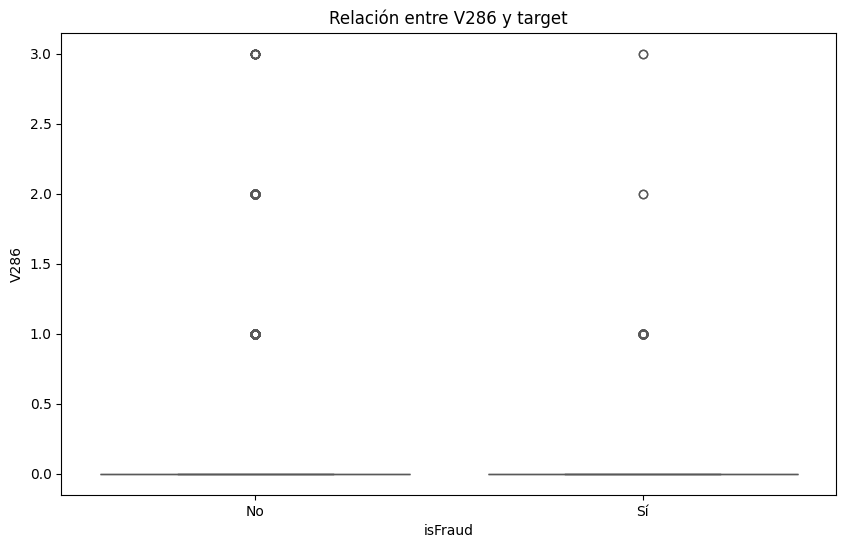

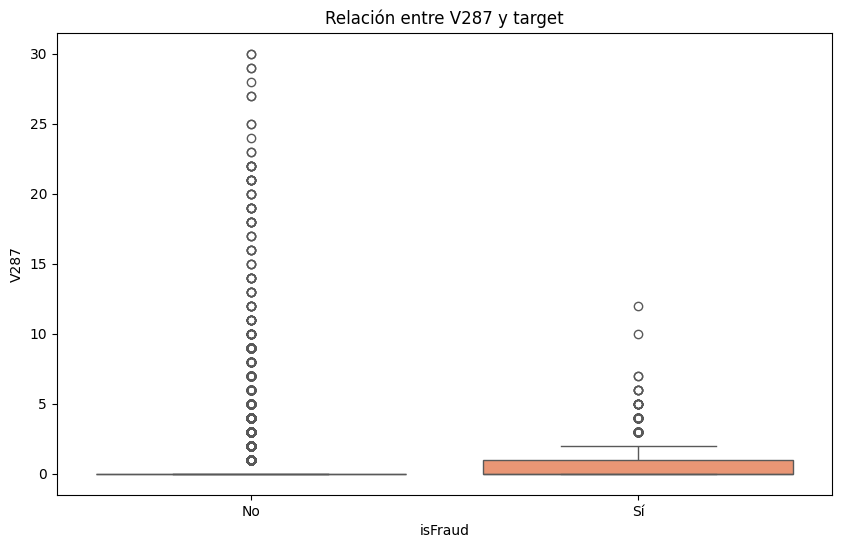

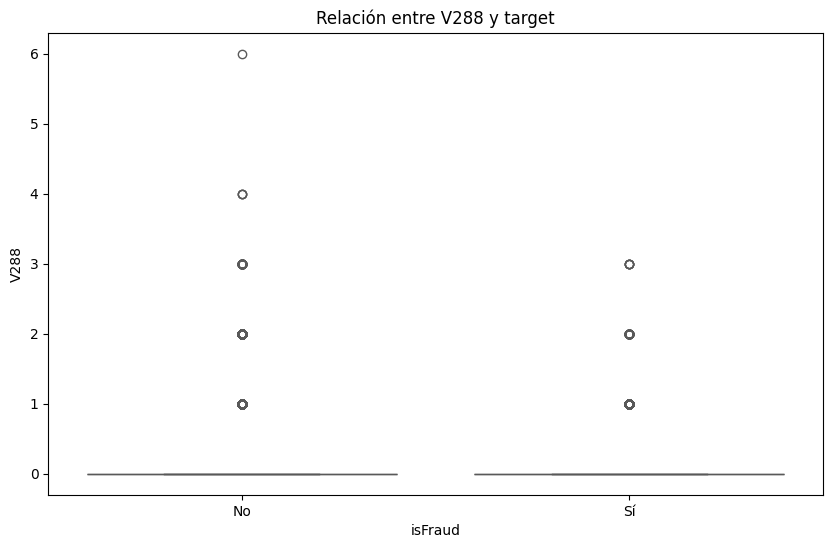

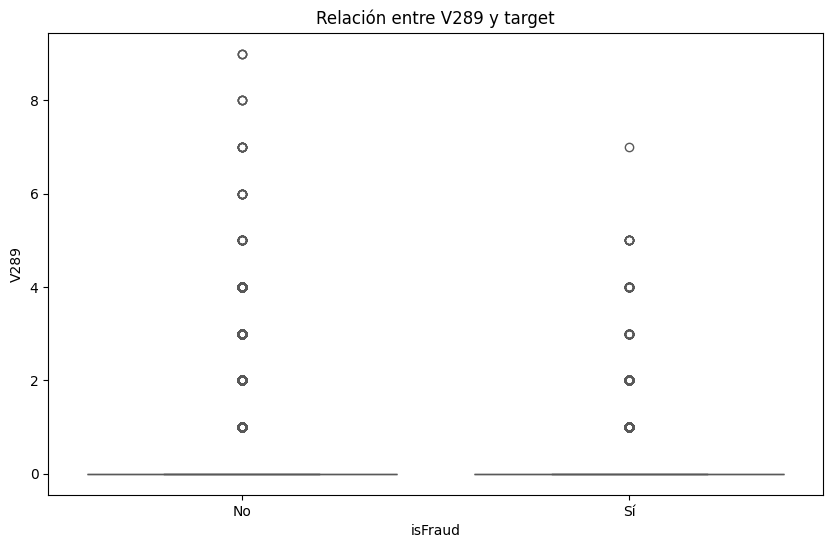

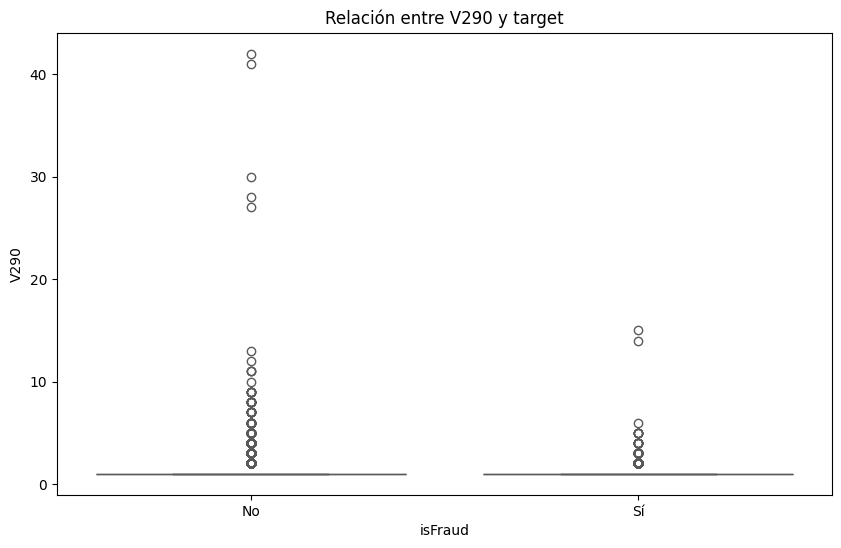

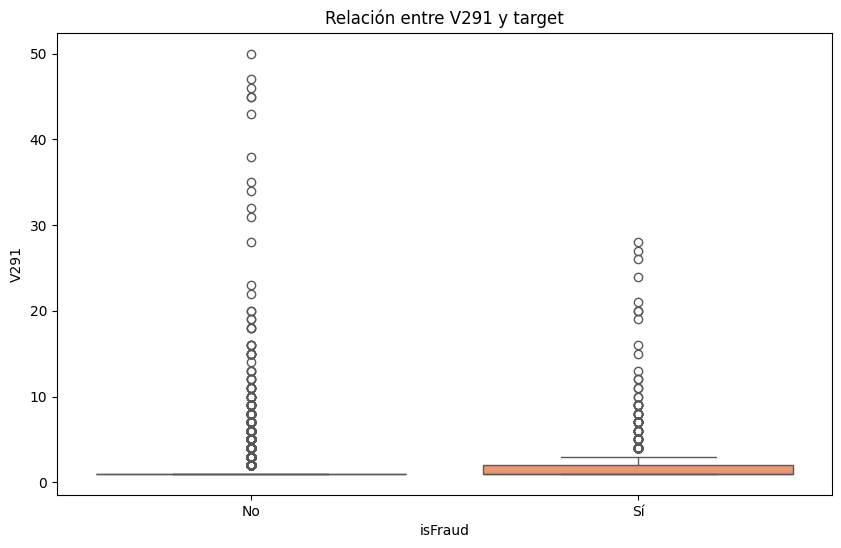

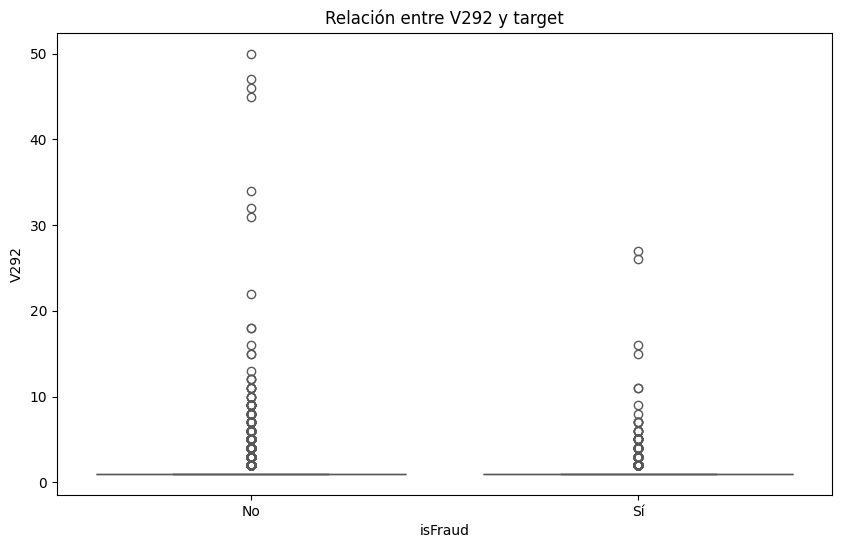

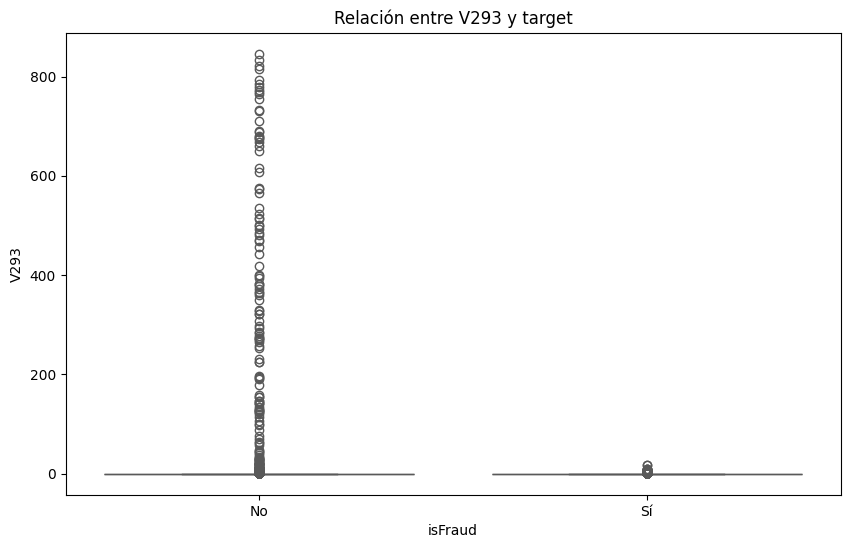

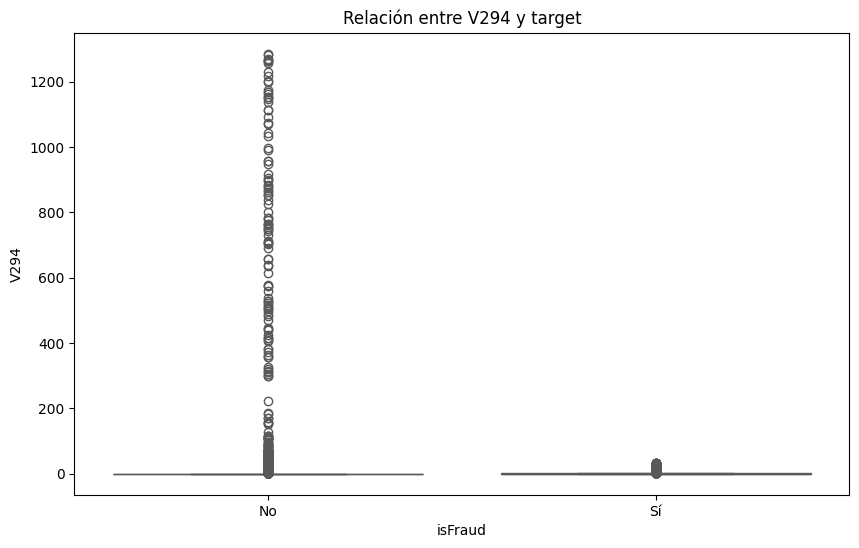

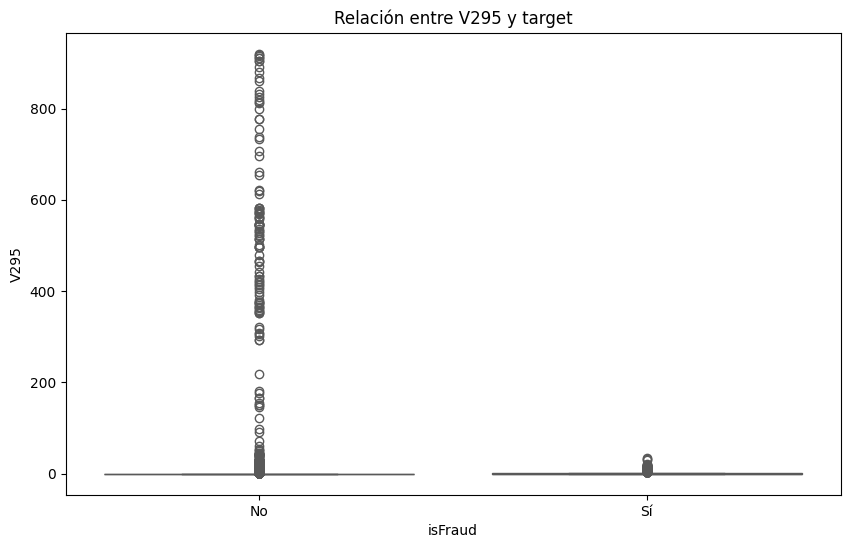

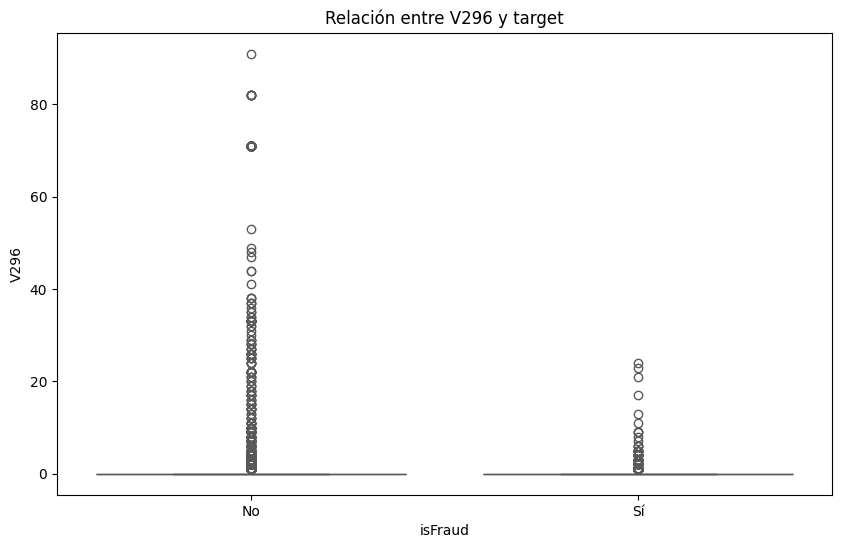

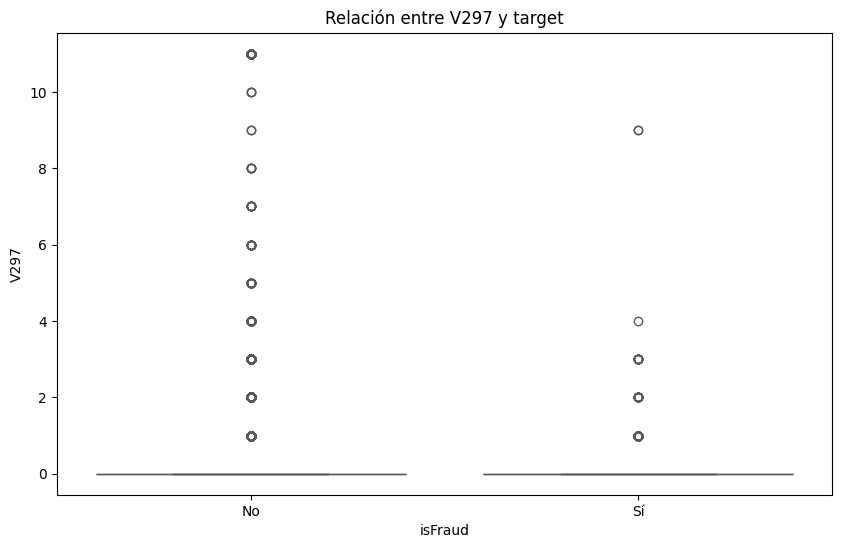

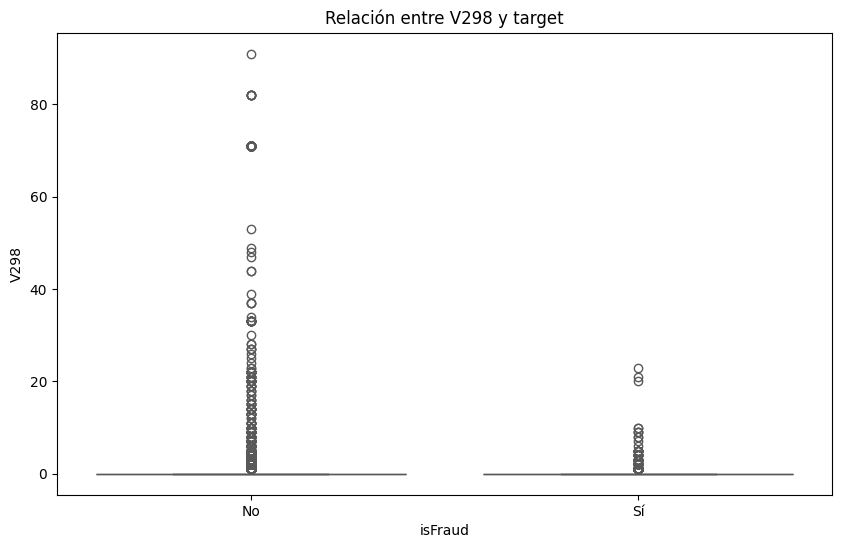

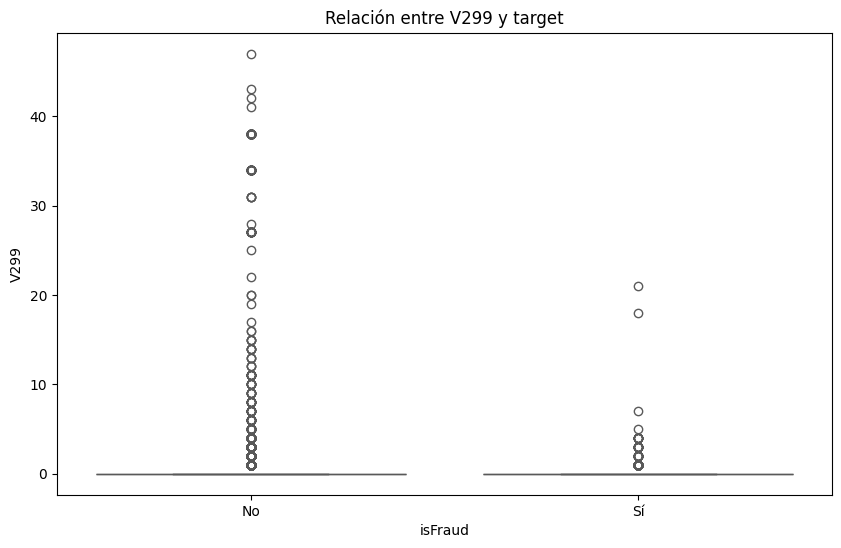

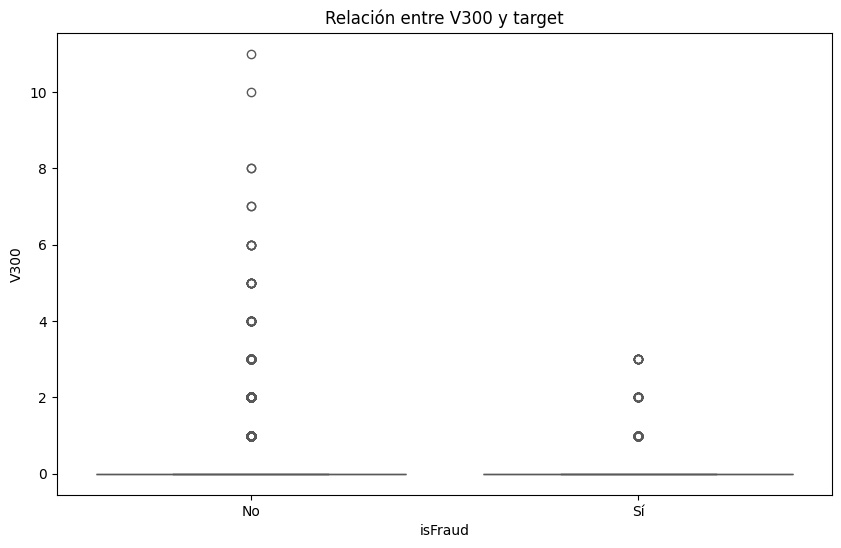

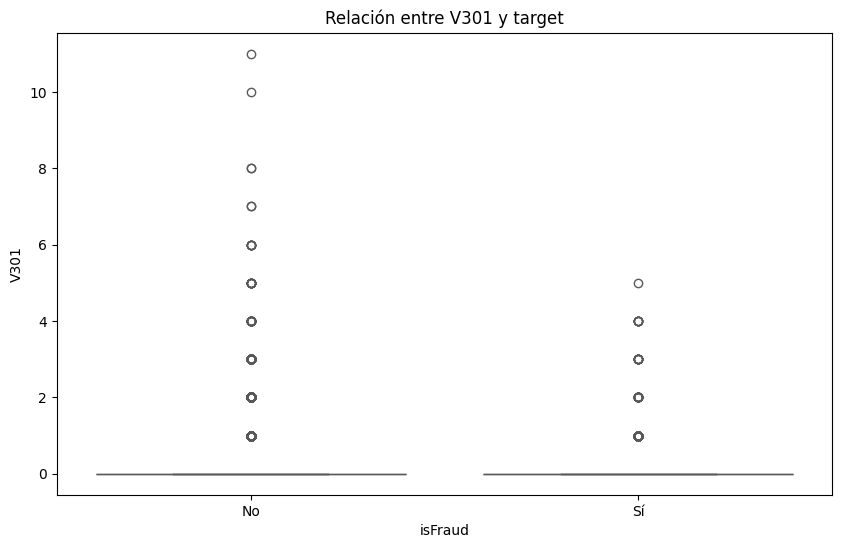

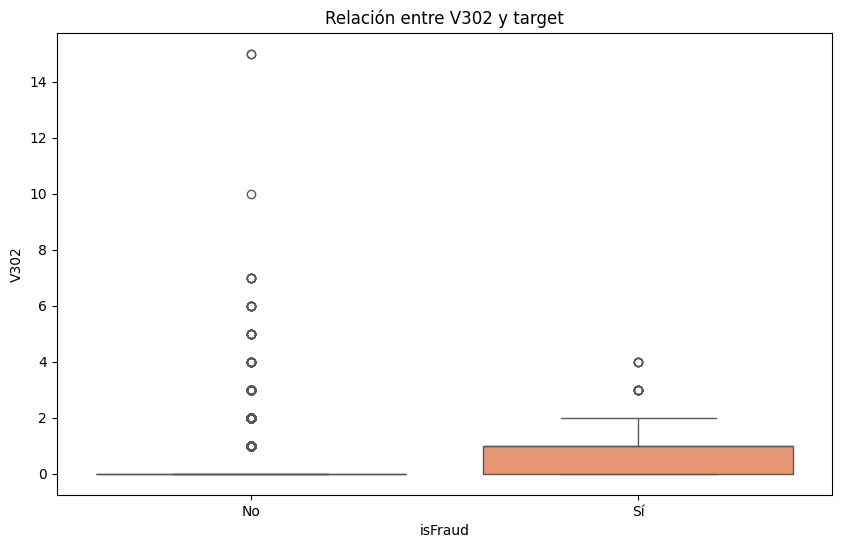

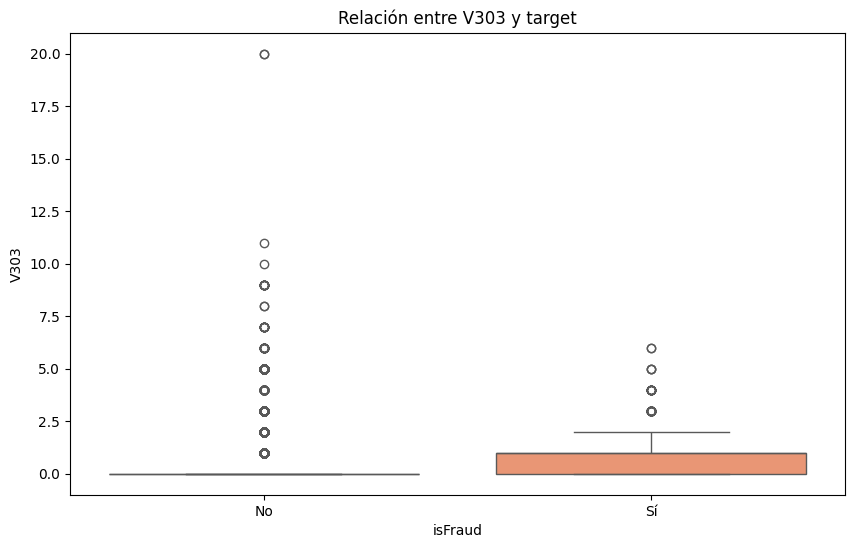

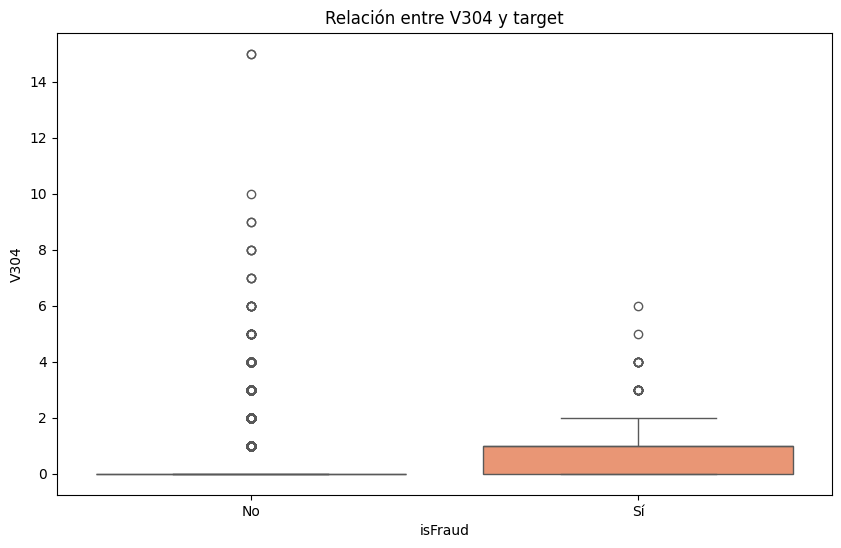

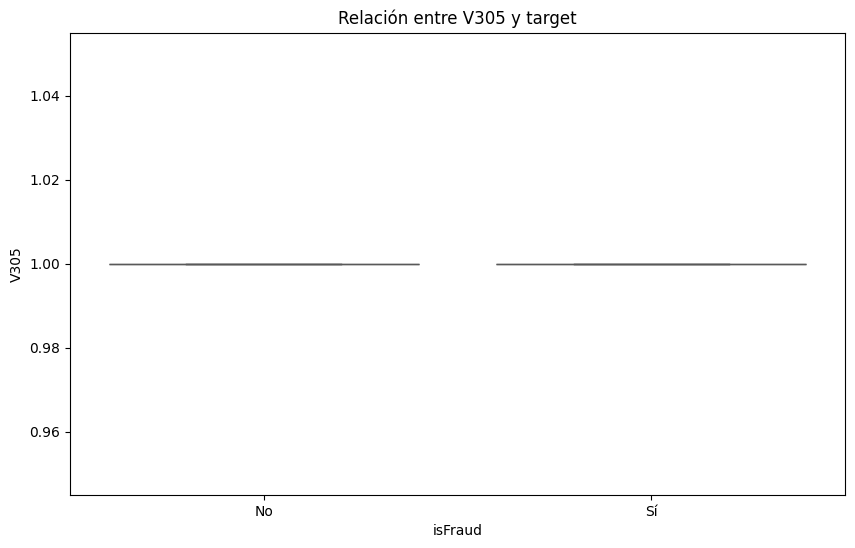

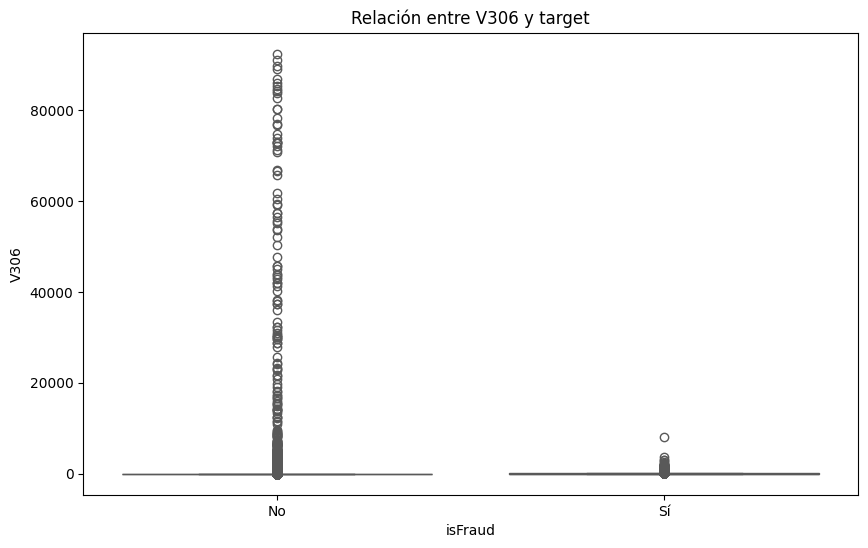

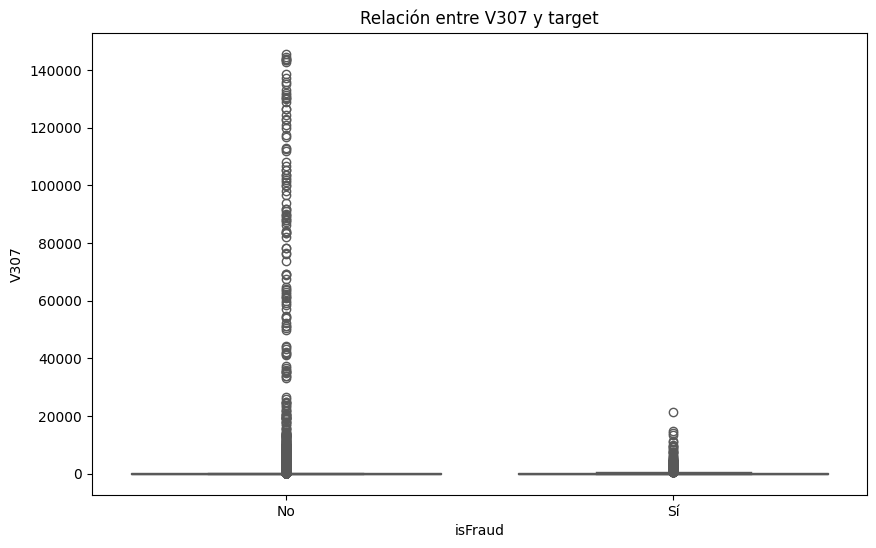

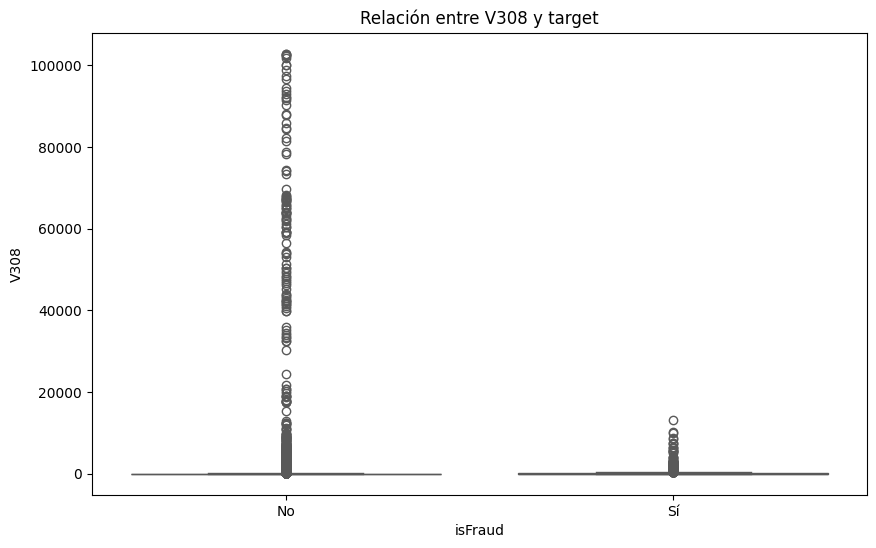

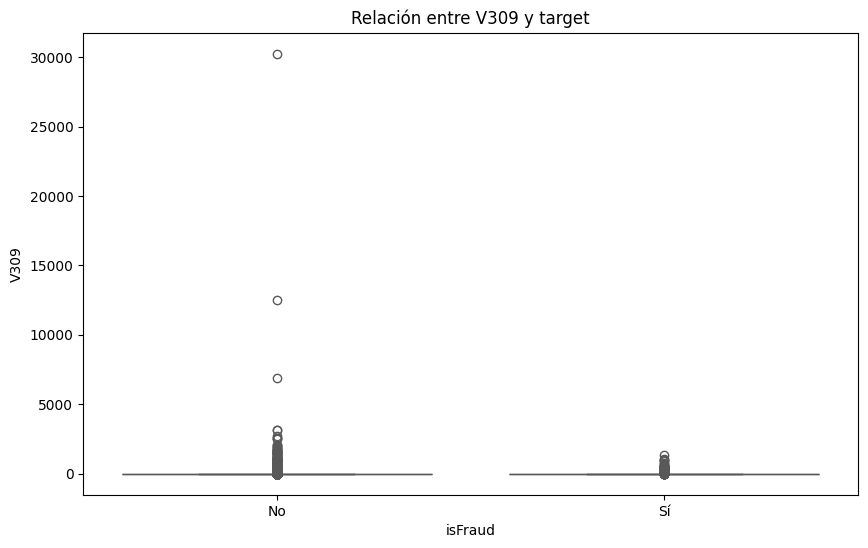

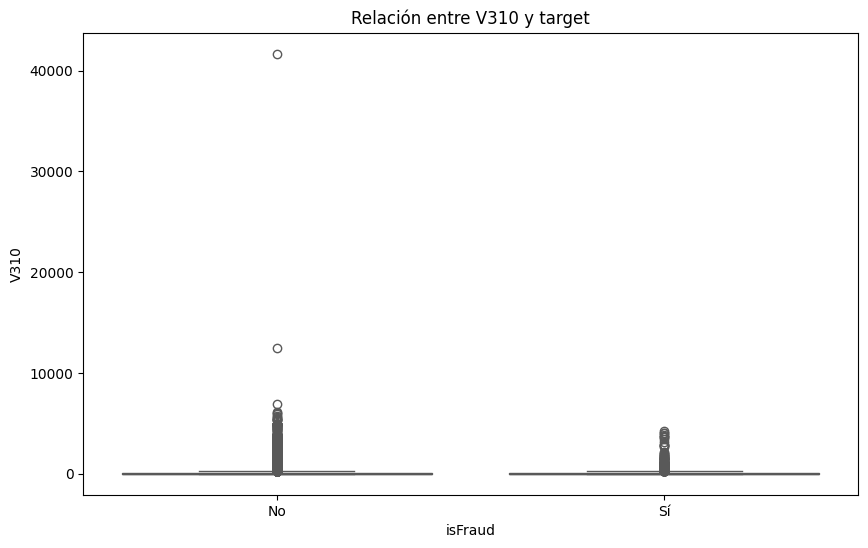

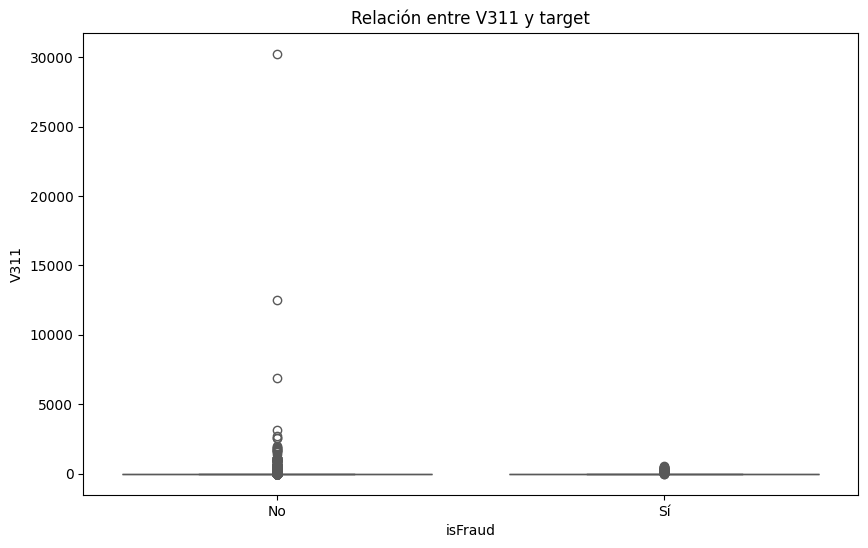

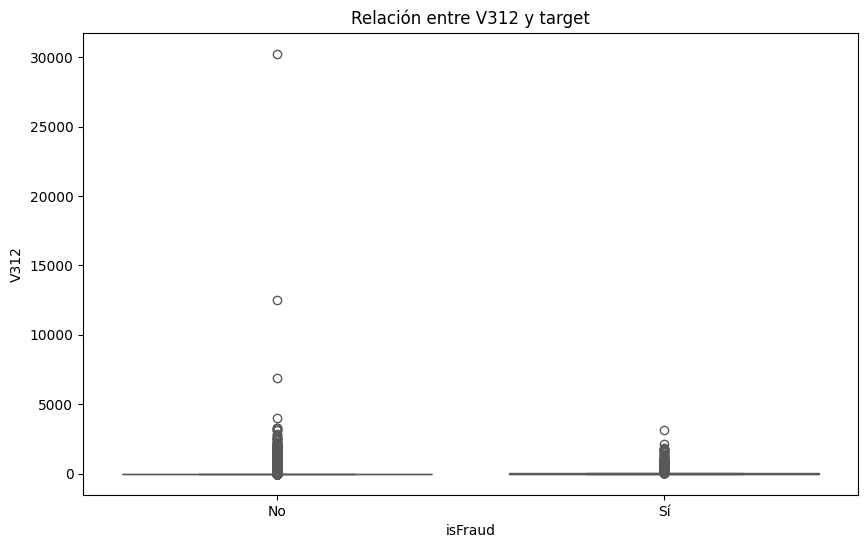

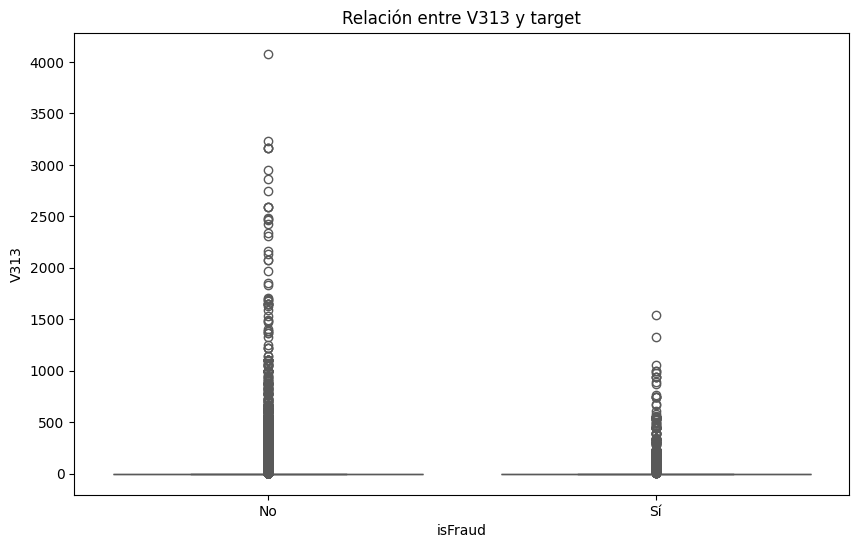

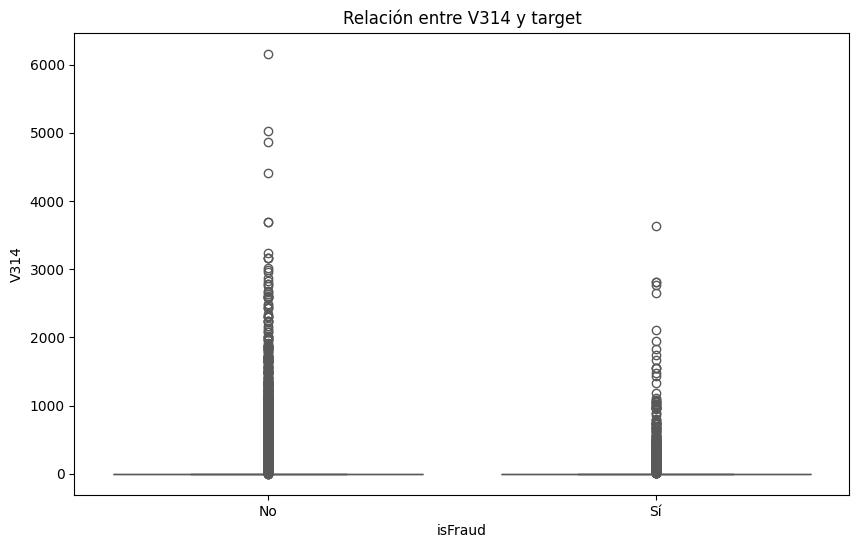

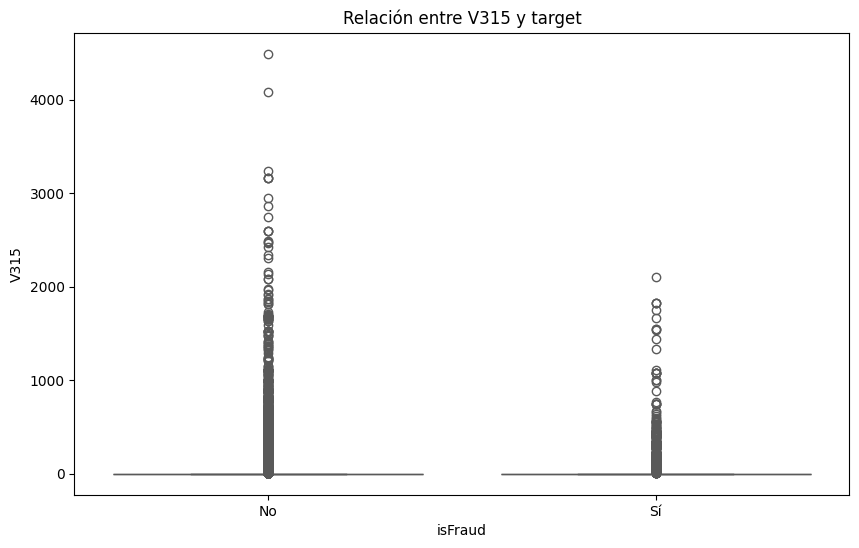

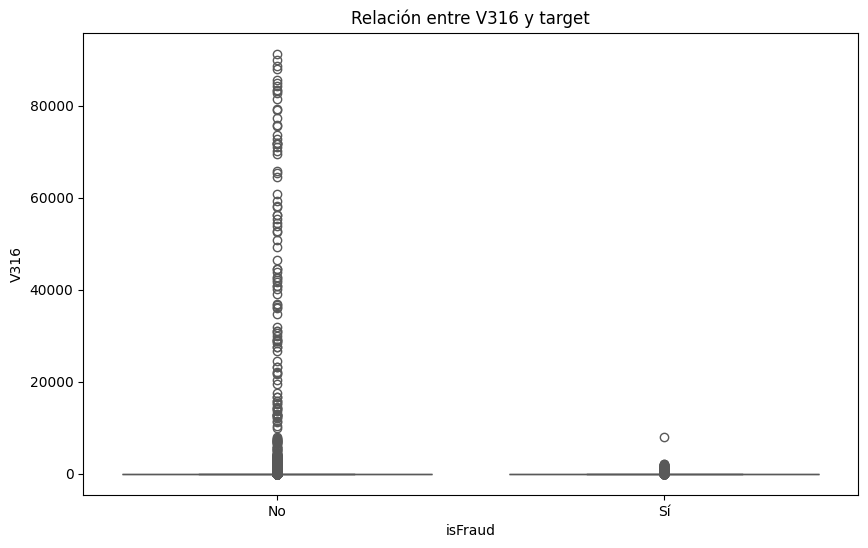

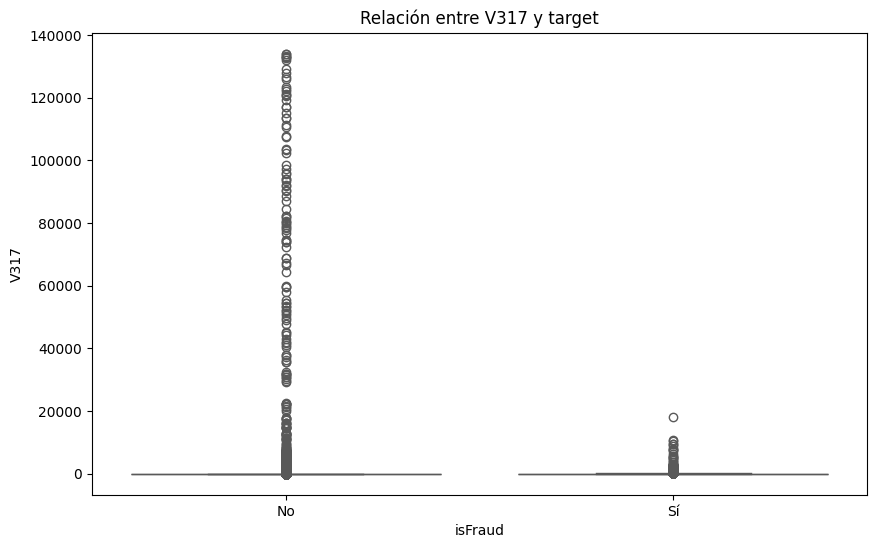

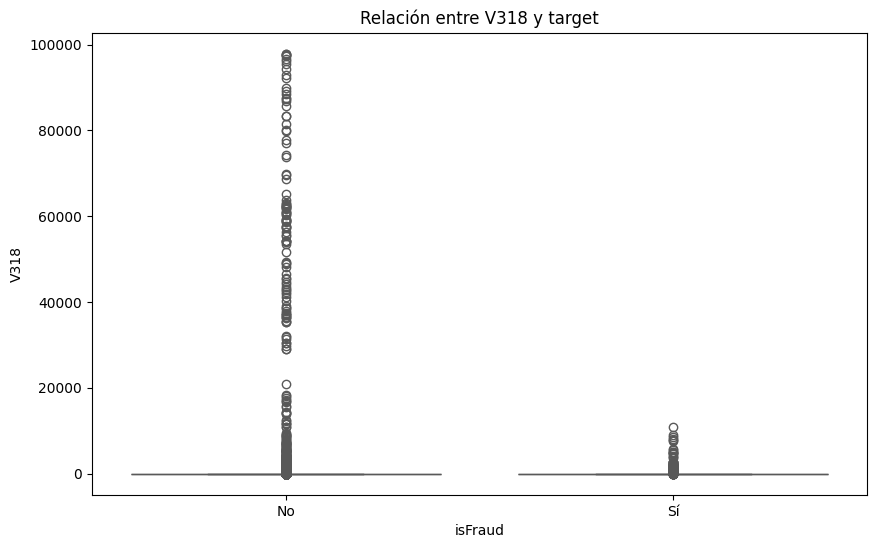

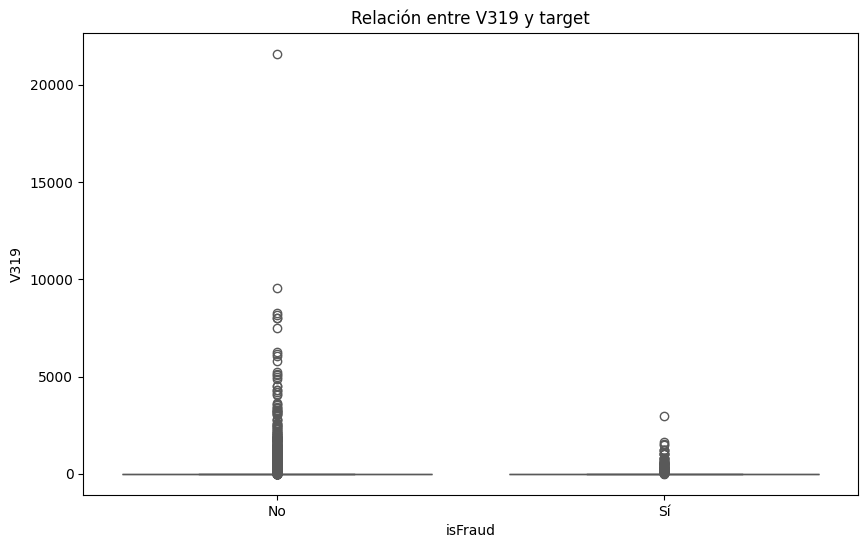

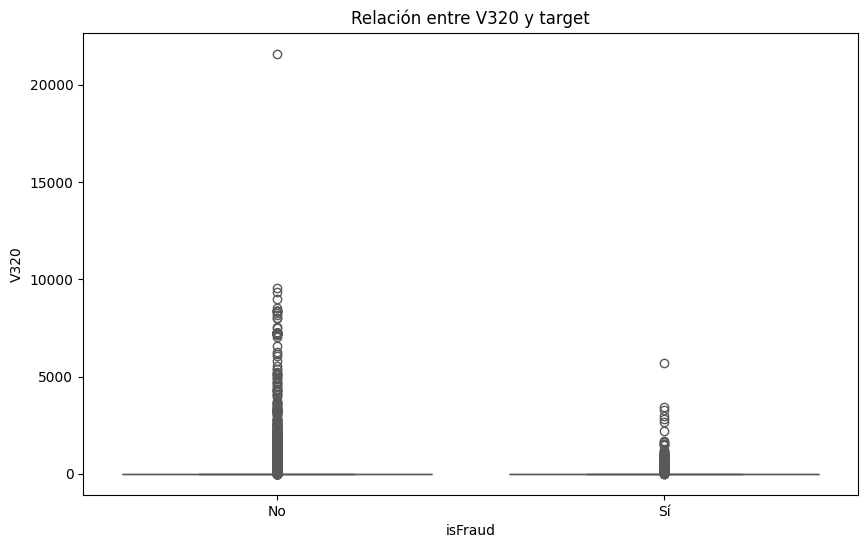

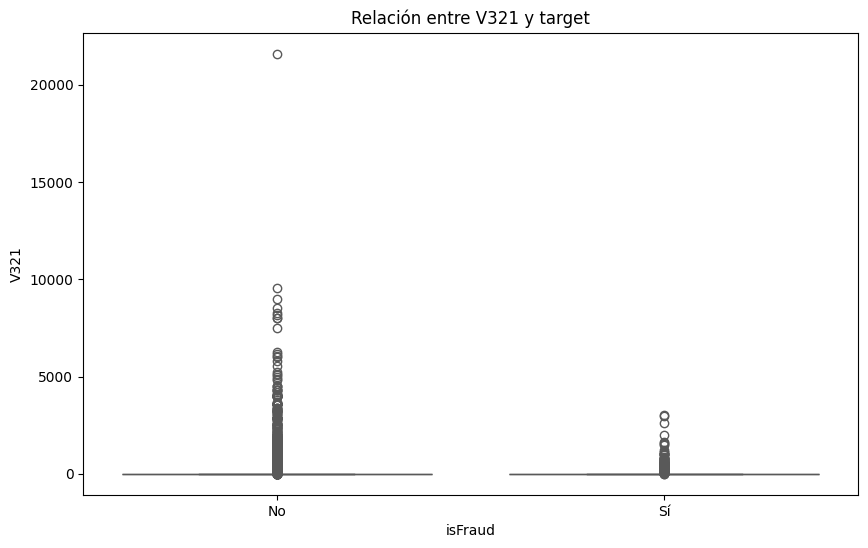

In [104]:
palette = 'Set2'  # Puedes cambiar 'Set2' por otras paletas como 'Set1', 'Set3', 'Dark2', etc.

# Generar los boxplots con la paleta de colores genérica
for column in df_train.select_dtypes(include=['number']).columns:
    if column != 'isFraud':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='isFraud', y=column, data=df_train, hue='isFraud', palette=palette, legend=False)
        plt.title(f'Relación entre {column} y target')
        plt.show()


**Observaciones:**
Las características numéricas se analizaron en relación con la variable objetivo "isFraud". Se observó lo siguiente:

- TransactionDT: Tanto las transacciones fraudulentas como las no fraudulentas presentan distribuciones similares.
- TransactionAmt: Se observa una mayor diferencia debido a la presencia de valores atípicos y diferentes distribuciones entre los casos con fraude y sin fraude.
- Addr1:Las direcciones por región son similares tanto para los casos con fraude como para los casos sin fraude.
- Add2: Las direcciones por país son similares tanto para los casos con fraude como para los casos sin fraude.
- Card1: Las distribución con fraude y no fraude son similares
- Card2 y Card5: Hay diferencia entre ellas significativas

In [105]:
df_stat = df_train.groupby('isFraud').describe(include='number').T.round(2)
df_stat['diferencia_absoluta'] = df_stat['No'] - df_stat['Sí']
df_stat['diferencia_relativa %'] = round(abs((df_stat['diferencia_absoluta'] / df_stat.sum(axis=1)) * 100),2)

df_stat.sort_values(by='diferencia_relativa %',ascending=False)

isFraud    No     Sí  diferencia_absoluta  diferencia_relativa %
V282 25%  0.0   1.00                -1.00                    inf
V307 50%  0.0  15.59               -15.59                    inf
V126 75%  0.0  39.50               -39.50                    inf
V125 min  0.0   1.00                -1.00                    inf
V109 min  0.0   1.00                -1.00                    inf
...       ...    ...                  ...                    ...
V320 75%  0.0   0.00                 0.00                    NaN
V321 min  0.0   0.00                 0.00                    NaN
     25%  0.0   0.00                 0.00                    NaN
     50%  0.0   0.00                 0.00                    NaN
     75%  0.0   0.00                 0.00                    NaN

[864 rows x 4 columns]

In [106]:
df_stat.loc[df_stat.index.get_level_values(1) == 'mean'].sort_values(by='diferencia_relativa %',ascending=False)

isFraud                     No          Sí  diferencia_absoluta  \
C12           mean        3.52       12.33                -8.81   
C8            mean        4.56       14.48                -9.92   
V281          mean        0.08        0.25                -0.17   
C7            mean        2.50        7.52                -5.02   
C4            mean        3.72       10.82                -7.10   
...                        ...         ...                  ...   
V122          mean        1.00        1.01                -0.01   
TransactionID mean  3280953.92  3299582.56            -18628.64   
V107          mean        1.00        1.00                 0.00   
V305          mean        1.00        1.00                 0.00   
V297          mean        0.09        0.09                 0.00   

isFraud             diferencia_relativa %  
C12           mean                 125.14  
C8            mean                 108.77  
V281          mean                 106.25  
C7            mean                 100.40  
C4            mean                  95.43  
...                                   ...  
V122          mean                   0.50  
TransactionID mean                   0.28  
V107          mean                   0.00  
V305          mean                   0.00  
V297          mean                   0.00  

[108 rows x 4 columns]

** Observación**
- Se observa que las diferencias relativas en los valores medios de las características numéricas son menores al 1%, excepto en "TransactionAmt" que es el del 21.69%, lo cual podría deberse a la presencia de valores atípicos y card2 que es del 2.88%,
Esto podŕia indicar una dificultad en el entrenamiento con las características numéricas, ya que sus distribuciones no son muy difrentes


### Características Categóricas

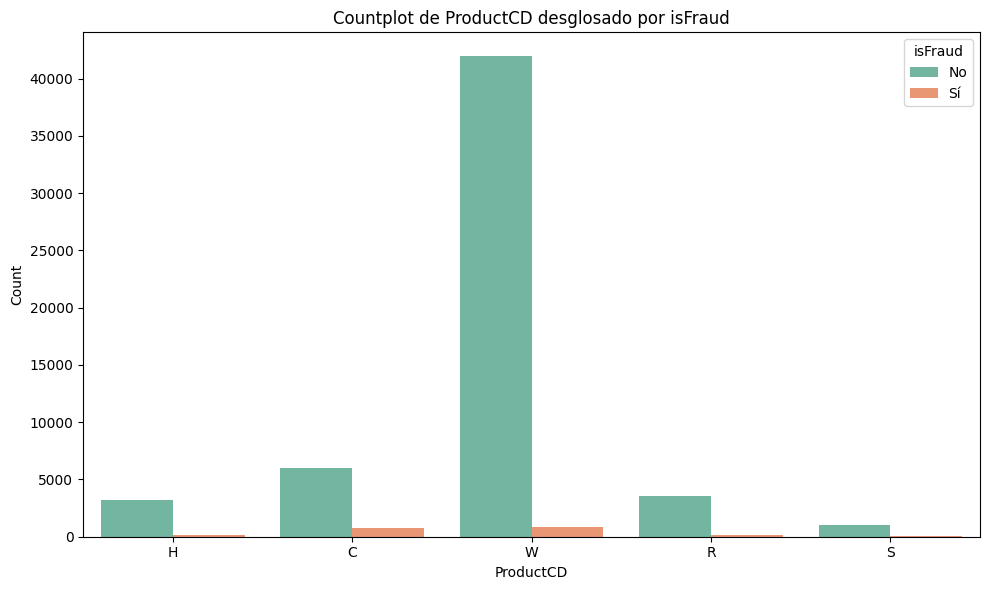

isFraud       No   Sí
ProductCD            
W          41940  868
C           6012  761
H           3188  155
R           3584  151
S           1062   80


In [107]:
count_table = pd.crosstab(index=df_train['ProductCD'], columns=df_train['isFraud'])
count_table = count_table.sort_values(by='Sí',ascending=False)
# Configurar el estilo y tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el countplot utilizando seaborn
sns.countplot(data=df_train, x='ProductCD', hue='isFraud', palette='Set2')

# Ajustar el formato de las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Añadir título y etiquetas de los ejes
plt.title('Countplot de ProductCD desglosado por isFraud')
plt.xlabel('ProductCD')
plt.ylabel('Count')

# Mostrar el gráfico con leyenda
plt.legend(title='isFraud')
plt.tight_layout()
plt.show()

# Mostrar la tabla de conteo desglosada por ProductCD y isFraud
print(count_table)

In [108]:

# Crear tabla de contingencia (crosstab) desglosando por ProductCD y isFraud
count_table = pd.crosstab(index=df_train['ProductCD'], columns=df_train['isFraud'])

# Ordenar la tabla por la cantidad de fraudes (isFraud == 1)
count_table = count_table.sort_values(by='Sí', ascending=False)

# Calcular el porcentaje en función del total de cada columna
count_table_percentage = count_table.apply(lambda x: x / x.sum() * 100, axis=0).round(2)

# Mostrar la tabla de contingencia y su porcentaje
print("Tabla de Contingencia :")
print(count_table)
print("\nPorcentaje en función del total de cada columna:")
print(count_table_percentage)

Tabla de Contingencia :
isFraud       No   Sí
ProductCD            
W          41940  868
C           6012  761
H           3188  155
R           3584  151
S           1062   80

Porcentaje en función del total de cada columna:
isFraud       No     Sí
ProductCD              
W          75.18  43.08
C          10.78  37.77
H           5.71   7.69
R           6.42   7.49
S           1.90   3.97


### Cards Categóricas

In [109]:
df_train[cards].select_dtypes('object')

card4   card6
294161        visa  credit
467048        visa   debit
34825   mastercard  credit
374859        visa   debit
545712        visa   debit
...            ...     ...
460423        visa   debit
364785  mastercard   debit
157056        visa   debit
523532        visa   debit
404259        visa  credit

[57801 rows x 2 columns]

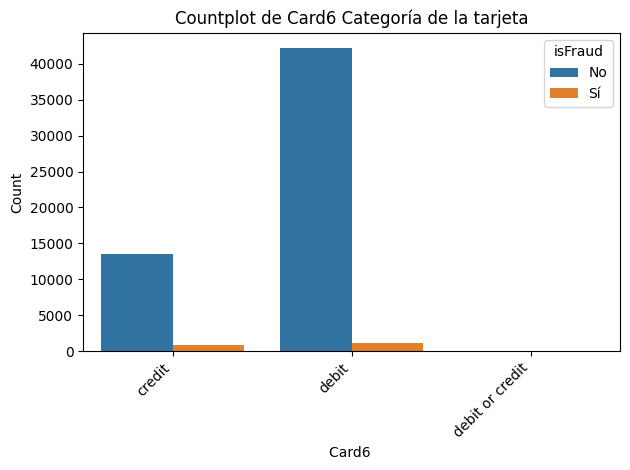

In [110]:

sns.countplot(data=df_train, x='card6', hue='isFraud')
plt.xticks(rotation=45, ha='right')
plt.title('Countplot de Card6 Categoría de la tarjeta' )
plt.xlabel('Card6 ')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.tight_layout()
plt.show()


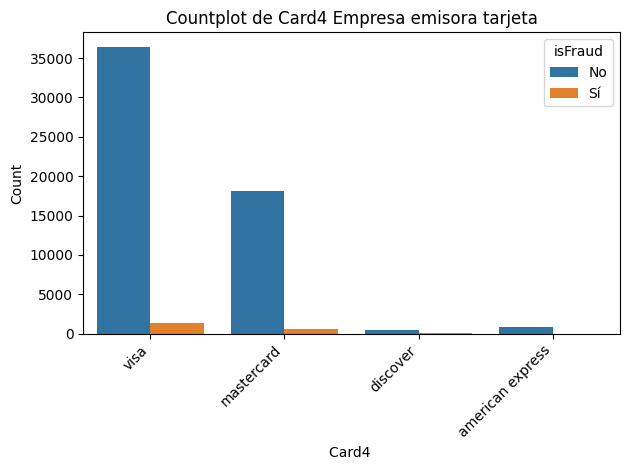

In [111]:


sns.countplot(data=df_train, x='card4', hue='isFraud')
plt.xticks(rotation=45, ha='right')
plt.title('Countplot de Card4 Empresa emisora tarjeta' )
plt.xlabel('Card4 ')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.tight_layout()
plt.show()


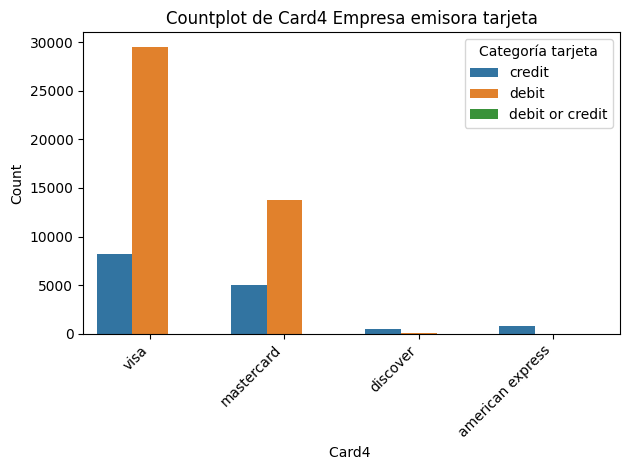

In [112]:


sns.countplot(data=df_train, x='card4', hue='card6')
plt.xticks(rotation=45, ha='right')
plt.title('Countplot de Card4 Empresa emisora tarjeta' )
plt.xlabel('Card4 ')
plt.ylabel('Count')
plt.legend(title='Categoría tarjeta')
plt.tight_layout()
plt.show()


In [113]:

# Crear tabla de contingencia (crosstab) desglosando por ProductCD y isFraud
count_table = pd.crosstab(index=df_train['card4'], columns=df_train['isFraud'])

# Ordenar la tabla por la cantidad de fraudes (isFraud == 1)
count_table = count_table.sort_values(by='Sí', ascending=False)

# Calcular el porcentaje en función del total de cada columna
count_table_percentage = count_table.apply(lambda x: x / x.sum() * 100, axis=0).round(2)

# Mostrar la tabla de contingencia y su porcentaje
print("Tabla de Contingencia :")
print(count_table)
print("\nPorcentaje en función del total de cada columna:")
print(count_table_percentage)

Tabla de Contingencia :
isFraud              No    Sí
card4                        
visa              36452  1316
mastercard        18128   641
discover            406    43
american express    800    15

Porcentaje en función del total de cada columna:
isFraud              No     Sí
card4                         
visa              65.34  65.31
mastercard        32.50  31.81
discover           0.73   2.13
american express   1.43   0.74


- La mayoría de los fraude es con 67% con la empresa Visa, seguida por la mastecard con un 29%, seguidas las otras empresas

In [114]:

# Crear tabla de contingencia (crosstab) desglosando por ProductCD y isFraud
count_table = pd.crosstab(index=df_train['card6'], columns=df_train['isFraud'])

# Ordenar la tabla por la cantidad de fraudes (isFraud == 1)
count_table = count_table.sort_values(by='Sí', ascending=False)

# Calcular el porcentaje en función del total de cada columna
count_table_percentage = count_table.apply(lambda x: x / x.sum() * 100, axis=0).round(2)

# Mostrar la tabla de contingencia y su porcentaje
print("Tabla de Contingencia :")
print(count_table)
print("\nPorcentaje en función del total de cada columna:")
print(count_table_percentage)

Tabla de Contingencia :
isFraud             No    Sí
card6                       
debit            42196  1104
credit           13588   911
debit or credit      2     0

Porcentaje en función del total de cada columna:
isFraud             No     Sí
card6                        
debit            75.64  54.79
credit           24.36  45.21
debit or credit   0.00   0.00


- Los valores de fraude con debito es de 57.6% y con credito de 42%, la diferencia es de un 15%, podría ser significativo.

**Observación**
- ProductCD: El producto con el mayor porcentaje de fraude es "W", representando el 66.8 % del total de productos con fraude. Le sigue el producto "H" con un 15.19 %, luego "R" con un 14.7 %, y en menor medida el producto "C" con solo un 3.31 %.
- El correo con mayor incidencia de fraude es el de Gmail, alcanzando un 57.96 % del total. Le sigue Yahoo con un 25.33 %, mientras que los demás proveedores de correo tienen una incidencia menor. Es probable que el alto porcentaje de fraudes en cuentas de Gmail se deba a su amplia base de usuario.

### Correlción entre las variables numéricas

In [115]:
df_train['isFraud'] = df_train['isFraud'].replace({'No': 0, 'Sí': 1})

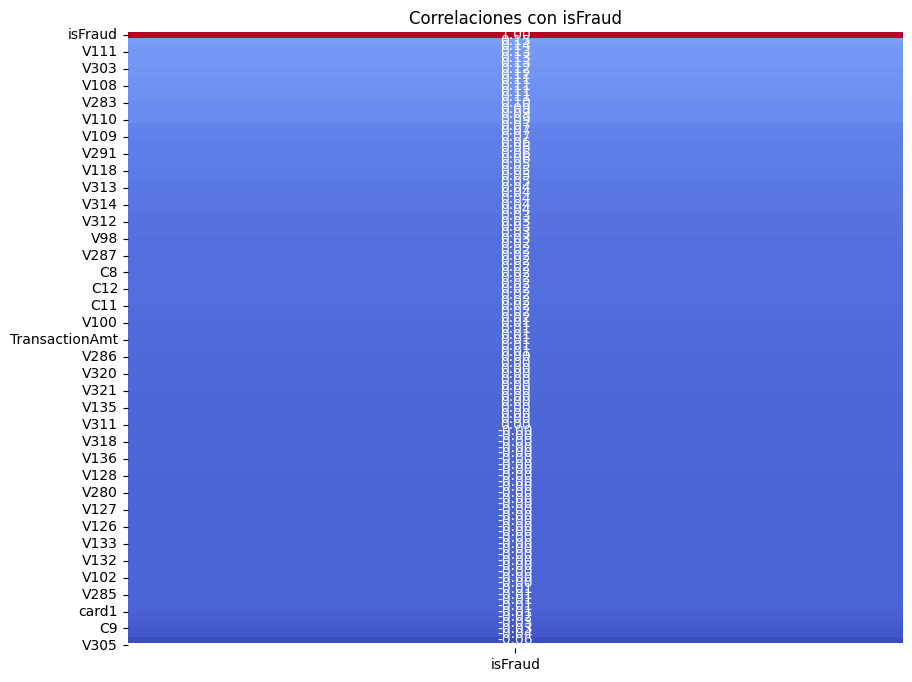

In [116]:
correlation_matrix = df_train.select_dtypes(exclude=['object']).corr()

# Filtrar para obtener solo las correlaciones con la columna 'isfraud'
isfraud_correlation = correlation_matrix[['isFraud']].sort_values(by='isFraud', ascending=False)

# Visualización de las correlaciones con 'isfraud'
plt.figure(figsize=(10, 8))
sns.heatmap(isfraud_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlaciones con isFraud')
plt.show()

**Observación**
- Se pude gráfica de correlación entre las variables numéricas se conclute que en general las variables no estan correlacionadas

Generamos un archivo csv con Dataframe de los datos de entrenamiento, el que se usara para la segunda parte del proyecto, "Limpieza y preprocesamiento de los datos"

In [117]:
# dir_data_interim = '../data/interim/'
# ruta_archivo_completa = os.path.join(dir_data_interim, 'train')

# df_train.to_csv(ruta_archivo_completa, index=False, encoding='utf-8')

### Conclusiones

Durante el análisis exploratorio de datos, se realizaron varias observaciones significativas sobre el dataset:

- El dataset original contiene más de medio millón de registros, por lo que se aplicó un método de muestreo estratificado para obtener una muestra representativa y manejable.
- Se seleccionaron las características más relevantes para el objetivo de detección de fraude en este primer análisis.
- Se identificaron columnas con valores nulos, se evaluó su cantidad y porcentaje, así como la correlación entre ellas. Se decidió eliminar aquellas columnas con un alto porcentaje de valores nulos para simplificar el análisis.
- Se encontraron y eliminaron valores duplicados, que eran escasos en comparación con el tamaño total del dataset.
- Del análisis univariado:
  - La columna objetivo "isFraud" muestra un desbalance con un 97.6% de registros no fraudulentos, lo cual debe considerarse al entrenar cualquier modelo.
  - La columna "TransactionAmt", que representa los montos de transacción, presenta distribuciones distintas según los rangos de valores y algunos valores atípicos, sugiriendo la segmentación para el entrenamiento del modelo.
  - La columna "TransactionDT" muestra una distribución uniforme en los datos.
  - La columna "ProductCD", que indica el producto de la transacción, muestra que casi el 82.71% de las transacciones corresponden al producto "W", seguido por "R" con 8.75%, "H" con 7.76%, y "C" con 0.78%.
  - La columna "addr1", que representa la dirección por región de los compradores, muestra que el 9.48% de las transacciones provienen de la región "299", seguida por "204", "325", "264" y otras regiones con menor porcentaje.
  - La columna "addr2", que representa la dirección por país, indica que el país con más transacciones tiene el código "84", representando el 99% del total de transacciones en el dataset.
  - La columna "P_emaildomain", que representa los proveedores de correo electrónico de los compradores, muestra que Gmail tiene la mayor incidencia de fraude con un 57.96% del total, seguido por Yahoo con un 25.33%. Otros proveedores tienen una incidencia menor de fraude.

- Del análisis bivariado:
  - TransactionDT: Tanto las transacciones fraudulentas como las no fraudulentas presentan distribuciones similares.
  - TransactionAmt: Se observa una mayor diferencia debido a la presencia de valores atípicos y diferentes distribuciones entre los casos con fraude y sin fraude.
  - Addr1:Las direcciones por región son similares tanto para los casos con fraude como para los casos sin fraude.
  - Add2: Las direcciones por país son similares tanto para los casos con fraude como para los casos sin fraude.
  - Se observa que las diferencias relativas entre si es fraude o no en los valores medios de las características numéricas son menores al 1%, excepto en "TransactionAmt", lo cual podría deberse a la presencia de valores atípicos.
Esto podŕia indicar una dificultad en el entrenamiento con las características numéricas, ya que sus distribuciones no son muy difrentes
  - ProductCD: El producto con el mayor porcentaje de fraude es "W", representando el 66.8 % del total de productos con fraude. Le sigue el producto "H" con un 15.19 %, luego "R" con un 14.7 %, y en menor medida el producto "C" con solo un 3.31 %.
  - El correo con mayor incidencia de fraude es el de Gmail, alcanzando un 57.96 % del total. Le sigue Yahoo con un 25.33 %, mientras que los demás proveedores de correo tienen una incidencia menor. Es probable que el alto porcentaje de fraudes en cuentas de Gmail se deba a su amplia base de usuario.

  

Estas conclusiones proporcionan una base sólida para entender la distribución de los datos y guiarán el preprocesamiento adicional y la construcción de modelos en futuros análisis.
